In [36]:
import pandas as pd
import collections
from matplotlib import pyplot as plt
from sklearn.datasets import make_regression
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from lightgbm import LGBMRegressor

In [37]:
# The data frame is called house_info
raw_info = pd.read_csv("kc_house_data.csv",error_bad_lines=False)

In [38]:
raw_info

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,...,8,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,...,8,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,...,7,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,0.0,...,8,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287


In [39]:
house_info = pd.DataFrame({'Bedrooms':raw_info.bedrooms, 'Bathrooms':raw_info.bathrooms, 'Floors':raw_info.floors, 
                           'Year Built':raw_info.yr_built, 'Year Renoveted':raw_info.yr_renovated,
                           'Size of Basement':raw_info.sqft_basement,'Condition':raw_info.condition,
                          'Size of Above':raw_info.sqft_above,'Location':raw_info.zipcode,
                          'Price':raw_info.price})

In [40]:
house_info

,Bedrooms,Bathrooms,Floors,Year Built,Year Renoveted,Size of Basement,Condition,Size of Above,Location,Price
0,3,1.00,1.0,1955,0.0,0.0,3,1180,98178,221900.0
1,3,2.25,2.0,1951,1991.0,400.0,3,2170,98125,538000.0
2,2,1.00,1.0,1933,NaN,0.0,3,770,98028,180000.0
3,4,3.00,1.0,1965,0.0,910.0,5,1050,98136,604000.0
4,3,2.00,1.0,1987,0.0,0.0,3,1680,98074,510000.0
...,...,...,...,...,...,...,...,...,...,...
21592,3,2.50,3.0,2009,0.0,0.0,3,1530,98103,360000.0
21593,4,2.50,2.0,2014,0.0,0.0,3,2310,98146,400000.0
21594,2,0.75,2.0,2009,0.0,0.0,3,1020,98144,402101.0
21595,3,2.50,2.0,2004,0.0,0.0,3,1600,98027,400000.0


In [41]:
house_info.describe()

,Bedrooms,Bathrooms,Floors,Year Built,Year Renoveted,Condition,Size of Above,Location,Price
count,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,2.159700e+04
mean,3.373200,2.115826,1.494096,1970.999676,83.636778,3.409825,1788.596842,98077.951845,5.402966e+05
std,0.926299,0.768984,0.539683,29.375234,399.946414,0.650546,827.759761,53.513072,3.673681e+05
min,1.000000,0.500000,1.000000,1900.000000,0.000000,1.000000,370.000000,98001.000000,7.800000e+04
25%,3.000000,1.750000,1.000000,1951.000000,0.000000,3.000000,1190.000000,98033.000000,3.220000e+05
50%,3.000000,2.250000,1.500000,1975.000000,0.000000,3.000000,1560.000000,98065.000000,4.500000e+05
75%,4.000000,2.500000,2.000000,1997.000000,0.000000,4.000000,2210.000000,98118.000000,6.450000e+05
max,33.000000,8.000000,3.500000,2015.000000,2015.000000,5.000000,9410.000000,98199.000000,7.700000e+06


In [29]:
def PRICE_BEDROOM(AMOUNT_BEDROOM):
    
    locations = house_info['Location'].tolist()

    amount_bed = house_info["Bedrooms"].tolist()

    bedrooms_index = []
    for i,x in enumerate(amount_bed):
        if x == AMOUNT_BEDROOM:bedrooms_index.append(i)
    len(bedrooms_index)

    bedrooms_southking = []
    for i in bedrooms_index:
        if locations[i] == 98092 : bedrooms_southking.append(i)
        elif locations[i] == 98002 : bedrooms_southking.append(i)
        elif locations[i] == 98001 : bedrooms_southking.append(i)
        elif locations[i] == 98070 : bedrooms_southking.append(i)
        elif locations[i] == 98038 : bedrooms_southking.append(i)
        elif locations[i] == 98023 : bedrooms_southking.append(i)
        elif locations[i] == 98003 : bedrooms_southking.append(i)
        elif locations[i] == 98010 : bedrooms_southking.append(i)
        elif locations[i] == 98022 : bedrooms_southking.append(i)
        elif locations[i] == 98198 : bedrooms_southking.append(i)
        elif locations[i] == 98188 : bedrooms_southking.append(i)
        elif locations[i] == 98148 : bedrooms_southking.append(i)
        elif locations[i] == 98042 : bedrooms_southking.append(i)
        elif locations[i] == 98032 : bedrooms_southking.append(i)
        elif locations[i] == 98031 : bedrooms_southking.append(i)
        elif locations[i] == 98030 : bedrooms_southking.append(i)

    price = house_info["Price"].tolist()

    price_southking = []
    for i in bedrooms_southking:price_southking.append(price[i])
    return(price_southking)

no_of_bedrooms = house_info["Bedrooms"].value_counts().index.tolist()
price_bedrooms_southking = []
for i in no_of_bedrooms:
    price_bedrooms_southking.append(PRICE_BEDROOM(i))
price_bedrooms_southking= sum(price_bedrooms_southking, [])
len(price_bedrooms_southking)

4403

In [30]:
def AMOUNT_BEDROOMS(AMOUNT_BEDROOM):
    locations = house_info['Location'].tolist()

    amount_bed = house_info["Bedrooms"].tolist()
    X_value = []
    bedroom_index = []
    for i,x in enumerate(amount_bed):
        if x == AMOUNT_BEDROOM:bedroom_index.append(i)

    for i in bedroom_index:
        if locations[i] == 98092 : X_value.append(AMOUNT_BEDROOM)
        elif locations[i] == 98002 : X_value.append(AMOUNT_BEDROOM)
        elif locations[i] == 98001 : X_value.append(AMOUNT_BEDROOM)
        elif locations[i] == 98070 : X_value.append(AMOUNT_BEDROOM)
        elif locations[i] == 98038 : X_value.append(AMOUNT_BEDROOM)
        elif locations[i] == 98023 : X_value.append(AMOUNT_BEDROOM)
        elif locations[i] == 98003 : X_value.append(AMOUNT_BEDROOM)
        elif locations[i] == 98010 : X_value.append(AMOUNT_BEDROOM)
        elif locations[i] == 98022 : X_value.append(AMOUNT_BEDROOM)
        elif locations[i] == 98198: X_value.append(AMOUNT_BEDROOM)
        elif locations[i] == 98188 : X_value.append(AMOUNT_BEDROOM)
        elif locations[i] == 98148 : X_value.append(AMOUNT_BEDROOM)
        elif locations[i] == 98042 : X_value.append(AMOUNT_BEDROOM)
        elif locations[i] == 98032 : X_value.append(AMOUNT_BEDROOM)
        elif locations[i] == 98031 : X_value.append(AMOUNT_BEDROOM)
        elif locations[i] == 98030 : X_value.append(AMOUNT_BEDROOM)
    return X_value
no_of_bedrooms = house_info["Bedrooms"].value_counts().index.tolist()
amount_bedrooms_southking = []
for i in no_of_bedrooms:
    amount_bedrooms_southking.append(AMOUNT_BEDROOMS(i))
amount_bedrooms_southking= sum(amount_bedrooms_southking, [])
len(amount_bedrooms_southking)

4403

In [31]:
regressiondata1 = pd.DataFrame({'Amount_of_Bedrooms':amount_bedrooms_southking,
                                'Price':price_bedrooms_southking})
regressiondata1

,Amount_of_Bedrooms,Price
0,3,257500.0
1,3,291850.0
2,3,323000.0
3,3,230000.0
4,3,329000.0
...,...,...
4398,1,375000.0
4399,1,285000.0
4400,1,570000.0
4401,1,229500.0


<ipython-input-32-f65b8d504e2b>:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['0','$200,000','$400,000','$600,000','$800,000',


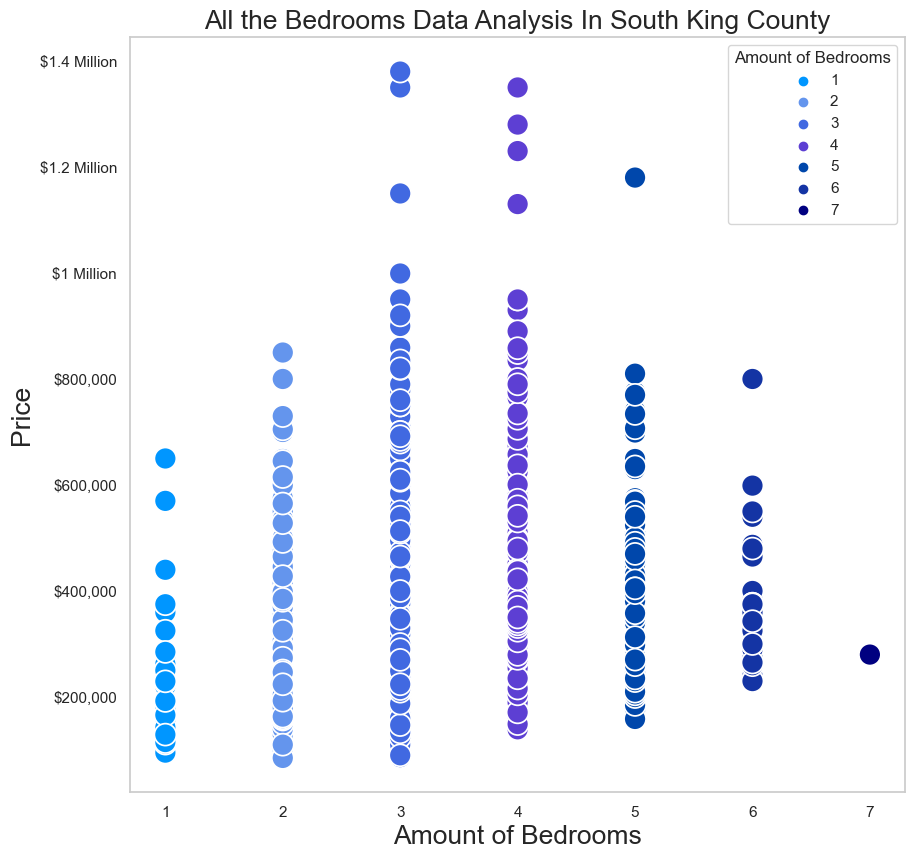

In [32]:
x = regressiondata1['Amount_of_Bedrooms']
y = regressiondata1['Price']
sns.set(style='whitegrid')
flatui = ["#0096FF","#6495ED","#4169E1","#5D3FD3","#0047AB","#1434A4","#000080"]
sns.set_palette(flatui)
plt.rcParams.update({'font.size': 10, 'figure.dpi':100})
ax = sns.scatterplot(data=regressiondata1, x=x, y=y,s=250,hue='Amount_of_Bedrooms',palette=flatui)
plt.grid(linestyle='-', linewidth=0.2)
ax.set_title('All the Bedrooms Data Analysis In South King County',size=19)
plt.xlabel("Amount of Bedrooms", size=19)
plt.ylabel("Price", size=19)
plt.legend(title='Amount of Bedrooms')
plt.gcf().set_size_inches((10,10))
ax.set_yticklabels(['0','$200,000','$400,000','$600,000','$800,000',
                    '$1 Million','$1.2 Million','$1.4 Million'])
plt.show()

In [33]:
train_df, test_df = train_test_split(regressiondata1, test_size=0.10, shuffle=False)

In [34]:
X_train, y_train = train_df[['Amount_of_Bedrooms']], train_df[['Price']]
X_test, y_test = test_df[['Amount_of_Bedrooms']], test_df[['Price']]

In [105]:
classifiers = {}
for tau in [0.1, 0.5, 0.9]:
    clf = LGBMRegressor(objective='quantile', alpha=tau)
    clf.fit(X_train, y_train)
    preds = pd.DataFrame(clf.predict(X_test), columns = [str(tau)])
    classifiers[str(tau)] = {'clf': clf, 'predictions': preds}

In [106]:
Quantile_regression = pd.DataFrame({'Amount_of_Bedrooms': X_test.reset_index()['Amount_of_Bedrooms'],
              '0.1': classifiers['0.1']['predictions']['0.1'],
              '0.5': classifiers['0.5']['predictions']['0.5'],
              '0.9': classifiers['0.9']['predictions']['0.9'],
              'Price': y_test.reset_index()['Price']})

In [107]:
Quantile_regression

,Amount_of_Bedrooms,0.1,0.5,0.9,Price
0,2,149941.436062,230001.434316,477999.238828,645000.0
1,2,149941.436062,230001.434316,477999.238828,299990.0
2,2,149941.436062,230001.434316,477999.238828,222200.0
3,2,149941.436062,230001.434316,477999.238828,309950.0
4,2,149941.436062,230001.434316,477999.238828,310000.0
...,...,...,...,...,...
436,1,149941.436062,230001.434316,477999.238828,375000.0
437,1,149941.436062,230001.434316,477999.238828,285000.0
438,1,149941.436062,230001.434316,477999.238828,570000.0
439,1,149941.436062,230001.434316,477999.238828,229500.0


In [108]:
melted_data = pd.melt(Quantile_regression, id_vars=['Amount_of_Bedrooms'])
melted_data = melted_data.dropna()
melted_data = melted_data.drop(range(1323,1764))

In [149]:
melted_data

,Amount_of_Bathrooms,Percentile,value
0,2.50,0.1,150001.290355
1,1.00,0.1,150001.290355
2,1.75,0.1,150001.290355
3,2.25,0.1,150001.290355
4,2.00,0.1,150001.290355
5,1.50,0.1,150001.290355
6,2.75,0.1,252542.224870
7,3.00,0.1,252542.224870
8,3.50,0.1,252542.224870
9,3.25,0.1,252542.224870


In [16]:
df =pd.DataFrame({'Amount of Bedrooms':[1,2,3,4,5,6,7,1,2,3,4,5,6,7,1,2,3,4,5,6,7],
        'Percentile':[0.5,0.5,0.5,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.5,0.5,0.5,0.5,0.9,0.9,0.9,0.9,0.9,0.9,0.9],
'Value':[149941.436062,149941.436062,149941.436062,239719.095171,
                239719.095171,239719.095171,239719.095171,23001.434316,23001.434316,23001.434316,
                327998.831298,327998.831298,327998.831298,327998.831298,477999.238828,477999.238828,
                477999.238828,489188.926882,489188.926882,489188.926882,489188.926882]})
df.head(4)

,Amount of Bedrooms,Percentile,Value
0,1,0.5,149941.436062
1,2,0.5,149941.436062
2,3,0.5,149941.436062
3,4,0.1,239719.095171


<ipython-input-18-7ac4e8ee4ef8>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['0','$0','$100,000','$200,000','$300,000','$400,000','$500,000'])


[Text(0, -100000.0, '0'),
 Text(0, 0.0, '$0'),
 Text(0, 100000.0, '$100,000'),
 Text(0, 200000.0, '$200,000'),
 Text(0, 300000.0, '$300,000'),
 Text(0, 400000.0, '$400,000'),
 Text(0, 500000.0, '$500,000'),
 Text(0, 600000.0, '')]

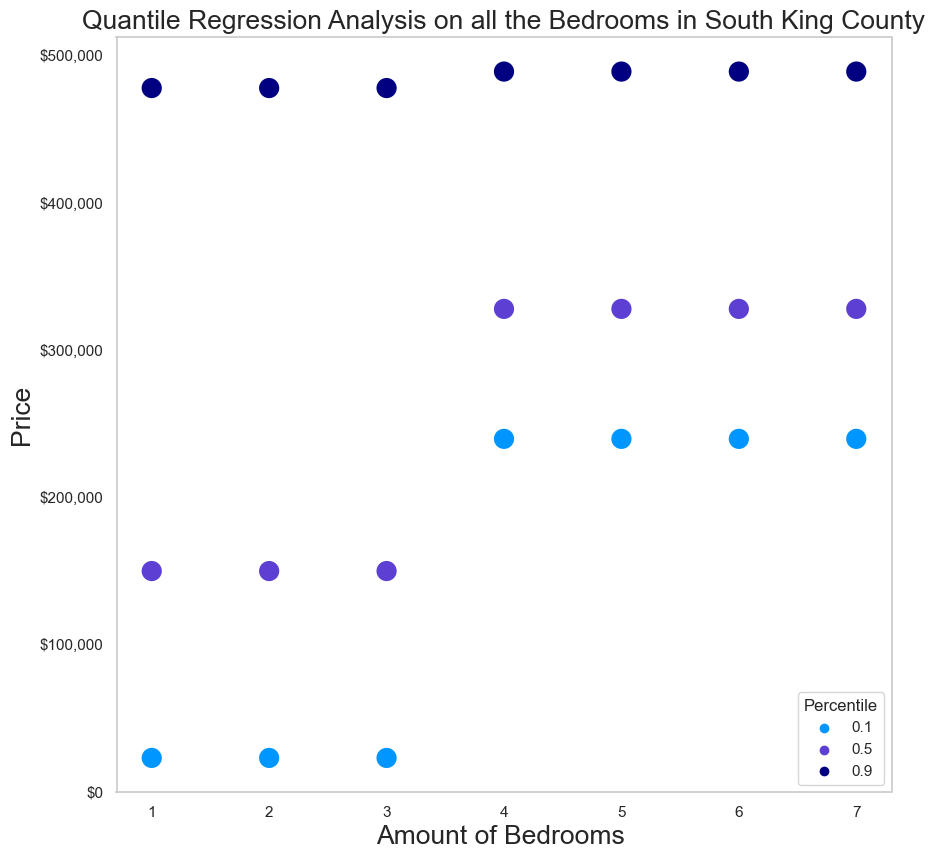

In [18]:
plt.rcParams.update({'font.size': 10, 'figure.dpi':100})
flatui = ["#0096FF","#5D3FD3","#000080"]
ax = sns.scatterplot(data=df, x="Amount of Bedrooms", 
                     y='Value',s=250,hue='Percentile',palette=flatui)
plt.grid(linestyle='-', linewidth=0.2)
ylabel = plt.ylabel("Price")
sns.set(style='whitegrid')
xlabel = plt.xlabel("Amount of Bedrooms")
plt.gcf().set_size_inches((10,10))
ax.set_title('Quantile Regression Analysis on all the Bedrooms in South King County',size=19)
plt.xlabel("Amount of Bedrooms ", size=19)
plt.ylabel("Price", size=19)
ax.set_yticklabels(['0','$0','$100,000','$200,000','$300,000','$400,000','$500,000'])

<ipython-input-112-cd4908deb2cb>:15: UserWarning:

FixedFormatter should only be used together with FixedLocator



[Text(0, -100000.0, '0'),
 Text(0, 0.0, '$0'),
 Text(0, 100000.0, '$100,000'),
 Text(0, 200000.0, '$200,000'),
 Text(0, 300000.0, '$300,000'),
 Text(0, 400000.0, '$400,000'),
 Text(0, 500000.0, '$500,000'),
 Text(0, 600000.0, '')]

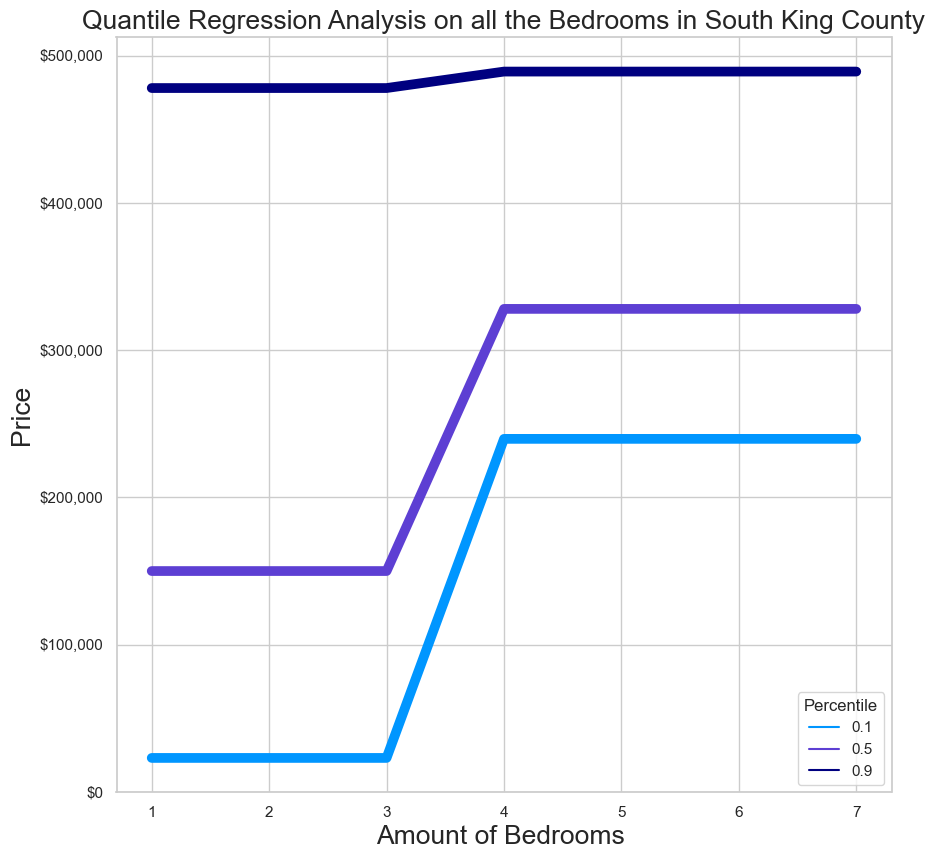

In [112]:
sns.set_style("whitegrid")
flatui = ["#0096FF","#5D3FD3","#000080"]
ax=sns.lineplot( x=[1,2,3,4,5,6,7,1,2,3,4,5,6,7,1,2,3,4,5,6,7],linewidth = 7,palette=flatui,
               hue=[0.5,0.5,0.5,0.1,0.1,0.1,
                                  0.1,0.1,0.1,0.1,0.5,0.5,0.5,0.5,0.9,0.9,0.9,0.9,0.9,0.9,0.9],
                y=[149941.436062,149941.436062,149941.436062,239719.095171,
                239719.095171,239719.095171,239719.095171,23001.434316,23001.434316,23001.434316,
                327998.831298,327998.831298,327998.831298,327998.831298,477999.238828,477999.238828,
                477999.238828,489188.926882,489188.926882,489188.926882,489188.926882 ])
plt.gcf().set_size_inches((10,10))
plt.legend(title='Percentile')
ax.set_title('Quantile Regression Analysis on all the Bedrooms in South King County',size=19)
plt.xlabel("Amount of Bedrooms ", size=19)
plt.ylabel("Price", size=19)
ax.set_yticklabels(['0','$0','$100,000','$200,000','$300,000','$400,000',
                         '$500,000'])

In [113]:
(Quantile_regression['Price'] > Quantile_regression['0.1']).value_counts()

True     403
False     38
dtype: int64

In [114]:
i = 0
y= 0
x = []
while i < 403:
    x.append('How Many Times The Prediction Was Right')
    i+=1
while y < 38:
    x.append('How Many Times The Prediction Was Wrong')
    y+=1
len(x)
df3 = pd.DataFrame({'Prediction Accuracy':x})

Text(0, 0.5, 'Count')

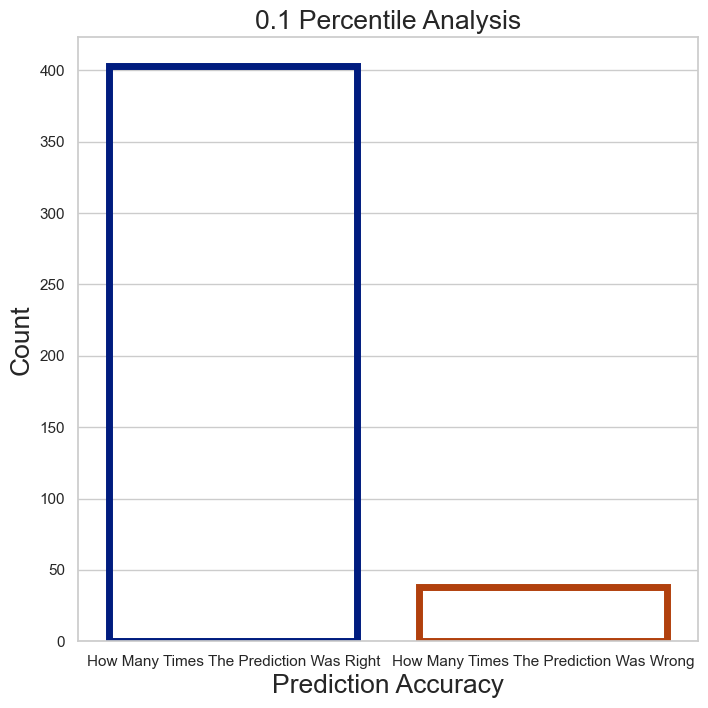

In [115]:
sns.set_style("whitegrid")
plt.gcf().set_size_inches((8,8))
ax = sns.countplot(x="Prediction Accuracy", data=df3,
                   #title = '0.1 Percentile Analysis',
                   facecolor=(0, 0, 0, 0),
                   linewidth=5,
                   edgecolor=sns.color_palette("dark", 3))
ax.set_title('0.1 Percentile Analysis',size=19)
plt.xlabel("Prediction Accuracy", size=19)
plt.ylabel("Count", size=19)

In [116]:
(Quantile_regression['Price'] > Quantile_regression['0.5']).value_counts()

True     228
False    213
dtype: int64

In [117]:
i = 0
y= 0
x = []
while i < 228:
    x.append('How Many Times The Predictionwas Was Right')
    i+=1
while y < 213:
    x.append('How Many Times The Predictionwas Was Wrong')
    y+=1
len(x)
df33 = pd.DataFrame({'Prediction Accuracy':x})

Text(0, 0.5, 'Count')

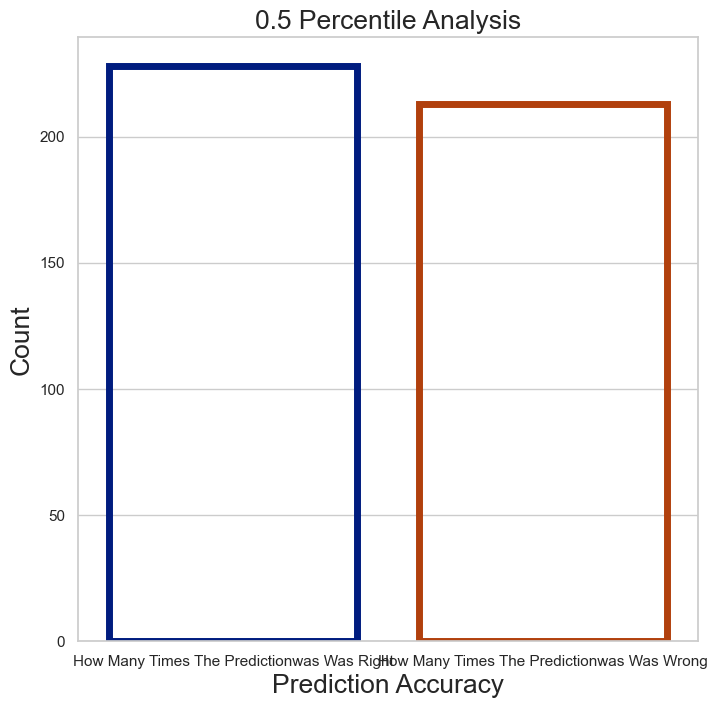

In [118]:
sns.set_style("whitegrid")
plt.gcf().set_size_inches((8,8))
ax = sns.countplot(x="Prediction Accuracy", data=df33,
                   facecolor=(0, 0, 0, 0),
                   linewidth=5,
                   edgecolor=sns.color_palette("dark", 3))
ax.set_title('0.5 Percentile Analysis',size=19)
plt.xlabel("Prediction Accuracy", size=19)
plt.ylabel("Count", size=19)

In [119]:
(Quantile_regression['Price'] > Quantile_regression['0.9']).value_counts()

False    390
True      51
dtype: int64

In [120]:
i = 0
y= 0
x = []
while i < 390:
    x.append('How Many Times The Predictionwas Was Right')
    i+=1
while y < 51:
    x.append('How Many Times The Predictionwas Was Wrong')
    y+=1
len(x)
df333 = pd.DataFrame({'Prediction Accuracy':x})

Text(0, 0.5, 'Count')

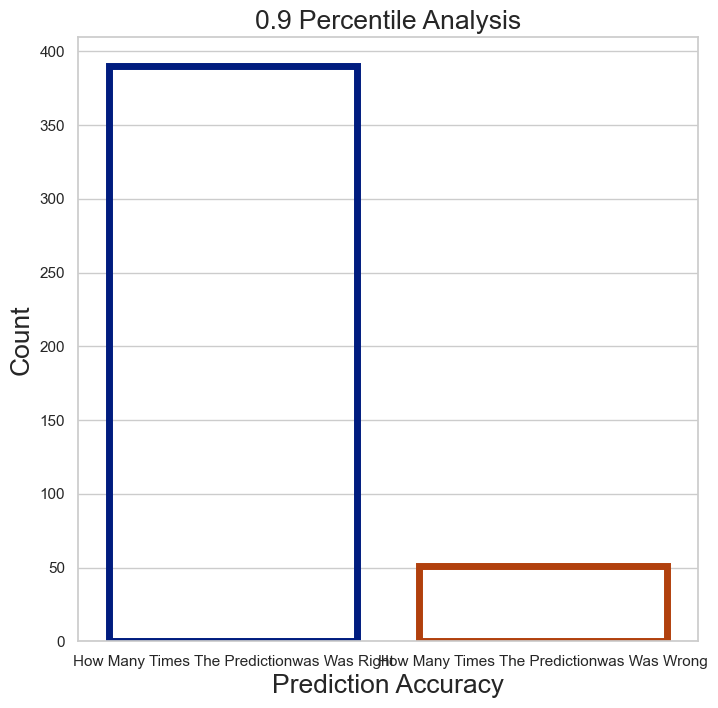

In [121]:
sns.set_style("whitegrid")
plt.gcf().set_size_inches((8,8))
ax = sns.countplot(x="Prediction Accuracy", data=df333,
                   facecolor=(0, 0, 0, 0),
                   linewidth=5,
                   edgecolor=sns.color_palette("dark", 3))
ax.set_title('0.9 Percentile Analysis',size=19)
plt.xlabel("Prediction Accuracy", size=19)
plt.ylabel("Count", size=19)

In [19]:
Predictions = []
for i in regressiondata1.Amount_of_Bedrooms:
    if i == 1 :Predictions.append('Between: $149,941 - $477,999')
    if i == 2: Predictions.append('Between: $149,941 - $477,999')
    if i == 3:Predictions.append('Between: $149,941 - $477,999')
    if i == 4:Predictions.append('Between: $239,719 - $489,188') 
    if i == 5:Predictions.append('Between: $239,719 - $489,188')
    if i ==6 :Predictions.append('Between: $239,719 - $489,188')
    if i == 7:Predictions.append('Between: $239,719 - $489,188')
len(Predictions)

4403

In [20]:
price = []
for i in regressiondata1.Price:
    price.append("${:,.0f}".format(i))

In [22]:
Prediction = pd.DataFrame({'Amount of Bedrooms':regressiondata1.Amount_of_Bedrooms,
                           'Prediction':Predictions,'Actual Price':price})
Prediction

,Amount of Bedrooms,Prediction,Actual Price
0,3,"Between: $149,941 - $477,999","$257,500"
1,3,"Between: $149,941 - $477,999","$291,850"
2,3,"Between: $149,941 - $477,999","$323,000"
3,3,"Between: $149,941 - $477,999","$230,000"
4,3,"Between: $149,941 - $477,999","$329,000"
...,...,...,...
4398,1,"Between: $149,941 - $477,999","$375,000"
4399,1,"Between: $149,941 - $477,999","$285,000"
4400,1,"Between: $149,941 - $477,999","$570,000"
4401,1,"Between: $149,941 - $477,999","$229,500"


In [24]:
def PRICE_BATHROOM(AMOUNT_BATHROOM):
    
    locations = house_info['Location'].tolist()

    amount_bath = house_info["Bathrooms"].tolist()

    bathroom_index = []
    for i,x in enumerate(amount_bath):
        if x == AMOUNT_BATHROOM:bathroom_index.append(i)
    len(bathroom_index)

    bathroom_southking = []
    for i in bathroom_index:
        if locations[i] == 98092 : bathroom_southking.append(i)
        elif locations[i] == 98002 : bathroom_southking.append(i)
        elif locations[i] == 98001 : bathroom_southking.append(i)
        elif locations[i] == 98070 : bathroom_southking.append(i)
        elif locations[i] == 98038 : bathroom_southking.append(i)
        elif locations[i] == 98023 : bathroom_southking.append(i)
        elif locations[i] == 98003 : bathroom_southking.append(i)
        elif locations[i] == 98010 : bathroom_southking.append(i)
        elif locations[i] == 98022 : bathroom_southking.append(i)
        elif locations[i] == 98198 : bathroom_southking.append(i)
        elif locations[i] == 98188 : bathroom_southking.append(i)
        elif locations[i] == 98148 : bathroom_southking.append(i)
        elif locations[i] == 98042 : bathroom_southking.append(i)
        elif locations[i] == 98032 : bathroom_southking.append(i)
        elif locations[i] == 98031 : bathroom_southking.append(i)
        elif locations[i] == 98030 : bathroom_southking.append(i)

    price = house_info["Price"].tolist()

    price_southking = []
    for i in bathroom_southking:price_southking.append(price[i])
    return(price_southking)

no_of_bathrooms = house_info["Bathrooms"].value_counts().index.tolist()
price_bathroom_southking = []
for i in no_of_bathrooms:
    price_bathroom_southking.append(PRICE_BATHROOM(i))
price_bathroom_southking = sum(price_bathroom_southking, [])
price_bathroom_southking

[323000.0,
 285000.0,
 1350000.0,
 292500.0,
 301000.0,
 287000.0,
 360000.0,
 720000.0,
 390000.0,
 360000.0,
 243500.0,
 480000.0,
 260000.0,
 256883.0,
 297000.0,
 465000.0,
 472000.0,
 363000.0,
 245000.0,
 290000.0,
 272500.0,
 365000.0,
 455000.0,
 370000.0,
 360000.0,
 335000.0,
 208633.0,
 390000.0,
 260000.0,
 300000.0,
 329500.0,
 322500.0,
 268000.0,
 245000.0,
 325000.0,
 342500.0,
 328500.0,
 295000.0,
 270500.0,
 331500.0,
 338900.0,
 266000.0,
 296000.0,
 260000.0,
 305000.0,
 609900.0,
 320000.0,
 530000.0,
 390000.0,
 289950.0,
 347500.0,
 360000.0,
 405000.0,
 370000.0,
 310950.0,
 332000.0,
 265000.0,
 280000.0,
 289999.0,
 395000.0,
 324000.0,
 288400.0,
 378000.0,
 253000.0,
 469500.0,
 291000.0,
 325000.0,
 321500.0,
 315000.0,
 380000.0,
 515000.0,
 367000.0,
 350900.0,
 298900.0,
 305000.0,
 254000.0,
 245000.0,
 320000.0,
 350000.0,
 295700.0,
 390000.0,
 302495.0,
 470000.0,
 325000.0,
 375000.0,
 556000.0,
 620000.0,
 585000.0,
 303700.0,
 267000.0,
 292000.0

In [25]:
def AMOUNT_BATHROOMS(AMOUNT_BATHROOM):
    locations = house_info['Location'].tolist()

    amount_bed = house_info["Bathrooms"].tolist()
    X_value = []
    bathroom_index = []
    for i,x in enumerate(amount_bed):
        if x == AMOUNT_BATHROOM:bathroom_index.append(i)

    for i in bathroom_index:
        if locations[i] == 98092 : X_value.append(AMOUNT_BATHROOM)
        elif locations[i] == 98002 : X_value.append(AMOUNT_BATHROOM)
        elif locations[i] == 98001 : X_value.append(AMOUNT_BATHROOM)
        elif locations[i] == 98070 : X_value.append(AMOUNT_BATHROOM)
        elif locations[i] == 98038 : X_value.append(AMOUNT_BATHROOM)
        elif locations[i] == 98023 : X_value.append(AMOUNT_BATHROOM)
        elif locations[i] == 98003 : X_value.append(AMOUNT_BATHROOM)
        elif locations[i] == 98010 : X_value.append(AMOUNT_BATHROOM)
        elif locations[i] == 98022 : X_value.append(AMOUNT_BATHROOM)
        elif locations[i] == 98198: X_value.append(AMOUNT_BATHROOM)
        elif locations[i] == 98188 : X_value.append(AMOUNT_BATHROOM)
        elif locations[i] == 98148 : X_value.append(AMOUNT_BATHROOM)
        elif locations[i] == 98042 : X_value.append(AMOUNT_BATHROOM)
        elif locations[i] == 98032 : X_value.append(AMOUNT_BATHROOM)
        elif locations[i] == 98031 : X_value.append(AMOUNT_BATHROOM)
        elif locations[i] == 98030 : X_value.append(AMOUNT_BATHROOM)
    return X_value
no_of_bathrooms = house_info["Bathrooms"].value_counts().index.tolist()
amount_bathrooms_southking = []
for i in no_of_bathrooms:
    amount_bathrooms_southking.append(AMOUNT_BATHROOMS(i))
amount_bathrooms_southking= sum(amount_bathrooms_southking, [])
len(amount_bathrooms_southking)

4403

In [26]:
regressiondata2 = pd.DataFrame({'Amount_of_Bathrooms':amount_bathrooms_southking,
                                'Price':price_bathroom_southking})
regressiondata2

,Amount_of_Bathrooms,Price
0,2.50,323000.0
1,2.50,285000.0
2,2.50,1350000.0
3,2.50,292500.0
4,2.50,301000.0
...,...,...
4398,5.00,784500.0
4399,5.00,480000.0
4400,5.00,343000.0
4401,5.25,300000.0


<ipython-input-128-73de9f56039c>:15: UserWarning:

FixedFormatter should only be used together with FixedLocator



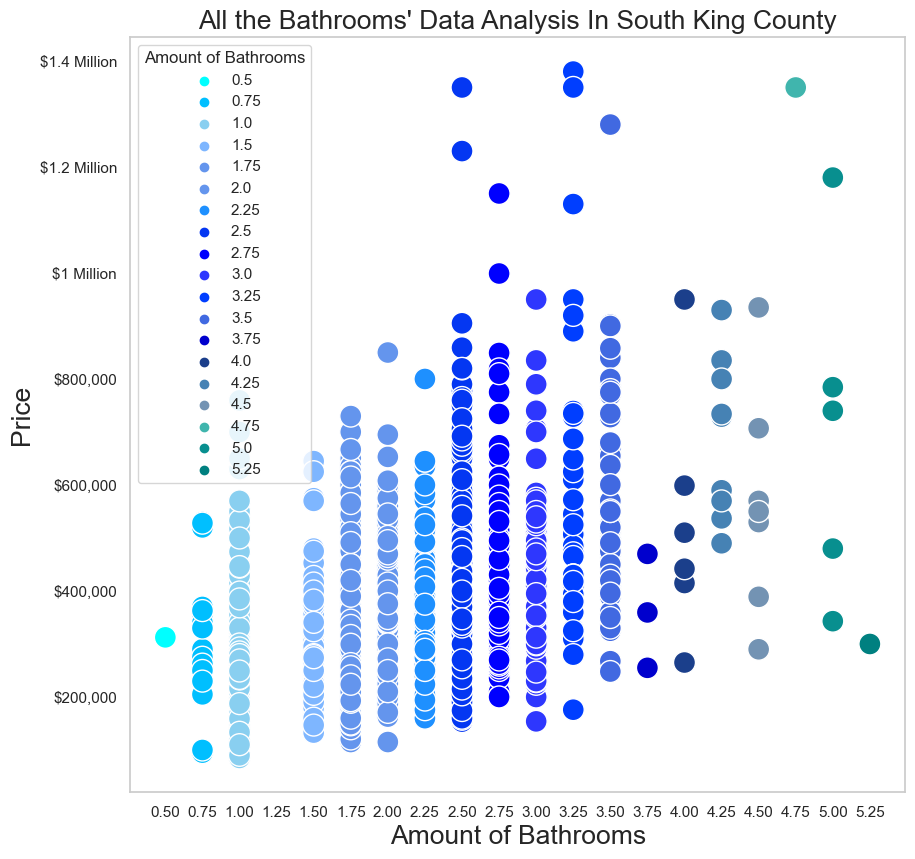

In [128]:
x = regressiondata2['Amount_of_Bathrooms']
y = regressiondata2['Price']
flatui = ["#00FFFF","#00bfff","#89CFF0","#7EB6FF","#6495ED",
          "#6495ed","#1E90FF","#0437F2","#0000FF","#2E37FE","#003EFF",
          "#4169E1","#0000CD","#1B3F8B","#4682B4","#7393B3","#40B5AD","#088F8F","#008080"]
sns.set_palette(flatui)
plt.rcParams.update({'font.size': 10, 'figure.dpi':100})
ax = sns.scatterplot(data=regressiondata2, x=x, y=y,s=250, linewidth = 1,
                     hue='Amount_of_Bathrooms',palette=flatui)
plt.grid(linestyle='-', linewidth=0.2)
ax.set_title('All the Bathrooms\' Data Analysis In South King County',size=19)
plt.xlabel("Amount of Bathrooms", size=19)
plt.legend(title='Amount of Bathrooms')
plt.ylabel("Price", size=19)
ax.set_yticklabels(['0','$200,000','$400,000','$600,000','$800,000',
                         '$1 Million','$1.2 Million','$1.4 Million'])
plt.xticks(np.arange(0.5,5.5,0.25))
plt.gcf().set_size_inches((10,10))
xticks=ax.xaxis.get_major_ticks()

plt.show()

In [129]:
train_df, test_df = train_test_split(regressiondata2, test_size=0.10, shuffle=False)

In [130]:
X_train, y_train = train_df[['Amount_of_Bathrooms']], train_df[['Price']]
X_test, y_test = test_df[['Amount_of_Bathrooms']], test_df[['Price']]

In [131]:
classifiers = {}
for tau in [0.1, 0.5, 0.9]:
    clf = LGBMRegressor(objective='quantile', alpha=tau)
    clf.fit(X_train, y_train)
    preds = pd.DataFrame(clf.predict(X_test), columns = [str(tau)])
    classifiers[str(tau)] = {'clf': clf, 'predictions': preds}

In [132]:
Quantile_regression1 = pd.DataFrame({'Amount_of_Bathrooms': X_test.reset_index()['Amount_of_Bathrooms'],
              '0.1': classifiers['0.1']['predictions']['0.1'],
              '0.5': classifiers['0.5']['predictions']['0.5'],
              '0.9': classifiers['0.9']['predictions']['0.9'],
              'Price': y_test.reset_index()['Price']})

In [133]:
Quantile_regression1

,Amount_of_Bathrooms,0.1,0.5,0.9,Price
0,2.75,252542.224870,344998.207106,537396.864270,307000.0
1,2.75,252542.224870,344998.207106,537396.864270,329000.0
2,2.75,252542.224870,344998.207106,537396.864270,600000.0
3,2.75,252542.224870,344998.207106,537396.864270,323000.0
4,2.75,252542.224870,344998.207106,537396.864270,200000.0
...,...,...,...,...,...
436,5.00,252542.224870,344998.207106,537396.864270,784500.0
437,5.00,252542.224870,344998.207106,537396.864270,480000.0
438,5.00,252542.224870,344998.207106,537396.864270,343000.0
439,5.25,252542.224870,344998.207106,537396.864270,300000.0


In [134]:
Quantileregression_updated = pd.DataFrame({'Amount_of_Bathrooms':[2.50,1.00,1.75,2.25,2.00,1.50,2.75,   
3.00,3.50,3.25,3.75,4.00,4.50,4.25,0.75,4.75,5.00,5.25,1.25,0.50 ],
    '0.1':[150001.290355,150001.290355,150001.290355,150001.290355,150001.290355,
                             150001.290355,252542.224870,252542.224870,252542.224870,252542.224870,
                             252542.224870,252542.224870,252542.224870,252542.224870,150001.290355,
                             252542.224870,252542.224870,252542.224870,150001.290355,150001.290355],
'0.5':[209001.819456,209001.819456,209001.819456,209001.819456,209001.819456,209001.819456,
      344998.207106,344998.207106,344998.207106,344998.207106,344998.207106,344998.207106,
       344998.207106,344998.207106,209001.819456,344998.207106,344998.207106,344998.207106,
       209001.819456,209001.819456],
'0.9':[287968.850069,287968.850069,287968.850069,287968.850069,287968.850069,287968.850069,
      537396.864270,537396.864270,537396.864270,537396.864270,537396.864270,537396.864270,
       537396.864270,537396.864270,287968.850069,537396.864270,537396.864270,537396.864270,
      287968.850069,287968.850069]})
Quantileregression_updated

,Amount_of_Bathrooms,0.1,0.5,0.9
0,2.50,150001.290355,209001.819456,287968.850069
1,1.00,150001.290355,209001.819456,287968.850069
2,1.75,150001.290355,209001.819456,287968.850069
3,2.25,150001.290355,209001.819456,287968.850069
4,2.00,150001.290355,209001.819456,287968.850069
5,1.50,150001.290355,209001.819456,287968.850069
6,2.75,252542.224870,344998.207106,537396.864270
7,3.00,252542.224870,344998.207106,537396.864270
8,3.50,252542.224870,344998.207106,537396.864270
9,3.25,252542.224870,344998.207106,537396.864270


In [135]:
melted_data = pd.melt(Quantileregression_updated, id_vars=['Amount_of_Bathrooms'])
melted_data = melted_data.dropna()
melted_data = melted_data.rename(columns={'variable': 'Percentile'})
melted_data.head(5)

,Amount_of_Bathrooms,Percentile,value
0,2.50,0.1,150001.290355
1,1.00,0.1,150001.290355
2,1.75,0.1,150001.290355
3,2.25,0.1,150001.290355
4,2.00,0.1,150001.290355


<ipython-input-136-4d4593515183>:10: UserWarning:

FixedFormatter should only be used together with FixedLocator



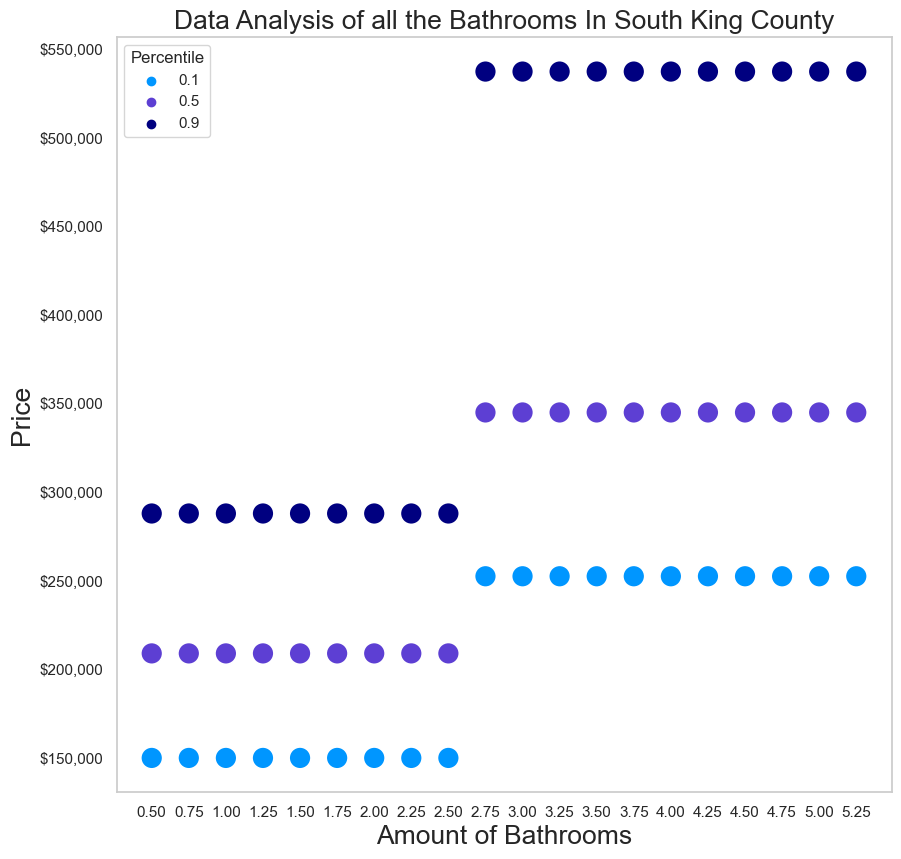

In [136]:
plt.rcParams.update({'font.size': 10, 'figure.dpi':100})
flatui = ["#0096FF","#5D3FD3","#000080",]
ax =sns.scatterplot(data=melted_data, x="Amount_of_Bathrooms",palette=flatui,y='value',s=250,
                    hue='Percentile')
plt.xticks(np.arange(0.5,5.5,0.25))           
plt.grid(linestyle='-', linewidth=0.2)
ax.set_title('Data Analysis of all the Bathrooms In South King County',size=19)
plt.xlabel("Amount of Bathrooms", size=19)
plt.ylabel("Price", size=19)
ax.set_yticklabels(['0','$150,000','$200,000','$250,000','$300,000','$350,000',
                         '$400,000','$450,000','$500,000','$550,000'])
ylabel = plt.ylabel("Price")
xlabel = plt.xlabel("Amount of Bathrooms")
plt.gcf().set_size_inches((10,10))

<ipython-input-137-62800b5a7264>:28: UserWarning:

FixedFormatter should only be used together with FixedLocator



[Text(0, 100000.0, '0'),
 Text(0, 150000.0, '$150,000'),
 Text(0, 200000.0, '$200,000'),
 Text(0, 250000.0, '$250,000'),
 Text(0, 300000.0, '$300,000'),
 Text(0, 350000.0, '$350,000'),
 Text(0, 400000.0, '$400,000'),
 Text(0, 450000.0, '$450,000'),
 Text(0, 500000.0, '$500,000'),
 Text(0, 550000.0, '$550,000'),
 Text(0, 600000.0, '')]

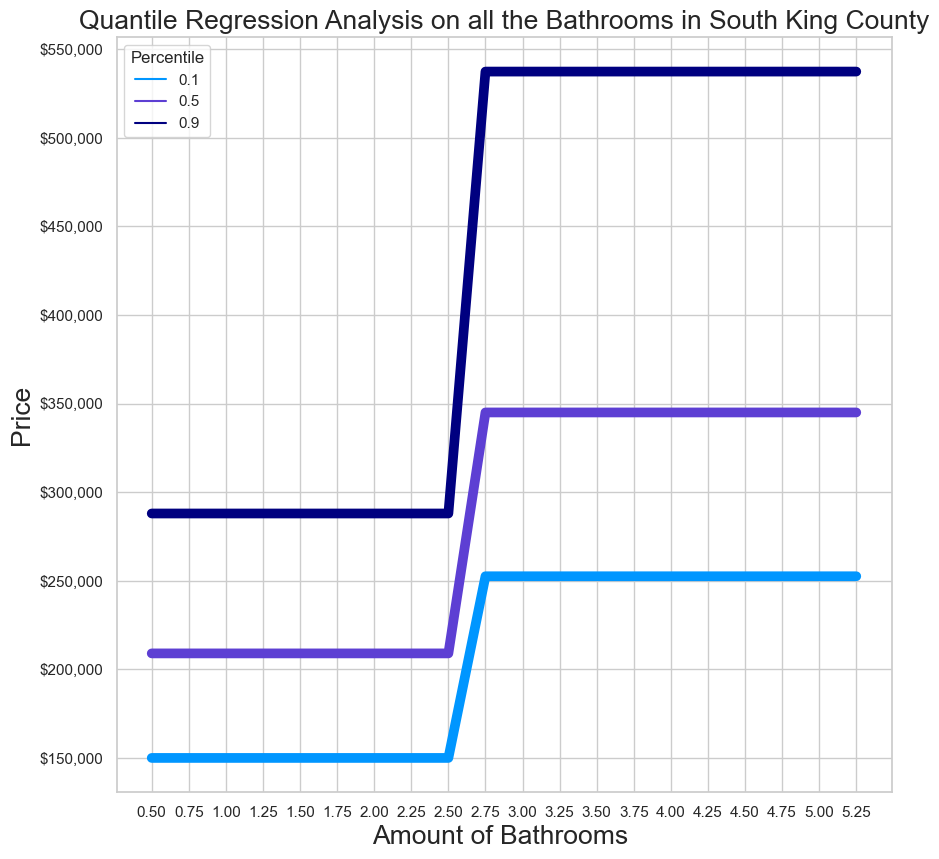

In [137]:
sns.set_style("whitegrid")
flatui = ["#0096FF","#5D3FD3","#000080"]
ax=sns.lineplot( x=[0.50,0.75,1.00,1.25,1.50,1.75,2.00,2.25,2.50,2.75,   
3.00,3.25,3.50,3.75,4.00,4.25,4.50,4.75,5.00,5.25,0.50,0.75,1.00,1.25,1.50,1.75,2.00,2.25,2.50,2.75,   
3.00,3.25,3.50,3.75,4.00,4.25,4.50,4.75,5.00,5.25,0.50,0.75,1.00,1.25,1.50,1.75,2.00,2.25,2.50,2.75,   
3.00,3.25,3.50,3.75,4.00,4.25,4.50,4.75,5.00,5.25],linewidth = 7,palette=flatui,
               hue=[0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,
                    0.1,0.1,0.1,0.1,0.1,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,
                   0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.9,0.9,0.9,0.9,0.9,
                   0.9,0.9,0.9,0.9,0.9,0.9,0.9,0.9,0.9,0.9,0.9,0.9,0.9,0.9,0.9],
                y=[150001.290355,150001.290355,150001.290355,150001.290355,150001.290355,
                   150001.290355,150001.290355,150001.290355,150001.290355,252542.224870,
                  252542.224870,252542.224870,252542.224870,252542.224870,252542.224870,
                   252542.224870,252542.224870,252542.224870,252542.224870,252542.224870,
                  209001.819456,209001.819456,209001.819456,209001.819456,209001.819456,209001.819456,
                  209001.819456,209001.819456,209001.819456,344998.207106,344998.207106,
                  344998.207106,344998.207106,344998.207106,344998.207106,344998.207106,344998.207106,
                  344998.207106,344998.207106,344998.207106,287968.850069,287968.850069,287968.850069,
                  287968.850069,287968.850069,287968.850069,287968.850069,287968.850069,287968.850069,
                  537396.864270,537396.864270,537396.864270,537396.864270,537396.864270,537396.864270,
                   537396.864270,537396.864270,537396.864270,537396.864270,537396.864270])
plt.gcf().set_size_inches((10,10))
plt.xticks(np.arange(0.5,5.5,0.25))  
plt.legend(title='Percentile')
ax.set_title('Quantile Regression Analysis on all the Bathrooms in South King County',size=19)
plt.xlabel("Amount of Bathrooms ", size=19)
plt.ylabel("Price", size=19)
ax.set_yticklabels(['0','$150,000','$200,000','$250,000','$300,000','$350,000',
                         '$400,000','$450,000','$500,000','$550,000'])

In [267]:
(Quantile_regression1['Price'] > Quantile_regression1['0.1']).value_counts()

True     417
False     24
dtype: int64

In [268]:
i = 0
y= 0
x = []
while i < 417:
    x.append('How Many Times The Prediction Was Right')
    i+=1
while y < 24:
    x.append('How Many Times The Prediction Was Wrong')
    y+=1
len(x)
df3 = pd.DataFrame({'Prediction Accuracy':x})

Text(0, 0.5, 'Count')

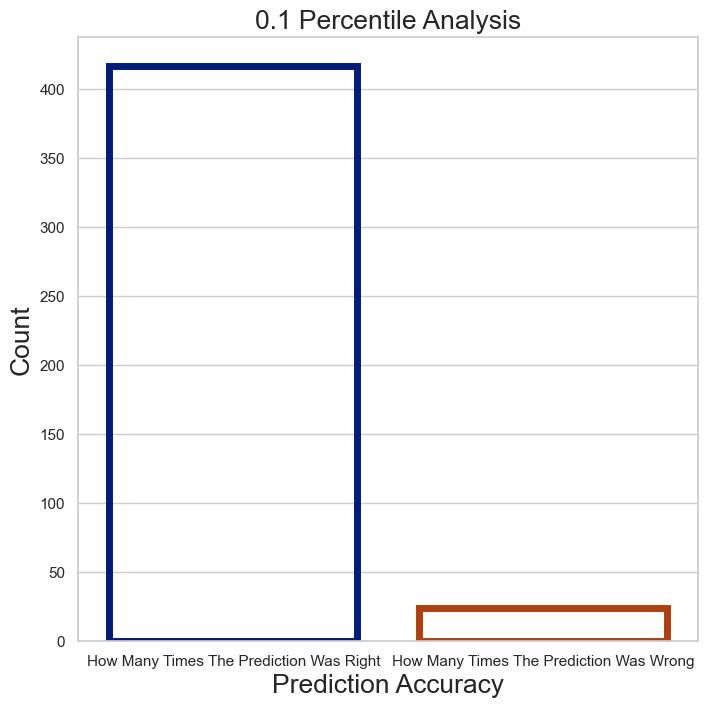

In [269]:
sns.set_style("whitegrid")
plt.gcf().set_size_inches((8,8))
ax = sns.countplot(x="Prediction Accuracy", data=df3,
                   palette=flatui,
                   #title = '0.1 Percentile Analysis',
                   facecolor=(0, 0, 0, 0),
                   linewidth=5,
                   edgecolor=sns.color_palette("dark", 3))
ax.set_title('0.1 Percentile Analysis',size=19)
plt.xlabel("Prediction Accuracy", size=19)
plt.ylabel("Count", size=19)

In [264]:
(Quantile_regression1['Price'] > Quantile_regression1['0.5']).value_counts()

True     311
False    130
dtype: int64

In [265]:
i = 0
y= 0
x = []
while i < 311:
    x.append('How Many Times The Prediction Was Right')
    i+=1
while y < 130:
    x.append('How Many Times The Prediction Was Wrong')
    y+=1
len(x)
df3 = pd.DataFrame({'Prediction Accuracy':x})

Text(0, 0.5, 'Count')

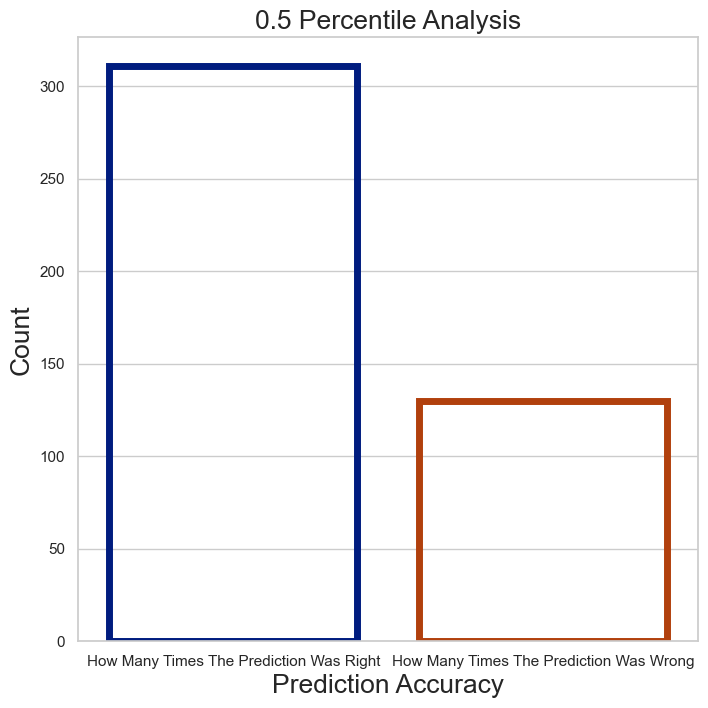

In [266]:
sns.set_style("whitegrid")
plt.gcf().set_size_inches((8,8))
ax = sns.countplot(x="Prediction Accuracy", data=df3,
                   palette=flatui,
                   #title = '0.1 Percentile Analysis',
                   facecolor=(0, 0, 0, 0),
                   linewidth=5,
                   edgecolor=sns.color_palette("dark", 3))
ax.set_title('0.5 Percentile Analysis',size=19)
plt.xlabel("Prediction Accuracy", size=19)
plt.ylabel("Count", size=19)

In [261]:
(Quantile_regression1['Price'] > Quantile_regression1['0.9']).value_counts()

False    330
True     111
dtype: int64

In [262]:
i = 0
y= 0
x = []
while i < 330:
    x.append('How Many Times The Prediction Was Right')
    i+=1
while y < 111:
    x.append('How Many Times The Prediction Was Wrong')
    y+=1
len(x)
df3 = pd.DataFrame({'Prediction Accuracy':x})

Text(0, 0.5, 'Count')

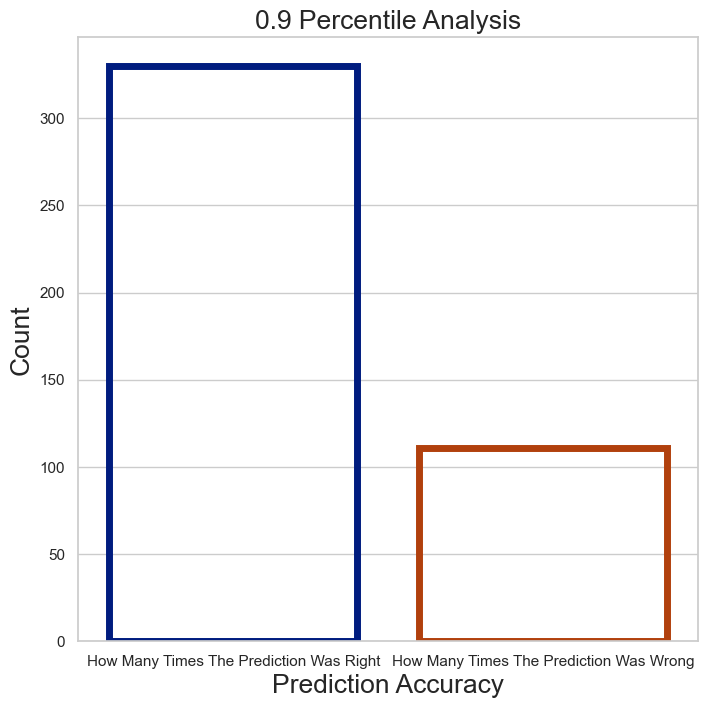

In [263]:
sns.set_style("whitegrid")
plt.gcf().set_size_inches((8,8))
ax = sns.countplot(x="Prediction Accuracy", data=df3,
                   palette=flatui,
                   #title = '0.1 Percentile Analysis',
                   facecolor=(0, 0, 0, 0),
                   linewidth=5,
                   edgecolor=sns.color_palette("dark", 3))
ax.set_title('0.9 Percentile Analysis',size=19)
plt.xlabel("Prediction Accuracy", size=19)
plt.ylabel("Count", size=19)

In [27]:
Predictions1 = []
for i in regressiondata2.Amount_of_Bathrooms:
    if i == 0.5:Predictions1.append('Between: $150,001 - $287,968')
    if i == 0.75: Predictions1.append('Between: $150,001 - $287,968')
    if i == 1.0:Predictions1.append('Between: $150,001 - $287,968')
    if i == 1.5:Predictions1.append('Between: $150,001 - $287,968') 
    if i == 1.75:Predictions1.append('Between: $150,001 - $287,968')
    if i == 2.0:Predictions1.append('Between: $150,001 - $287,968')
    if i == 2.25:Predictions1.append('Between: $150,001 - $287,968')
    if i == 2.5:Predictions1.append('Between: $150,001 - $287,968') 
    if i == 2.75:Predictions1.append('Between: $252,542 - $537,396')
    if i == 3.0: Predictions1.append('Between: $252,542 - $537,396')
    if i == 3.25:Predictions1.append('Between: $252,542 - $537,396')
    if i == 3.5:Predictions1.append('Between: $252,542 - $537,396') 
    if i == 3.75:Predictions1.append('Between: $252,542 - $537,396')
    if i == 4.0:Predictions1.append('Between: $252,542 - $537,396')
    if i == 4.25:Predictions1.append('Between: $252,542 - $537,396')
    if i == 4.5:Predictions1.append('Between: $252,542 - $537,396')
    if i == 4.75: Predictions1.append('Between: $252,542 - $537,396')
    if i == 5.0:Predictions1.append('Between: $252,542 - $537,396')
    if i == 5.25:Predictions1.append('Between: $252,542 - $537,396') 
len(Predictions1)

4403

In [29]:
price = []
for i in regressiondata2.Price:
    price.append("${:,.0f}".format(i))

In [30]:
Prediction1 = pd.DataFrame({'Amount of Bathrooms':regressiondata2.Amount_of_Bathrooms,
                           'Prediction':Predictions1,'Actual Price':price})
Prediction1

,Amount of Bathrooms,Prediction,Actual Price
0,2.50,"Between: $150,001 - $287,968","$323,000"
1,2.50,"Between: $150,001 - $287,968","$285,000"
2,2.50,"Between: $150,001 - $287,968","$1,350,000"
3,2.50,"Between: $150,001 - $287,968","$292,500"
4,2.50,"Between: $150,001 - $287,968","$301,000"
...,...,...,...
4398,5.00,"Between: $252,542 - $537,396","$784,500"
4399,5.00,"Between: $252,542 - $537,396","$480,000"
4400,5.00,"Between: $252,542 - $537,396","$343,000"
4401,5.25,"Between: $252,542 - $537,396","$300,000"


In [35]:
def PRICE_FLOORS(AMOUNT_FLOORS):
    
    locations = house_info['Location'].tolist()

    amount_floors = house_info['Floors'].tolist()

    floors_index = []
    for i,x in enumerate(amount_floors):
        if x == AMOUNT_FLOORS:floors_index.append(i)
    len(floors_index)

    floors_southking = []
    for i in floors_index:
        if locations[i] == 98092 : floors_southking.append(i)
        elif locations[i] == 98002 : floors_southking.append(i)
        elif locations[i] == 98001 : floors_southking.append(i)
        elif locations[i] == 98070 : floors_southking.append(i)
        elif locations[i] == 98038 : floors_southking.append(i)
        elif locations[i] == 98023 : floors_southking.append(i)
        elif locations[i] == 98003 : floors_southking.append(i)
        elif locations[i] == 98010 : floors_southking.append(i)
        elif locations[i] == 98022 : floors_southking.append(i)
        elif locations[i] == 98198 : floors_southking.append(i)
        elif locations[i] == 98188 : floors_southking.append(i)
        elif locations[i] == 98148 : floors_southking.append(i)
        elif locations[i] == 98042 : floors_southking.append(i)
        elif locations[i] == 98032 : floors_southking.append(i)
        elif locations[i] == 98031 : floors_southking.append(i)
        elif locations[i] == 98030 : floors_southking.append(i)

    price = house_info["Price"].tolist()

    price_southking = []
    for i in floors_southking:price_southking.append(price[i])
    return(price_southking)

no_of_floors = house_info["Floors"].value_counts().index.tolist()
price_floors_southking = []
for i in no_of_floors:
    price_floors_southking.append(PRICE_FLOORS(i))
price_floors_southking = sum(price_floors_southking, [])
len(price_floors_southking)

4403

In [36]:
def AMOUNT_FLOORS(AMOUNT_FLOORS):
    locations = house_info['Location'].tolist()

    amount_floors = house_info["Floors"].tolist()
    X_value = []
    floors_index = []
    for i,x in enumerate(amount_floors):
        if x == AMOUNT_FLOORS:floors_index.append(i)

    for i in floors_index:
        if locations[i] == 98092 : X_value.append(AMOUNT_FLOORS)
        elif locations[i] == 98002 : X_value.append(AMOUNT_FLOORS)
        elif locations[i] == 98001 : X_value.append(AMOUNT_FLOORS)
        elif locations[i] == 98070 : X_value.append(AMOUNT_FLOORS)
        elif locations[i] == 98038 : X_value.append(AMOUNT_FLOORS)
        elif locations[i] == 98023 : X_value.append(AMOUNT_FLOORS)
        elif locations[i] == 98003 : X_value.append(AMOUNT_FLOORS)
        elif locations[i] == 98010 : X_value.append(AMOUNT_FLOORS)
        elif locations[i] == 98022 : X_value.append(AMOUNT_FLOORS)
        elif locations[i] == 98198: X_value.append(AMOUNT_FLOORS)
        elif locations[i] == 98188 : X_value.append(AMOUNT_FLOORS)
        elif locations[i] == 98148 : X_value.append(AMOUNT_FLOORS)
        elif locations[i] == 98042 : X_value.append(AMOUNT_FLOORS)
        elif locations[i] == 98032 : X_value.append(AMOUNT_FLOORS)
        elif locations[i] == 98031 : X_value.append(AMOUNT_FLOORS)
        elif locations[i] == 98030 : X_value.append(AMOUNT_FLOORS)
    return X_value
no_of_floors = house_info["Floors"].value_counts().index.tolist()
amount_floors_southking = []
for i in no_of_floors:
    amount_floors_southking.append(AMOUNT_FLOORS(i))
amount_floors_southking= sum(amount_floors_southking, [])
len(amount_floors_southking)

4403

In [37]:
regressiondata3 = pd.DataFrame({'Amount_of_Floors':amount_floors_southking,
                                'Price':price_floors_southking})
regressiondata3

,Amount_of_Floors,Price
0,1.0,291850.0
1,1.0,189000.0
2,1.0,230000.0
3,1.0,252700.0
4,1.0,240000.0
...,...,...
4398,2.5,325000.0
4399,2.5,345000.0
4400,2.5,429900.0
4401,2.5,552900.0


<ipython-input-153-5da0c8f60b6e>:14: UserWarning:

FixedFormatter should only be used together with FixedLocator



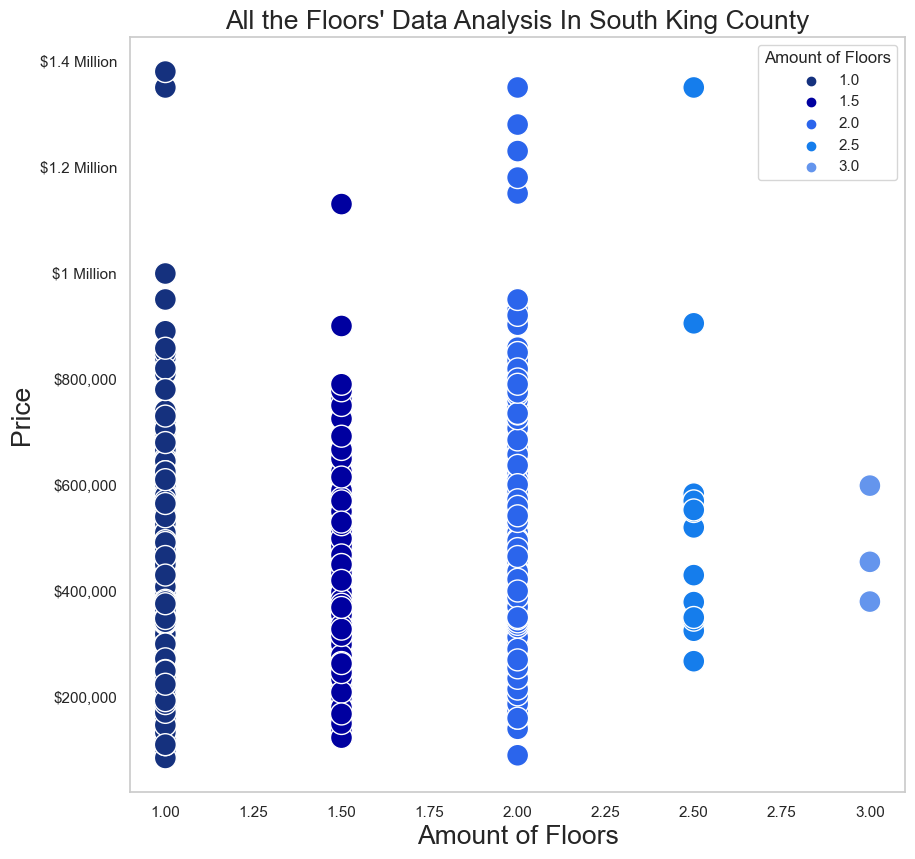

In [153]:
x = regressiondata3['Amount_of_Floors']
y = regressiondata3['Price']
flatui = ['#15317E','#0000A0','#2B65EC','#157DEC','#6495ED']
#sns.set_palette(flatui)
plt.rcParams.update({'font.size': 10, 'figure.dpi':100})
ax = sns.scatterplot(data=regressiondata3, x=x, y=y,s=250, linewidth = 1,
                     hue='Amount_of_Floors',
                     palette=flatui)
plt.grid(linestyle='-', linewidth=0.2)
ax.set_title('All the Floors\' Data Analysis In South King County',size=19)
plt.xlabel("Amount of Floors", size=19)
plt.legend(title='Amount of Floors')
plt.ylabel("Price", size=19)
ax.set_yticklabels(['0','$200,000','$400,000','$600,000','$800,000',
                         '$1 Million','$1.2 Million','$1.4 Million'])
plt.gcf().set_size_inches((10,10))
xticks=ax.xaxis.get_major_ticks()
plt.show()

In [154]:
train_df, test_df = train_test_split(regressiondata3, test_size=0.10, shuffle=False)

In [155]:
X_train, y_train = train_df[['Amount_of_Floors']], train_df[['Price']]
X_test, y_test = test_df[['Amount_of_Floors']], test_df[['Price']]

In [156]:
classifiers = {}
for tau in [0.1, 0.5, 0.9]:
    clf = LGBMRegressor(objective='quantile', alpha=tau)
    clf.fit(X_train, y_train)
    preds = pd.DataFrame(clf.predict(X_test), columns = [str(tau)])
    classifiers[str(tau)] = {'clf': clf, 'predictions': preds}

In [157]:
Quantile_regression2 = pd.DataFrame({'Amount_of_Floors': X_test.reset_index()['Amount_of_Floors'],
              '0.1': classifiers['0.1']['predictions']['0.1'],
              '0.5': classifiers['0.5']['predictions']['0.5'],
              '0.9': classifiers['0.9']['predictions']['0.9'],
              'Price': y_test.reset_index()['Price']})

In [158]:
Quantile_regression2

,Amount_of_Floors,0.1,0.5,0.9,Price
0,2.0,249998.670602,329998.685211,510198.364715,342000.0
1,2.0,249998.670602,329998.685211,510198.364715,367899.0
2,2.0,249998.670602,329998.685211,510198.364715,279000.0
3,2.0,249998.670602,329998.685211,510198.364715,310000.0
4,2.0,249998.670602,329998.685211,510198.364715,274000.0
...,...,...,...,...,...
436,2.5,249998.670602,329998.685211,510198.364715,325000.0
437,2.5,249998.670602,329998.685211,510198.364715,345000.0
438,2.5,249998.670602,329998.685211,510198.364715,429900.0
439,2.5,249998.670602,329998.685211,510198.364715,552900.0


In [159]:
melted_data = pd.melt(Quantile_regression2, id_vars=['Amount_of_Floors'])
melted_data = melted_data.dropna()
melted_data = melted_data.drop(range(1323,1764))
melted_data = melted_data.rename(columns={'variable': 'Percentile'})
melted_data

,Amount_of_Floors,Percentile,value
0,2.0,0.1,249998.670602
1,2.0,0.1,249998.670602
2,2.0,0.1,249998.670602
3,2.0,0.1,249998.670602
4,2.0,0.1,249998.670602
...,...,...,...
1318,2.5,0.9,510198.364715
1319,2.5,0.9,510198.364715
1320,2.5,0.9,510198.364715
1321,2.5,0.9,510198.364715


<ipython-input-160-bfadb8f0368a>:9: UserWarning:

FixedFormatter should only be used together with FixedLocator



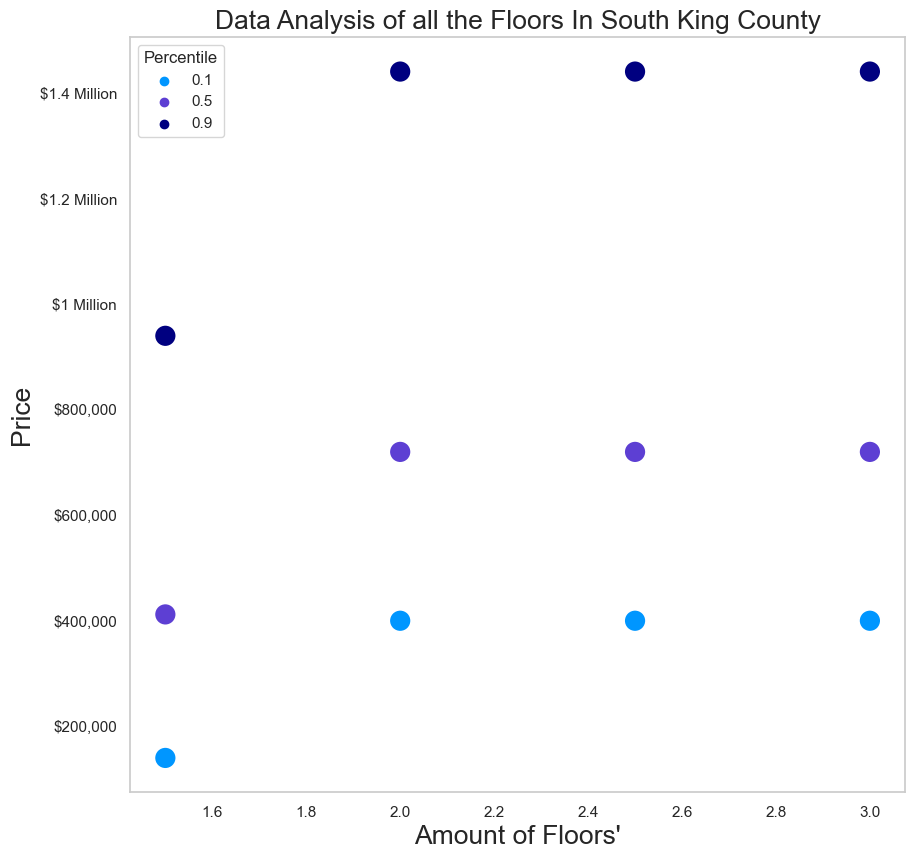

In [160]:
plt.rcParams.update({'font.size': 10, 'figure.dpi':100})
flatui = ["#0096FF","#5D3FD3","#000080",]
ax =sns.scatterplot(data=melted_data, x="Amount_of_Floors",y='value',s=250,palette=flatui,
                    hue='Percentile')          
plt.grid(linestyle='-', linewidth=0.2)
ax.set_title('Data Analysis of all the Floors In South King County',size=19)
plt.xlabel("Amount of Floors'", size=19)
plt.ylabel("Price", size=19)
ax.set_yticklabels(['0','$200,000','$400,000','$600,000','$800,000',
                         '$1 Million','$1.2 Million','$1.4 Million'])
ylabel = plt.ylabel("Price")
xlabel = plt.xlabel("Amount of Floors'")
plt.gcf().set_size_inches((10,10))

In [161]:
Quantileregression_updated = pd.DataFrame({'Amount_of_Floors':[1.00,1.50,2.00,2.50,3.00],
    '0.1':[185000.397093,185000.397093,249998.670602,249998.670602,249998.670602],
'0.5':[253000.730438,253000.730438,329998.685211,329998.685211,329998.685211],
'0.9':[385001.723771,385001.723771,510198.364715,510198.364715,510198.364715]})
Quantileregression_updated

,Amount_of_Floors,0.1,0.5,0.9
0,1.0,185000.397093,253000.730438,385001.723771
1,1.5,185000.397093,253000.730438,385001.723771
2,2.0,249998.670602,329998.685211,510198.364715
3,2.5,249998.670602,329998.685211,510198.364715
4,3.0,249998.670602,329998.685211,510198.364715


In [162]:
melted_data = pd.melt(Quantileregression_updated, id_vars=['Amount_of_Floors'])
melted_data = melted_data.dropna()
melted_data = melted_data.rename(columns={'variable': 'Percentile'})
melted_data

,Amount_of_Floors,Percentile,value
0,1.0,0.1,185000.397093
1,1.5,0.1,185000.397093
2,2.0,0.1,249998.670602
3,2.5,0.1,249998.670602
4,3.0,0.1,249998.670602
5,1.0,0.5,253000.730438
6,1.5,0.5,253000.730438
7,2.0,0.5,329998.685211
8,2.5,0.5,329998.685211
9,3.0,0.5,329998.685211


<ipython-input-163-3c056bf717fd>:10: UserWarning:

FixedFormatter should only be used together with FixedLocator



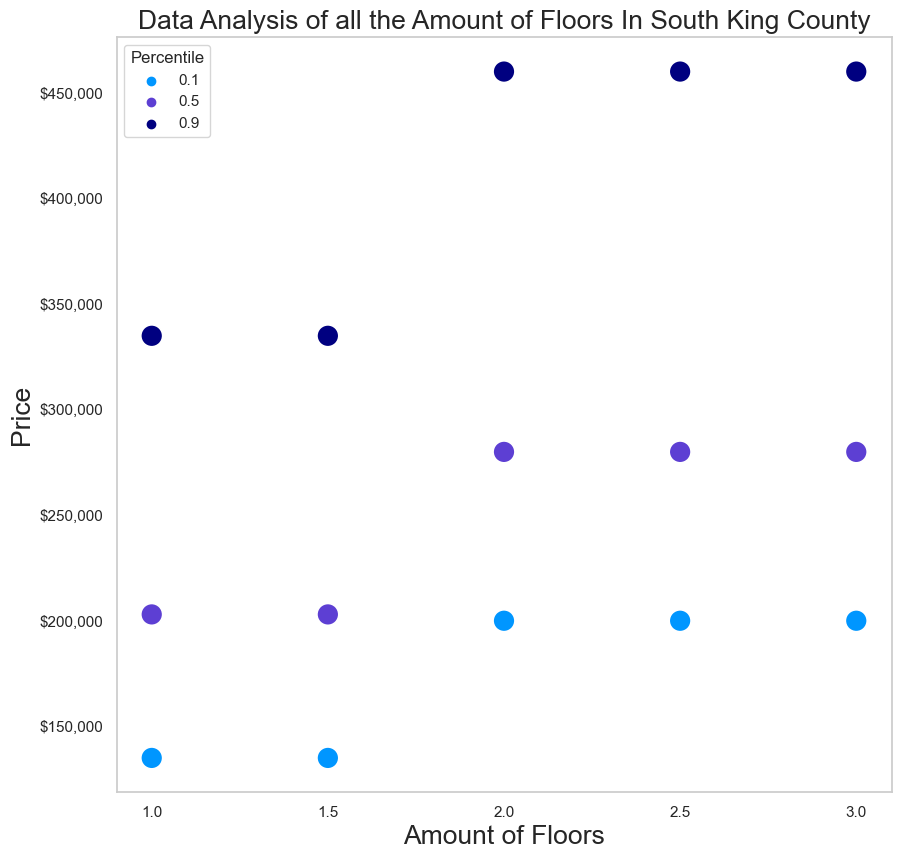

In [163]:
plt.rcParams.update({'font.size': 10, 'figure.dpi':100})
flatui = ["#0096FF","#5D3FD3","#000080",]
ax =sns.scatterplot(data=melted_data, x="Amount_of_Floors",palette=flatui,y='value',s=250,
                    hue='Percentile')
plt.xticks(np.arange(1.0,3.5,0.50))           
plt.grid(linestyle='-', linewidth=0.2)
ax.set_title('Data Analysis of all the Amount of Floors In South King County',size=19)
plt.xlabel("Amount of Floors", size=19)
plt.ylabel("Price", size=19)
ax.set_yticklabels(['0','$150,000','$200,000','$250,000','$300,000','$350,000',
                         '$400,000','$450,000','$500,000','$550,000'])
ylabel = plt.ylabel("Price")
xlabel = plt.xlabel("Amount of Floors")
plt.gcf().set_size_inches((10,10))

<ipython-input-164-bf7c0e7a049b>:15: UserWarning:

FixedFormatter should only be used together with FixedLocator



[Text(0, 150000.0, '0'),
 Text(0, 200000.0, '$150,000'),
 Text(0, 250000.0, '$200,000'),
 Text(0, 300000.0, '$250,000'),
 Text(0, 350000.0, '$300,000'),
 Text(0, 400000.0, '$350,000'),
 Text(0, 450000.0, '$400,000'),
 Text(0, 500000.0, '$450,000'),
 Text(0, 550000.0, '$500,000')]

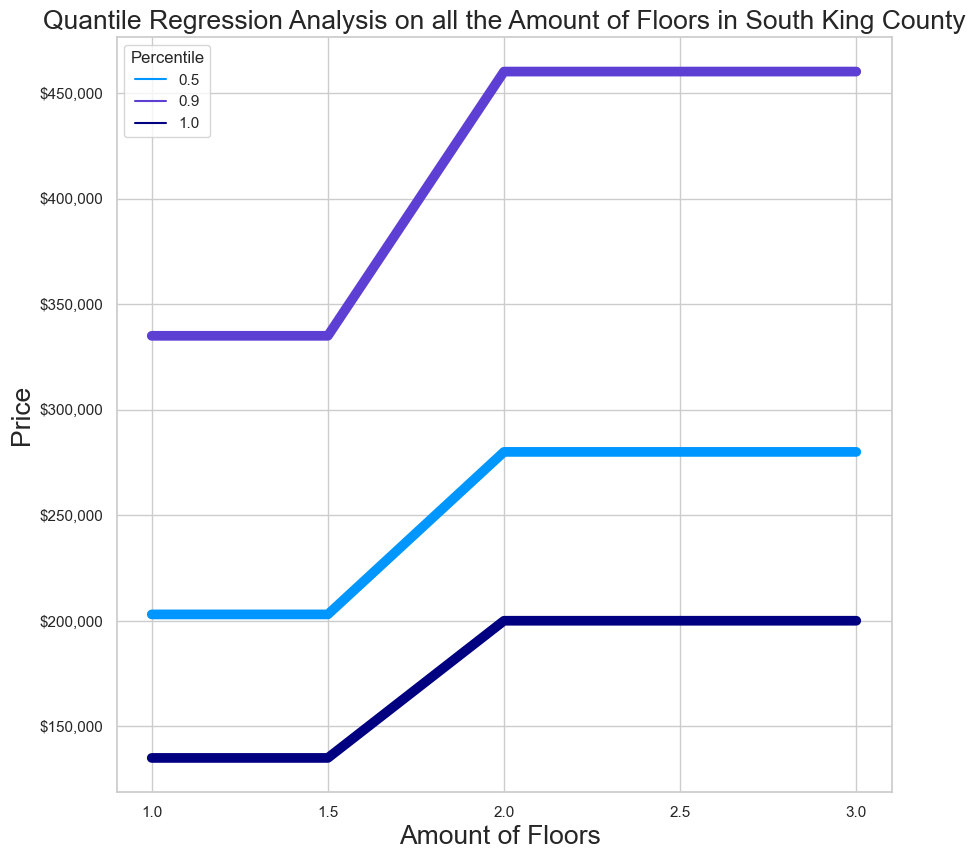

In [164]:
sns.set_style("whitegrid")
flatui = ["#0096FF","#5D3FD3","#000080"]
ax=sns.lineplot( x=[1.00,1.50,2.00,2.50,3.00,1.00,1.50,2.00,2.50,3.00,1.00,1.50,2.00,2.50,3.00],
                linewidth = 7,palette=flatui,
               hue=[1.0,1.0,1.0,1.0,1.0,0.5,0.5,0.5,0.5,0.5,0.9,0.9,0.9,0.9,0.9],
                y=[185000.397093,185000.397093,249998.670602,249998.670602,249998.670602,
                  253000.730438,253000.730438,329998.685211,329998.685211,329998.685211,
                  385001.723771,385001.723771,510198.364715,510198.364715,510198.364715])
plt.gcf().set_size_inches((10,10))
plt.xticks(np.arange(1.0,3.5,0.50))  
plt.legend(title='Percentile')
ax.set_title('Quantile Regression Analysis on all the Amount of Floors in South King County',size=19)
plt.xlabel("Amount of Floors ", size=19)
plt.ylabel("Price", size=19)
ax.set_yticklabels(['0','$150,000','$200,000','$250,000','$300,000','$350,000',
                         '$400,000','$450,000','$500,000','$550,000'])

In [258]:
(Quantile_regression2['Price'] > Quantile_regression2['0.1']).value_counts()

True     418
False     23
dtype: int64

In [259]:
i = 0
y= 0
x = []
while i < 418:
    x.append('How Many Times The Prediction Was Right')
    i+=1
while y < 23:
    x.append('How Many Times The Prediction Was Wrong')
    y+=1
len(x)
df3 = pd.DataFrame({'Prediction Accuracy':x})

Text(0, 0.5, 'Count')

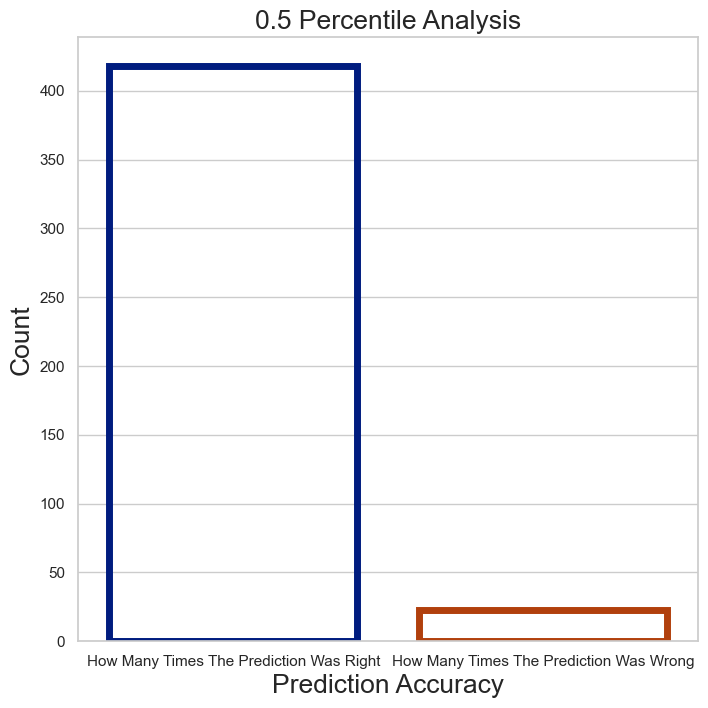

In [260]:
sns.set_style("whitegrid")
plt.gcf().set_size_inches((8,8))
ax = sns.countplot(x="Prediction Accuracy", data=df3,
                   palette=flatui,
                   #title = '0.1 Percentile Analysis',
                   facecolor=(0, 0, 0, 0),
                   linewidth=5,
                   edgecolor=sns.color_palette("dark", 3))
ax.set_title('0.5 Percentile Analysis',size=19)
plt.xlabel("Prediction Accuracy", size=19)
plt.ylabel("Count", size=19)

In [255]:
(Quantile_regression2['Price'] > Quantile_regression2['0.5']).value_counts()

True     266
False    175
dtype: int64

In [256]:
i = 0
y= 0
x = []
while i < 266:
    x.append('How Many Times The Prediction Was Right')
    i+=1
while y < 175:
    x.append('How Many Times The Prediction Was Wrong')
    y+=1
len(x)
df3 = pd.DataFrame({'Prediction Accuracy':x})

Text(0, 0.5, 'Count')

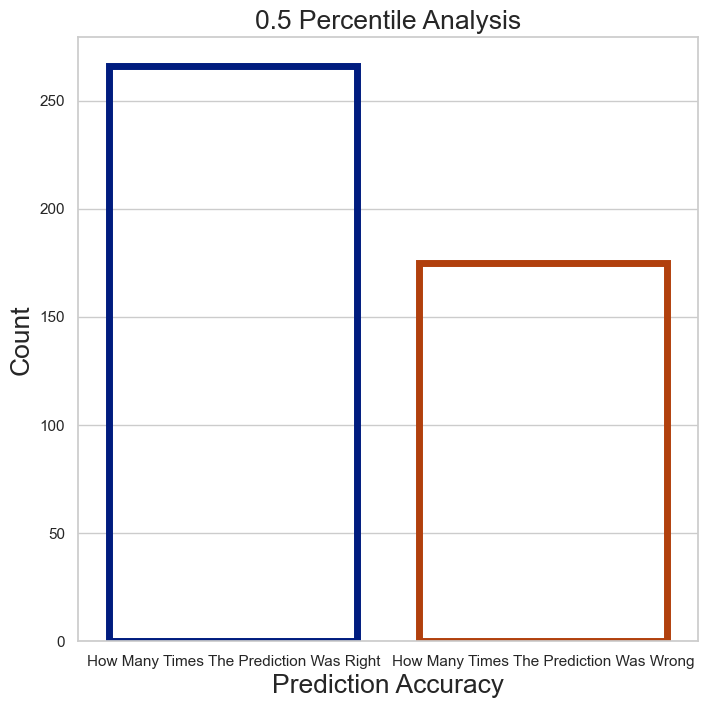

In [257]:
sns.set_style("whitegrid")
plt.gcf().set_size_inches((8,8))
ax = sns.countplot(x="Prediction Accuracy", data=df3,
                   palette=flatui,
                   #title = '0.1 Percentile Analysis',
                   facecolor=(0, 0, 0, 0),
                   linewidth=5,
                   edgecolor=sns.color_palette("dark", 3))
ax.set_title('0.5 Percentile Analysis',size=19)
plt.xlabel("Prediction Accuracy", size=19)
plt.ylabel("Count", size=19)

In [251]:
(Quantile_regression2['Price'] > Quantile_regression2['0.9']).value_counts()

False    367
True      74
dtype: int64

In [253]:
i = 0
y= 0
x = []
while i < 367:
    x.append('How Many Times The Prediction Was Right')
    i+=1
while y < 74:
    x.append('How Many Times The Prediction Was Wrong')
    y+=1
len(x)
df3 = pd.DataFrame({'Prediction Accuracy':x})

Text(0, 0.5, 'Count')

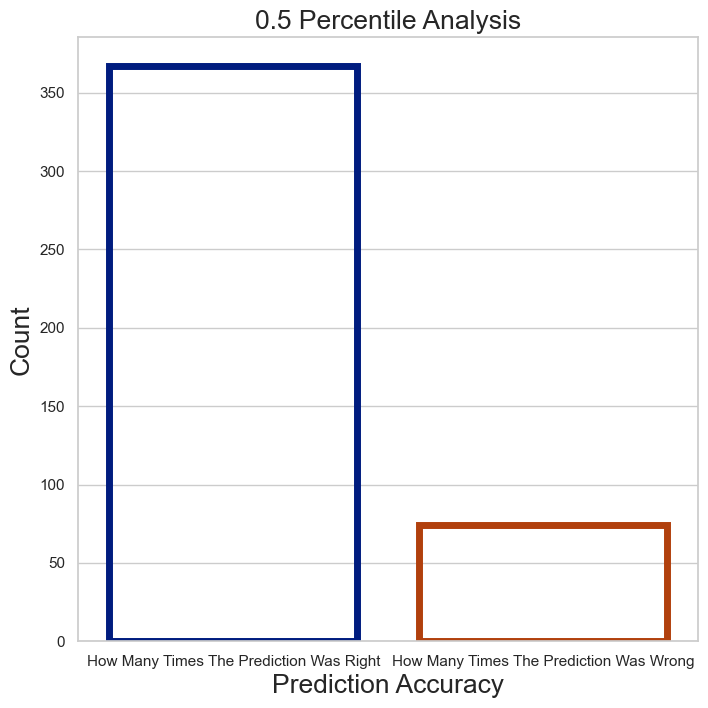

In [254]:
sns.set_style("whitegrid")
plt.gcf().set_size_inches((8,8))
ax = sns.countplot(x="Prediction Accuracy", data=df3,
                   palette=flatui,
                   #title = '0.1 Percentile Analysis',
                   facecolor=(0, 0, 0, 0),
                   linewidth=5,
                   edgecolor=sns.color_palette("dark", 3))
ax.set_title('0.5 Percentile Analysis',size=19)
plt.xlabel("Prediction Accuracy", size=19)
plt.ylabel("Count", size=19)

In [38]:
Predictions2 = []
for i in regressiondata3.Amount_of_Floors:
    if i == 1.0:Predictions2.append('Between: $185,000 - $385,001') 
    if i == 1.5:Predictions2.append('Between: $185,000 - $385,001') 
    if i == 2.0:Predictions2.append('Between: $249,998 - $510,198')
    if i == 2.5:Predictions2.append('Between: $249,998 - $510,198') 
    if i == 3.0: Predictions2.append('Between: $249,998 - $510,198')
len(Predictions2)

4403

In [41]:
price = []
for i in regressiondata3.Price:
    price.append("${:,.0f}".format(i))

In [42]:
Prediction2 = pd.DataFrame({'Amount of Floors':regressiondata3.Amount_of_Floors,
                           'Prediction':Predictions2,'Actual Price':price})
Prediction2

,Amount of Floors,Prediction,Actual Price
0,1.0,"Between: $185,000 - $385,001","$291,850"
1,1.0,"Between: $185,000 - $385,001","$189,000"
2,1.0,"Between: $185,000 - $385,001","$230,000"
3,1.0,"Between: $185,000 - $385,001","$252,700"
4,1.0,"Between: $185,000 - $385,001","$240,000"
...,...,...,...
4398,2.5,"Between: $249,998 - $510,198","$325,000"
4399,2.5,"Between: $249,998 - $510,198","$345,000"
4400,2.5,"Between: $249,998 - $510,198","$429,900"
4401,2.5,"Between: $249,998 - $510,198","$552,900"


In [8]:
def PRICE_YEARS_BUILT(YEAR_BUILT):
    
    locations = house_info['Location'].tolist()

    year_built = house_info['Year Built'].tolist()

    years_built_index = []
    for i,x in enumerate(year_built):
        if x == YEAR_BUILT:years_built_index.append(i)

    years_built_southking = []
    for i in years_built_index:
        if locations[i] == 98092 : years_built_southking.append(i)
        elif locations[i] == 98002 : years_built_southking.append(i)
        elif locations[i] == 98001 : years_built_southking.append(i)
        elif locations[i] == 98070 : years_built_southking.append(i)
        elif locations[i] == 98038 : years_built_southking.append(i)
        elif locations[i] == 98023 : years_built_southking.append(i)
        elif locations[i] == 98003 : years_built_southking.append(i)
        elif locations[i] == 98010 : years_built_southking.append(i)
        elif locations[i] == 98022 : years_built_southking.append(i)
        elif locations[i] == 98198 : years_built_southking.append(i)
        elif locations[i] == 98188 : years_built_southking.append(i)
        elif locations[i] == 98148 : years_built_southking.append(i)
        elif locations[i] == 98042 : years_built_southking.append(i)
        elif locations[i] == 98032 : years_built_southking.append(i)
        elif locations[i] == 98031 : years_built_southking.append(i)
        elif locations[i] == 98030 : years_built_southking.append(i)

    price = house_info["Price"].tolist()

    price_southking = []
    for i in years_built_southking:price_southking.append(price[i])
    return(price_southking)

no_of_Year = house_info["Year Built"].value_counts().index.tolist()
price_Year_southking = []
for i in no_of_Year:
    price_Year_southking.append(PRICE_YEARS_BUILT(i))
price_Year_southking = sum(price_Year_southking, [])
len(price_Year_southking)

4403

In [9]:
def AMOUNT_YEARS_BUILT(AMOUNT_YEARS):
    locations = house_info['Location'].tolist()

    years_built = house_info["Year Built"].tolist()
    X_value = []
    years_index = []
    for i,x in enumerate(years_built):
        if x == AMOUNT_YEARS:years_index.append(i)

    for i in years_index:
        if locations[i] == 98092 : X_value.append(AMOUNT_YEARS)
        elif locations[i] == 98002 : X_value.append(AMOUNT_YEARS)
        elif locations[i] == 98001 : X_value.append(AMOUNT_YEARS)
        elif locations[i] == 98070 : X_value.append(AMOUNT_YEARS)
        elif locations[i] == 98038 : X_value.append(AMOUNT_YEARS)
        elif locations[i] == 98023 : X_value.append(AMOUNT_YEARS)
        elif locations[i] == 98003 : X_value.append(AMOUNT_YEARS)
        elif locations[i] == 98010 : X_value.append(AMOUNT_YEARS)
        elif locations[i] == 98022 : X_value.append(AMOUNT_YEARS)
        elif locations[i] == 98198: X_value.append(AMOUNT_YEARS)
        elif locations[i] == 98188 : X_value.append(AMOUNT_YEARS)
        elif locations[i] == 98148 : X_value.append(AMOUNT_YEARS)
        elif locations[i] == 98042 : X_value.append(AMOUNT_YEARS)
        elif locations[i] == 98032 : X_value.append(AMOUNT_YEARS)
        elif locations[i] == 98031 : X_value.append(AMOUNT_YEARS)
        elif locations[i] == 98030 : X_value.append(AMOUNT_YEARS)
    return X_value
no_of_years = house_info["Year Built"].value_counts().index.tolist()
amount_years_southking = []
for i in no_of_years:
    amount_years_southking.append(AMOUNT_YEARS_BUILT(i))
amount_years_southking= sum(amount_years_southking, [])
len(amount_years_southking)

4403

In [10]:
regressiondata4 = pd.DataFrame({'Year_Built':amount_years_southking,
                                'Price':price_Year_southking})
regressiondata4

,Year_Built,Price
0,2014,379000.0
1,2014,569950.0
2,2014,255000.0
3,2014,600600.0
4,2014,329900.0
...,...,...
4398,1935,285000.0
4399,1935,199990.0
4400,1934,217000.0
4401,1934,510000.0


In [11]:
reg1,year1 = [],[]
for i,x in enumerate(amount_years_southking):
    if x == 1900:
        reg1.append(price_Year_southking[i])
        year1.append(x)
    if x == 1901:
        reg1.append(price_Year_southking[i])
        year1.append(x)
    if x == 1902:
        reg1.append(price_Year_southking[i])
        year1.append(x)
    if x == 1903:
        reg1.append(price_Year_southking[i])
        year1.append(x)
    if x == 1904:
        reg1.append(price_Year_southking[i])
        year1.append(x)
    if x == 1905:
        reg1.append(price_Year_southking[i])
        year1.append(x)
    if x == 1906:
        reg1.append(price_Year_southking[i])
        year1.append(x)
    if x == 1907:
        reg1.append(price_Year_southking[i])
        year1.append(x)
    if x == 1908:
        reg1.append(price_Year_southking[i])
        year1.append(x)
    if x == 1909:
        reg1.append(price_Year_southking[i])
        year1.append(x)
    if x == 1910:
        reg1.append(price_Year_southking[i])
        year1.append(x)
    if x == 1911:
        reg1.append(price_Year_southking[i])
        year1.append(x)
    if x == 1912:
        reg1.append(price_Year_southking[i])
        year1.append(x)
    if x == 1913:
        reg1.append(price_Year_southking[i])
        year1.append(x)
    if x == 1914:
        reg1.append(price_Year_southking[i])
        year1.append(x)
    if x == 1915:
        reg1.append(price_Year_southking[i])
        year1.append(x)
    if x == 1916:
        reg1.append(price_Year_southking[i])
        year1.append(x)
    if x == 1917:
        reg1.append(price_Year_southking[i])
        year1.append(x)
    if x == 1918:
        reg1.append(price_Year_southking[i])
        year1.append(x)
    if x == 1919:
        reg1.append(price_Year_southking[i])
        year1.append(x)
    if x == 1920:
        reg1.append(price_Year_southking[i])
        year1.append(x)
    if x == 1921:
        reg1.append(price_Year_southking[i])
        year1.append(x)
    if x == 1922:
        reg1.append(price_Year_southking[i])
        year1.append(x)
    if x == 1923:
        reg1.append(price_Year_southking[i])
        year1.append(x)
    if x == 1924:
        reg1.append(price_Year_southking[i])
        year1.append(x)
    if x == 1925:
        reg1.append(price_Year_southking[i])
        year1.append(x)
    if x == 1926:
        reg1.append(price_Year_southking[i])
        year1.append(x)
    if x == 1927:
        reg1.append(price_Year_southking[i])
        year1.append(x)
    if x == 1928:
        reg1.append(price_Year_southking[i])
        year1.append(x)
    if x == 1929:
        reg1.append(price_Year_southking[i])
        year1.append(x)
    if x == 1930:
        reg1.append(price_Year_southking[i])
        year1.append(x)
    if x == 1931:
        reg1.append(price_Year_southking[i])
        year1.append(x)
    if x == 1932:
        reg1.append(price_Year_southking[i])
        year1.append(x)
    if x == 1933:
        reg1.append(price_Year_southking[i])
        year1.append(x)
    if i == 1934:
        reg1.append(price_Year_southking[i])
        year1.append(x)
    if x == 1935:
        reg1.append(price_Year_southking[i])
        year1.append(x)
    if x == 1936:
        reg1.append(price_Year_southking[i])
        year1.append(x)
    if x == 1937:
        reg1.append(price_Year_southking[i])
        year1.append(x)
reg1.remove(420000.0)
year1.remove(1999)

In [12]:
regressiondata44 = pd.DataFrame({'Year_Built':year1,
                                'Price':reg1})
#for i,x in enumerate(regressiondata44['Year_Built'].value_counts()):
    #print(i,x)
    

In [13]:
reg1 = []
year1 = []
for i,x in enumerate(amount_years_southking):
    if x == 1938:
        reg1.append(price_Year_southking[i])
        year1.append(x)
    if x == 1939:
        reg1.append(price_Year_southking[i])
        year1.append(x)
    if x == 1940:
        reg1.append(price_Year_southking[i])
        year1.append(x)
    if x == 1941:
        reg1.append(price_Year_southking[i])
        year1.append(x)
    if x == 1942:
        reg1.append(price_Year_southking[i])
        year1.append(x)
    if x == 1943:
        reg1.append(price_Year_southking[i])
        year1.append(x)
    if x == 1944:
        reg1.append(price_Year_southking[i])
        year1.append(x)
    if x == 1945:
        reg1.append(price_Year_southking[i])
        year1.append(x)
    if x == 1946:
        reg1.append(price_Year_southking[i])
        year1.append(x)
    if x == 1947:
        reg1.append(price_Year_southking[i])
        year1.append(x)
    if x == 1948:
        reg1.append(price_Year_southking[i])
        year1.append(x)
    if x == 1949:
        reg1.append(price_Year_southking[i])
        year1.append(x)
    if x == 1950:
        reg1.append(price_Year_southking[i])
        year1.append(x)
    if x == 1951:
        reg1.append(price_Year_southking[i])
        year1.append(x)
    if x == 1952:
        reg1.append(price_Year_southking[i])
        year1.append(x)
    if x == 1953:
        reg1.append(price_Year_southking[i])
        year1.append(x)
    if x == 1954:
        reg1.append(price_Year_southking[i])
        year1.append(x)
    if x == 1955:
        reg1.append(price_Year_southking[i])
        year1.append(x)
    if x == 1956:
        reg1.append(price_Year_southking[i])
        year1.append(x)
    if x == 1957:
        reg1.append(price_Year_southking[i])
        year1.append(x)
    if x == 1958:
        reg1.append(price_Year_southking[i])
        year1.append(x)
    if x == 1959:
        reg1.append(price_Year_southking[i])
        year1.append(x)
    if x == 1960:
        reg1.append(price_Year_southking[i])
        year1.append(x)
    if x == 1961:
        reg1.append(price_Year_southking[i])
        year1.append(x)
    if x == 1962:
        reg1.append(price_Year_southking[i])
        year1.append(x)
    if x == 1963:
        reg1.append(price_Year_southking[i])
        year1.append(x)
    if x == 1964:
        reg1.append(price_Year_southking[i])
        year1.append(x)
    if x == 1965:
        reg1.append(price_Year_southking[i])
        year1.append(x)
    if x == 1966:
        reg1.append(price_Year_southking[i])
        year1.append(x)
    if x == 1967:
        reg1.append(price_Year_southking[i])
        year1.append(x)
    if x == 1968:
        reg1.append(price_Year_southking[i])
        year1.append(x)
    if x == 1969:
        reg1.append(price_Year_southking[i])
        year1.append(x)
    if x == 1970:
        reg1.append(price_Year_southking[i])
        year1.append(x)
    if x == 1971:
        reg1.append(price_Year_southking[i])
        year1.append(x)
    if i == 1972:
        reg1.append(price_Year_southking[i])
        year1.append(x)
    if x == 1973:
        reg1.append(price_Year_southking[i])
        year1.append(x)
    if x == 1974:
        reg1.append(price_Year_southking[i])
        year1.append(x)
    if x == 1975:
        reg1.append(price_Year_southking[i])
        year1.append(x)
reg1.remove(334950.0)
year1.remove(1999)       

In [14]:
regressiondata45 = pd.DataFrame({'Year_Built':year1,
                                'Price':reg1})
regressiondata45

,Year_Built,Price
0,1968,204000.0
1,1968,220000.0
2,1968,225000.0
3,1968,232000.0
4,1968,250000.0
...,...,...
1408,1938,294000.0
1409,1938,245000.0
1410,1938,389000.0
1411,1938,485000.0


In [15]:
reg1 = []
year1 = []
for i,x in enumerate(amount_years_southking):
    if x == 1976:
        reg1.append(price_Year_southking[i])
        year1.append(x)
    if x == 1977:
        reg1.append(price_Year_southking[i])
        year1.append(x)
    if x == 1978:
        reg1.append(price_Year_southking[i])
        year1.append(x)
    if x == 1979:
        reg1.append(price_Year_southking[i])
        year1.append(x)
    if x == 1980:
        reg1.append(price_Year_southking[i])
        year1.append(x)
    if x == 1981:
        reg1.append(price_Year_southking[i])
        year1.append(x)
    if x == 1982:
        reg1.append(price_Year_southking[i])
        year1.append(x)
    if x == 1983:
        reg1.append(price_Year_southking[i])
        year1.append(x)
    if x == 1984:
        reg1.append(price_Year_southking[i])
        year1.append(x)
    if x == 1985:
        reg1.append(price_Year_southking[i])
        year1.append(x)
    if x == 1986:
        reg1.append(price_Year_southking[i])
        year1.append(x)
    if x == 1987:
        reg1.append(price_Year_southking[i])
        year1.append(x)
    if x == 1988:
        reg1.append(price_Year_southking[i])
        year1.append(x)
    if x == 1989:
        reg1.append(price_Year_southking[i])
        year1.append(x)
    if x == 1990:
        reg1.append(price_Year_southking[i])
        year1.append(x)
    if x == 1991:
        reg1.append(price_Year_southking[i])
        year1.append(x)
    if x == 1992:
        reg1.append(price_Year_southking[i])
        year1.append(x)
    if x == 1993:
        reg1.append(price_Year_southking[i])
        year1.append(x)
    if x == 1994:
        reg1.append(price_Year_southking[i])
        year1.append(x)
    if x == 1995:
        reg1.append(price_Year_southking[i])
        year1.append(x)
    if x == 1996:
        reg1.append(price_Year_southking[i])
        year1.append(x)
    if x == 1997:
        reg1.append(price_Year_southking[i])
        year1.append(x)
    if x == 1998:
        reg1.append(price_Year_southking[i])
        year1.append(x)
    if x == 1999:
        reg1.append(price_Year_southking[i])
        year1.append(x)
    if x == 2001:
        reg1.append(price_Year_southking[i])
        year1.append(x)
    if x == 2002:
        reg1.append(price_Year_southking[i])
        year1.append(x)
    if x == 2003:
        reg1.append(price_Year_southking[i])
        year1.append(x)
    if x == 2004:
        reg1.append(price_Year_southking[i])
        year1.append(x)
    if x == 2005:
        reg1.append(price_Year_southking[i])
        year1.append(x)
    if x == 2006:
        reg1.append(price_Year_southking[i])
        year1.append(x)
    if x == 2007:
        reg1.append(price_Year_southking[i])
        year1.append(x)
    if x == 2008:
        reg1.append(price_Year_southking[i])
        year1.append(x)
    if x == 2009:
        reg1.append(price_Year_southking[i])
        year1.append(x)
    if x == 2010:
        reg1.append(price_Year_southking[i])
        year1.append(x)
    if i == 2011:
        reg1.append(price_Year_southking[i])
        year1.append(x)
    if x == 2012:
        reg1.append(price_Year_southking[i])
        year1.append(x)
    if x == 2013:
        reg1.append(price_Year_southking[i])
        year1.append(x)
    if x == 2014:
        reg1.append(price_Year_southking[i])
        year1.append(x)
reg1.remove(277500.0)
year1.remove(1963) 


In [16]:
regressiondata46 = pd.DataFrame({'Year_Built':year1,
                                'Price':reg1})
regressiondata46

,Year_Built,Price
0,2014,379000.0
1,2014,569950.0
2,2014,255000.0
3,2014,600600.0
4,2014,329900.0
...,...,...
2701,1982,249000.0
2702,1982,374000.0
2703,1982,179950.0
2704,1982,510000.0


In [17]:
flatui1 = ['#0B94BC','#119DC6','#10BEF1','#089DC8','#2A9CBD',
           '#45B9DB','#35B4D9','#3FC3EA','#18B7C8','#18C8DB',
          '#06D7ED','#3EC9D8','#53D5E2','#7BE8F3','#5CDDEB',
           
           '#A9D8E0','#B5DDE5','#A4C7D5','#9FC5D5','#9ECDE0',
           '#8FC9E1','#8BCAD0','#5493A9','#69AEC7','#529DB8',
        
           '#097985','#1A7781','#0E5B63','#09545C','#056973',
           '#156581','#1F647C','#14536A','#135C77','#095E7C']

In [18]:
flatui2 = ['#056EFA','#3489FA','#4590F2','#5B9CF0','#568DD5',
         '#5D8ECF','#6495D4','#4AA4E0','#0E9DEE','#42AEEB',
          '#65B6E4','#4E9DCA','#3B9BD1','#51AADC','#A9D2F0',
           
          '#9CCCEF','#C2E0EE','#D3E2EC','#DDE6EA','#CCE2EC',
        '#C0DCE9','#9ECAEC','#79AFDC','#3962A5','#6E97B9',
           
        '#036AA5','#046DA8','#1B6792','#0B4D9D','#164B8C',
         '#125588','#074C81','#065A9C','#085088','#3F5674','#304C70','#244570']

In [19]:
flatui3 = ['#3824C7','#3921E8','#4630EC','#2F16E5','#4331C9',
         '#162DEC','#3D4DD8','#2639D3','#1227D7','#132BEF',
          '#4658E8','#3E4ED2','#5563DD','#6774DE','#7882D9',
           
          '#B3BAEC','#C6CCF3','#CBD0EE','#D4D6E8','#DEE0F0',
        '#D9DBF0','#B3B3E8','#A7A3DB','#1A42A9','#432C9F',
           
        '#1A289D','#2C3F9F','#2A5192','#333899','#3A289C',
         '#362689','#3E3678','#3910B4','#30118B','#3E3485','#433B80','#4D4685']

<ipython-input-21-081efc2ebab8>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['0','$200,000','$400,000','$600,000','$800,000',
<ipython-input-21-081efc2ebab8>:18: MatplotlibDeprecationWarning: Passing the pad parameter of tight_layout() positionally is deprecated since Matplotlib 3.3; the parameter will become keyword-only two minor releases later.
  plt.tight_layout(4)
<ipython-input-21-081efc2ebab8>:33: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['0','$200,000','$400,000','$600,000','$800,000',
<ipython-input-21-081efc2ebab8>:38: MatplotlibDeprecationWarning: Passing the pad parameter of tight_layout() positionally is deprecated since Matplotlib 3.3; the parameter will become keyword-only two minor releases later.
  plt.tight_layout(4)
<ipython-input-21-081efc2ebab8>:55: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['0','$200,0

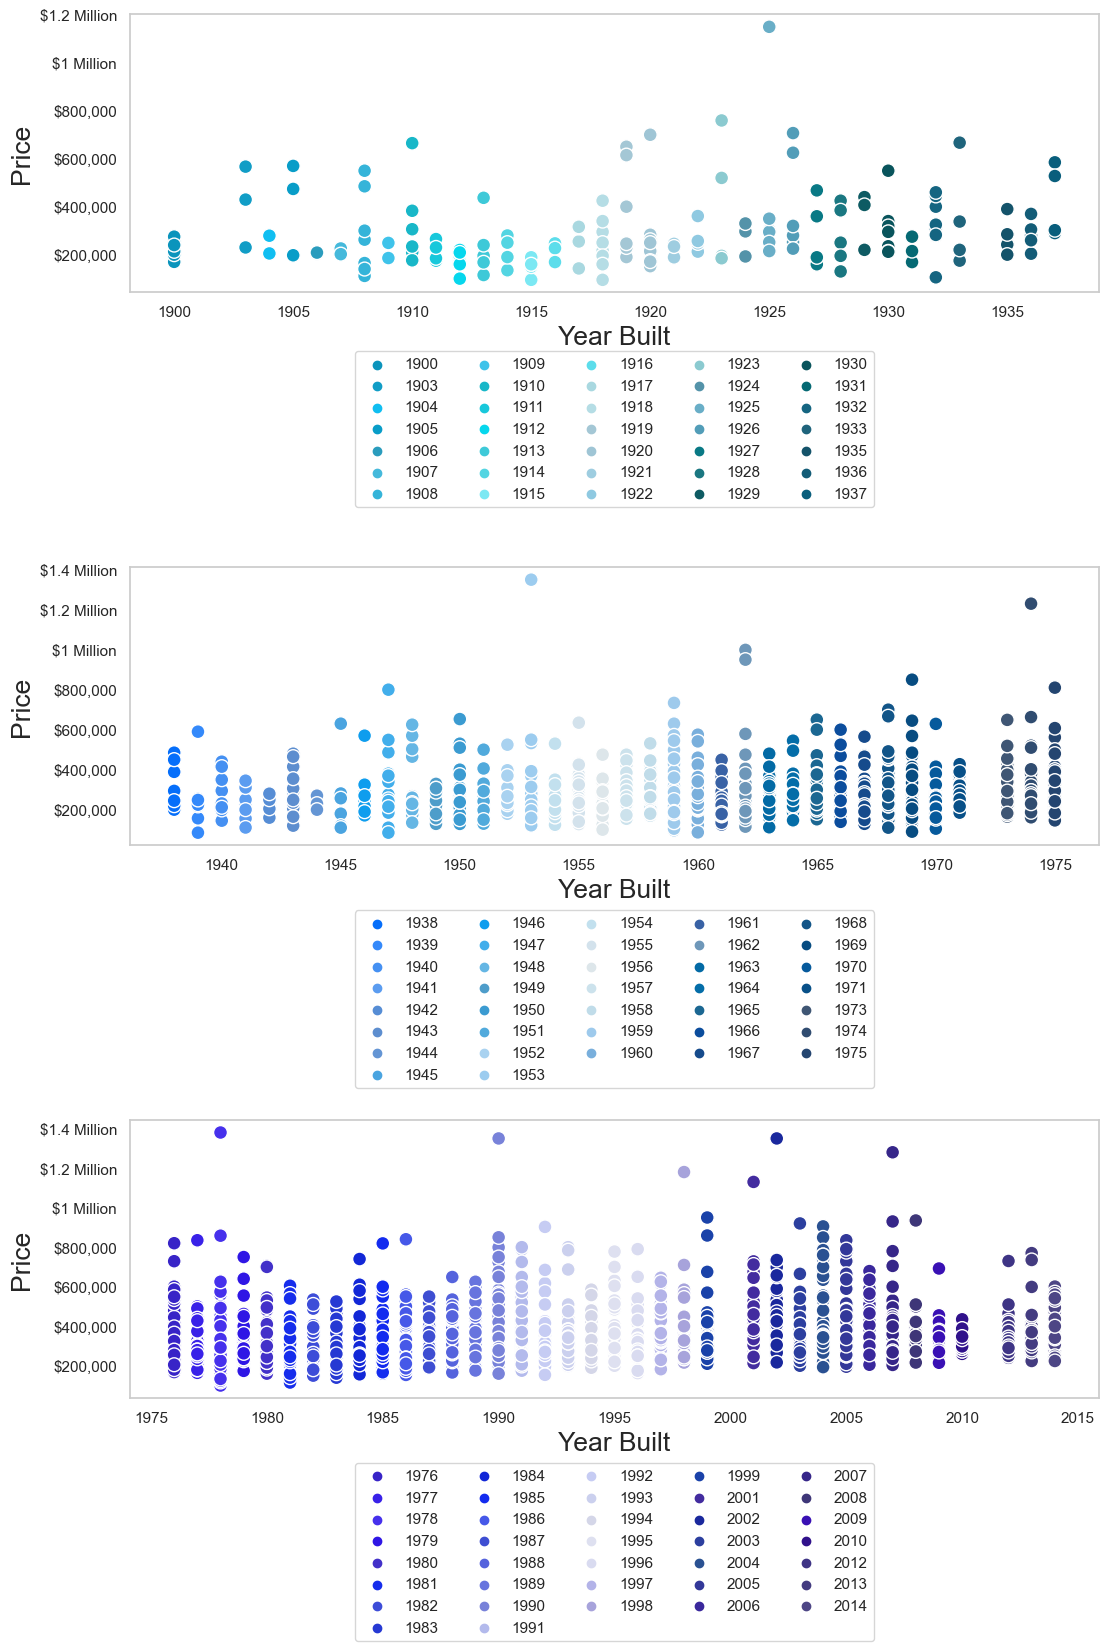

In [21]:
plt.subplot(3,1,1) #35 years in tottal
x = regressiondata44['Year_Built']
y = regressiondata44['Price']
data=regressiondata44
plt.rcParams.update({'font.size': 10, 'figure.dpi':100})
ax = sns.scatterplot(data=regressiondata44, x=x, y=y,s=100, linewidth = 1, hue='Year_Built'
                    ,palette=flatui1)
plt.grid(linestyle='-', linewidth=0.2)
#ax.set_title('All the Floors\' Data Analysis In South King County',size=19)
plt.xlabel("Year Built", size=19)
plt.legend(title='Year Built')
plt.ylabel("Price", size=19)
ax.set_yticklabels(['0','$200,000','$400,000','$600,000','$800,000',
                         '$1 Million','$1.2 Million','$1.4 Million'])
plt.legend(loc="lower center", bbox_to_anchor=(0.5, -0.80), ncol= 5)
plt.gcf().set_size_inches((10,10))
plt.gcf().set_size_inches(12, 15)
plt.tight_layout(4)

#xticks=ax.xaxis.get_major_ticks()

plt.subplot(3,1,2)
x = regressiondata45['Year_Built']
y = regressiondata45['Price']
plt.rcParams.update({'font.size': 10, 'figure.dpi':100})
ax = sns.scatterplot(data=regressiondata45, x=x, y=y,s=100, linewidth = 1, hue='Year_Built'
                    ,palette=flatui2)
plt.grid(linestyle='-', linewidth=0.2)
#ax.set_title('All the Floors\' Data Analysis In South King County',size=19)
plt.xlabel("Year Built", size=19)
plt.legend(title='Year Built')
plt.ylabel("Price", size=19)
ax.set_yticklabels(['0','$200,000','$400,000','$600,000','$800,000',
                         '$1 Million','$1.2 Million','$1.4 Million'])
plt.legend(loc="lower center", bbox_to_anchor=(0.5, -0.90), ncol= 5)
plt.gcf().set_size_inches((10,10))
plt.gcf().set_size_inches(12, 15)
plt.tight_layout(4)

#xticks=ax.xaxis.get_major_ticks(1930,1995)
#plt.xticks(np.arange(1930,1995)) 

plt.subplot(3,1,3)
sns.set(style="whitegrid")
x = regressiondata46['Year_Built']
y = regressiondata46['Price']
plt.rcParams.update({'font.size': 10, 'figure.dpi':100})
ax = sns.scatterplot(data=regressiondata46, x=x, y=y,s=100, linewidth = 1, hue='Year_Built'
                    ,palette=flatui3)
plt.grid(linestyle='-', linewidth=0.2)
#ax.set_title('All the Floors\' Data Analysis In South King County',size=19)
plt.xlabel("Year Built", size=19)
plt.legend(title='Year Built')
plt.ylabel("Price", size=19)
ax.set_yticklabels(['0','$200,000','$400,000','$600,000','$800,000',
                         '$1 Million','$1.2 Million','$1.4 Million'])
plt.legend(loc="lower center", bbox_to_anchor=(0.5, -0.90), ncol= 5)
plt.gcf().set_size_inches((10,10))
plt.gcf().set_size_inches(12, 15)
#plt.tight_layout(4)
plt.show()



In [272]:
train_df, test_df = train_test_split(regressiondata4, test_size=0.90, shuffle=False)

In [273]:
X_train, y_train = train_df[['Year_Built']], train_df[['Price']]
X_test, y_test = test_df[['Year_Built']], test_df[['Price']]

In [274]:
classifiers = {}
for tau in [0.1, 0.5, 0.9]:
    clf = LGBMRegressor(objective='quantile', alpha=tau)
    clf.fit(X_train, y_train)
    preds = pd.DataFrame(clf.predict(X_test), columns = [str(tau)])
    classifiers[str(tau)] = {'clf': clf, 'predictions': preds}

In [275]:
Quantile_regression3 = pd.DataFrame({'Year_Built': X_test.reset_index()['Year_Built'],
              '0.1': classifiers['0.1']['predictions']['0.1'],
              '0.5': classifiers['0.5']['predictions']['0.5'],
              '0.9': classifiers['0.9']['predictions']['0.9'],
              'Price': y_test.reset_index()['Price']})

In [276]:
Quantile_regression3[:50]

,Year_Built,0.1,0.5,0.9,Price
0,2003,260000.225772,320001.061128,451262.492994,549900.0
1,2003,260000.225772,320001.061128,451262.492994,490000.0
2,2003,260000.225772,320001.061128,451262.492994,325000.0
3,2003,260000.225772,320001.061128,451262.492994,323800.0
4,2003,260000.225772,320001.061128,451262.492994,359950.0
5,2003,260000.225772,320001.061128,451262.492994,354000.0
6,2003,260000.225772,320001.061128,451262.492994,375000.0
7,2003,260000.225772,320001.061128,451262.492994,275000.0
8,2003,260000.225772,320001.061128,451262.492994,383150.0
9,2003,260000.225772,320001.061128,451262.492994,395000.0


In [277]:
melted_data = pd.melt(Quantile_regression3, id_vars=['Year_Built'])
melted_data = melted_data.dropna()
melted_data = melted_data.drop(range(11889,15852))
#melted_data = melted_data.drop(range(1323,1764))#4
#melted_data = melted_data.drop(range(54,72))#44
#melted_data = melted_data.drop(range(426,568))#45
#melted_data = melted_data.drop(range(1626,2168))46
melted_data = melted_data.rename(columns={'variable': 'Percentile'})
melted_data

,Year_Built,Percentile,value
0,2003,0.1,260000.225772
1,2003,0.1,260000.225772
2,2003,0.1,260000.225772
3,2003,0.1,260000.225772
4,2003,0.1,260000.225772
...,...,...,...
11884,1935,0.9,451262.492994
11885,1935,0.9,451262.492994
11886,1934,0.9,451262.492994
11887,1934,0.9,451262.492994


In [42]:
Quantileregression_updated = pd.DataFrame({'Year_Built':[1900,1901,1902,1903,1904,1905,1906,1907,1908,
                                                         1909,
                                                        1910,1911,1912,1913,1914,1915,1916,1917,1918,
                                                         1919,
                                                        1920,1921,1922,1923,1924,1925,1926,1927,1928,
                                                         1929,
                                                        1930,1931,1932,1933,1934,1935,1935,1936,1937],
    '0.1':[260000.225772,260000.225772,260000.225772,260000.225772,
          260000.225772,260000.225772,260000.225772,260000.225772,
          260000.225772,260000.225772,260000.225772,260000.225772,
          260000.225772,260000.225772,260000.225772,260000.225772,
          260000.225772,260000.225772,260000.225772,260000.225772,
          260000.225772,260000.225772,260000.225772,260000.225772,
          260000.225772,260000.225772,260000.225772,260000.225772,
          260000.225772,260000.225772,260000.225772,260000.225772,
          260000.225772,260000.225772,260000.225772,260000.225772,
          260000.225772,260000.225772,260000.225772],
'0.5':[320001.061128,320001.061128,320001.061128,320001.061128,
      320001.061128,320001.061128,320001.061128,320001.061128,
      320001.061128,320001.061128,320001.061128,320001.061128,
      320001.061128,320001.061128,320001.061128,320001.061128,
      320001.061128,320001.061128,320001.061128,320001.061128,
      320001.061128,320001.061128,320001.061128,320001.061128,
      320001.061128,320001.061128,320001.061128,320001.061128,
      320001.061128,320001.061128,320001.061128,320001.061128,
      320001.061128,320001.061128,320001.061128,320001.061128,
      320001.061128,320001.061128,320001.061128],
'0.9':[451262.492994,451262.492994,451262.492994,451262.492994,
      451262.492994,451262.492994,451262.492994,451262.492994,
      451262.492994,451262.492994,451262.492994,451262.492994,
      451262.492994,451262.492994,451262.492994,451262.492994,
      451262.492994,451262.492994,451262.492994,451262.492994,
      451262.492994,451262.492994,451262.492994,451262.492994,
      451262.492994,451262.492994,451262.492994,451262.492994,
      451262.492994,451262.492994,451262.492994,451262.492994,
      451262.492994,451262.492994,451262.492994,451262.492994, 
      451262.492994,451262.492994,451262.492994]})
Quantileregression_updated

,Year_Built,0.1,0.5,0.9
0,1900,260000.225772,320001.061128,451262.492994
1,1901,260000.225772,320001.061128,451262.492994
2,1902,260000.225772,320001.061128,451262.492994
3,1903,260000.225772,320001.061128,451262.492994
4,1904,260000.225772,320001.061128,451262.492994
5,1905,260000.225772,320001.061128,451262.492994
6,1906,260000.225772,320001.061128,451262.492994
7,1907,260000.225772,320001.061128,451262.492994
8,1908,260000.225772,320001.061128,451262.492994
9,1909,260000.225772,320001.061128,451262.492994


In [43]:
melted_data1 = pd.melt(Quantileregression_updated, id_vars=['Year_Built'])
melted_data1 = melted_data1.rename(columns={'variable': 'Percentile'})
melted_data1

,Year_Built,Percentile,value
0,1900,0.1,260000.225772
1,1901,0.1,260000.225772
2,1902,0.1,260000.225772
3,1903,0.1,260000.225772
4,1904,0.1,260000.225772
...,...,...,...
112,1934,0.9,451262.492994
113,1935,0.9,451262.492994
114,1935,0.9,451262.492994
115,1936,0.9,451262.492994


In [44]:
Quantileregression_updated = pd.DataFrame({'Year_Built':[1938,1939,1940,1941,1942,1943,1944,1945,
                                                        1946,1947,1948,1949,1950,1951,1952,1953,
                                                        1954,1955,1956,1957,1958,1959,1960,1961,
                                                        1962,1963,1964,1965,1966,1967,1968,1969,
                                                        1970,1971,1972,1973,1974,1975],
    '0.1':[260000.225772,260000.225772,260000.225772,260000.225772,
          260000.225772,260000.225772,260000.225772,260000.225772,
          260000.225772,260000.225772,260000.225772,260000.225772,
          260000.225772,260000.225772,260000.225772,260000.225772,
          260000.225772,260000.225772,260000.225772,260000.225772,
          260000.225772,260000.225772,260000.225772,260000.225772,
          260000.225772,260000.225772,260000.225772,260000.225772,
          260000.225772,260000.225772,260000.225772,260000.225772,
          260000.225772,260000.225772,260000.225772,260000.225772,
          260000.225772,260000.225772],
'0.5':[320001.061128,320001.061128,320001.061128,320001.061128,
      320001.061128,320001.061128,320001.061128,320001.061128,
      320001.061128,320001.061128,320001.061128,320001.061128,
      320001.061128,320001.061128,320001.061128,320001.061128,
      320001.061128,320001.061128,320001.061128,320001.061128,
      320001.061128,320001.061128,320001.061128,320001.061128,
      320001.061128,320001.061128,320001.061128,320001.061128,
      320001.061128,320001.061128,320001.061128,320001.061128,
      320001.061128,320001.061128,320001.061128,320001.061128,
      320001.061128,320001.061128],
'0.9':[451262.492994,451262.492994,451262.492994,451262.492994,
      451262.492994,451262.492994,451262.492994,451262.492994,
      451262.492994,451262.492994,451262.492994,451262.492994,
      451262.492994,451262.492994,451262.492994,451262.492994,
      451262.492994,451262.492994,451262.492994,451262.492994,
      451262.492994,451262.492994,451262.492994,451262.492994,
      451262.492994,451262.492994,451262.492994,451262.492994,
      451262.492994,451262.492994,451262.492994,451262.492994,
      451262.492994,451262.492994,451262.492994,451262.492994,
      451262.492994,451262.492994]})
Quantileregression_updated

,Year_Built,0.1,0.5,0.9
0,1938,260000.225772,320001.061128,451262.492994
1,1939,260000.225772,320001.061128,451262.492994
2,1940,260000.225772,320001.061128,451262.492994
3,1941,260000.225772,320001.061128,451262.492994
4,1942,260000.225772,320001.061128,451262.492994
5,1943,260000.225772,320001.061128,451262.492994
6,1944,260000.225772,320001.061128,451262.492994
7,1945,260000.225772,320001.061128,451262.492994
8,1946,260000.225772,320001.061128,451262.492994
9,1947,260000.225772,320001.061128,451262.492994


In [45]:
melted_data2 = pd.melt(Quantileregression_updated, id_vars=['Year_Built'])
melted_data2 = melted_data2.rename(columns={'variable': 'Percentile'})
melted_data2

,Year_Built,Percentile,value
0,1938,0.1,260000.225772
1,1939,0.1,260000.225772
2,1940,0.1,260000.225772
3,1941,0.1,260000.225772
4,1942,0.1,260000.225772
...,...,...,...
109,1971,0.9,451262.492994
110,1972,0.9,451262.492994
111,1973,0.9,451262.492994
112,1974,0.9,451262.492994


In [46]:
Quantileregression_updated = pd.DataFrame({'Year_Built':[1976,1977,1978,1979,1980,1981,1982,1983,
                                                        1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,
                                                         1994,
                                                         1995,1996,1997,1998,
                                                         1999,2000,2001,2002,2003,2004,2005,2006,2007,
                                                         2008,2009,2010,2011,2012,2013,2014,2015],
    '0.1':[260000.225772,260000.225772,260000.225772,260000.225772,
          260000.225772,260000.225772,260000.225772,260000.225772,
          260000.225772,260000.225772,260000.225772,260000.225772,
          260000.225772,260000.225772,260000.225772,260000.225772,
          260000.225772,260000.225772,260000.225772,260000.225772,
          260000.225772,260000.225772,260000.225772,260000.225772,
          260000.225772,260000.225772,260000.225772,260000.225772,
          264600.113507,264600.113507,264600.113507,264600.113507,
          264600.113507,264600.113507,264600.113507,264600.113507,
          264600.113507,264600.113507,264600.113507,264600.113507],
'0.5':[320001.061128,320001.061128,320001.061128,320001.061128,
      320001.061128,320001.061128,320001.061128,320001.061128,
      320001.061128,320001.061128,320001.061128,320001.061128,
      320001.061128,320001.061128,320001.061128,320001.061128,
      320001.061128,320001.061128,320001.061128,320001.061128,
      320001.061128,320001.061128,320001.061128,320001.061128,
      320001.061128,320001.061128,320001.061128,320001.061128,
      365999.839304,365999.839304,365999.839304,365999.839304,
      365999.839304,365999.839304,365999.839304,365999.839304,
      365999.839304,365999.839304,365999.839304,365999.839304],
'0.9':[451262.492994,451262.492994,451262.492994,451262.492994,
      451262.492994,451262.492994,451262.492994,451262.492994,
      451262.492994,451262.492994,451262.492994,451262.492994,
      451262.492994,451262.492994,451262.492994,451262.492994,
      451262.492994,451262.492994,451262.492994,451262.492994,
      451262.492994,451262.492994,451262.492994,451262.492994,
      451262.492994,451262.492994,451262.492994,451262.492994,
      559747.598863,559747.598863,559747.598863,559747.598863,
      559747.598863,559747.598863,559747.598863,559747.598863,
      559747.598863,559747.598863,559747.598863,559747.598863]})
Quantileregression_updated

,Year_Built,0.1,0.5,0.9
0,1976,260000.225772,320001.061128,451262.492994
1,1977,260000.225772,320001.061128,451262.492994
2,1978,260000.225772,320001.061128,451262.492994
3,1979,260000.225772,320001.061128,451262.492994
4,1980,260000.225772,320001.061128,451262.492994
5,1981,260000.225772,320001.061128,451262.492994
6,1982,260000.225772,320001.061128,451262.492994
7,1983,260000.225772,320001.061128,451262.492994
8,1984,260000.225772,320001.061128,451262.492994
9,1985,260000.225772,320001.061128,451262.492994


In [47]:
melted_data3 = pd.melt(Quantileregression_updated, id_vars=['Year_Built'])
melted_data3 = melted_data3.rename(columns={'variable': 'Percentile'})
melted_data3

,Year_Built,Percentile,value
0,1976,0.1,260000.225772
1,1977,0.1,260000.225772
2,1978,0.1,260000.225772
3,1979,0.1,260000.225772
4,1980,0.1,260000.225772
...,...,...,...
115,2011,0.9,559747.598863
116,2012,0.9,559747.598863
117,2013,0.9,559747.598863
118,2014,0.9,559747.598863


<ipython-input-49-0a9b4853ef3f>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['0','$150,000','$200,000','$250,000','$300,000','$350,000',
<ipython-input-49-0a9b4853ef3f>:27: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['0','$150,000','$200,000','$250,000','$300,000','$350,000',
<ipython-input-49-0a9b4853ef3f>:44: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['0','$250,000','$300,000','$350,000', '$400,000','$450,000','$500,000','$550,000'])


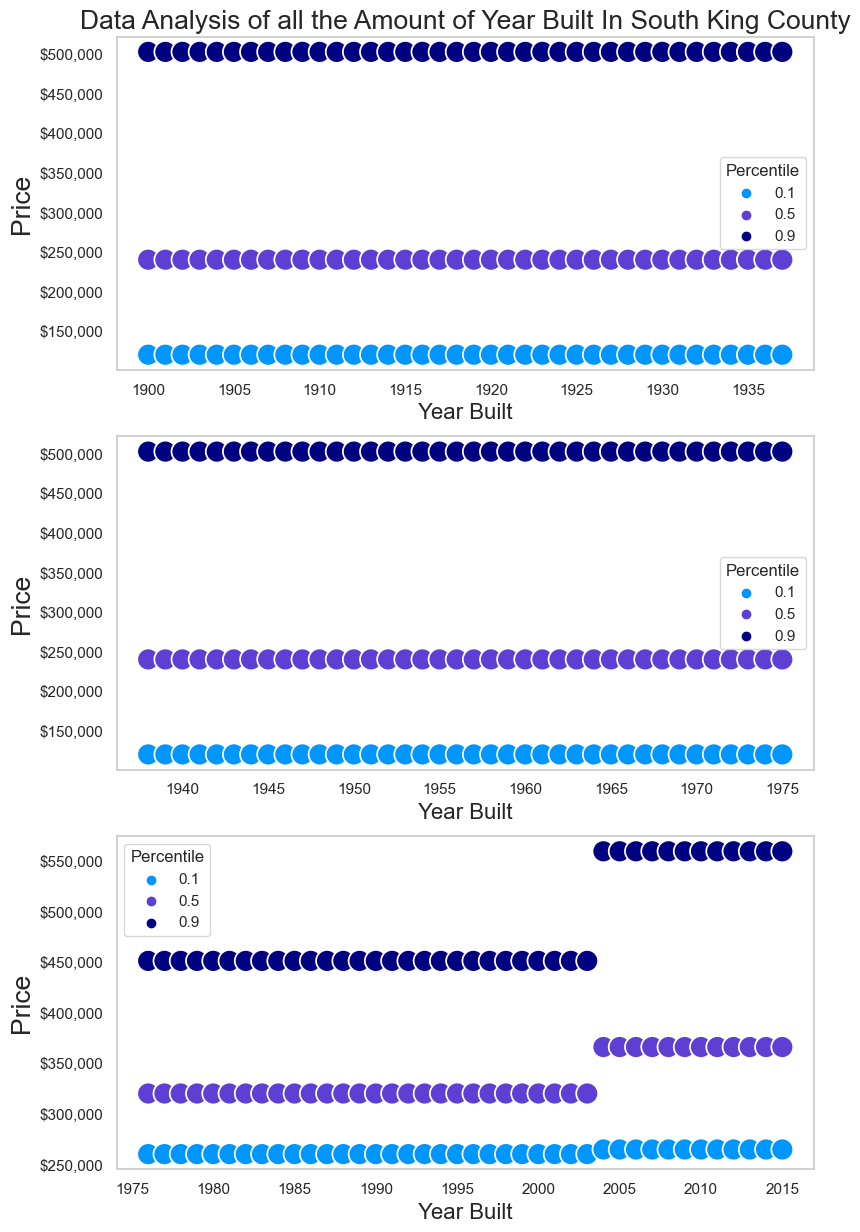

In [49]:
plt.subplot(3,1,1)
plt.rcParams.update({'font.size': 10, 'figure.dpi':100})
flatui = ["#0096FF","#5D3FD3","#000080",]
ax =sns.scatterplot(data=melted_data1, x="Year_Built",palette=flatui,y='value',s=250,
                    hue='Percentile')
plt.grid(linestyle='-', linewidth=0.2)
ax.set_title('Data Analysis of all the Amount of Year Built In South King County',size=19)
plt.xlabel("Year Built", size=16)
plt.ylabel("Price", size=19)
ax.set_yticklabels(['0','$150,000','$200,000','$250,000','$300,000','$350,000',
                         '$400,000','$450,000','$500,000','$550,000'])
ylabel = plt.ylabel("Price")
xlabel = plt.xlabel("Year Built")
plt.gcf().set_size_inches((10,10))
plt.gcf().set_size_inches(9, 15)


plt.subplot(3,1,2)
plt.rcParams.update({'font.size': 10, 'figure.dpi':100})
flatui = ["#0096FF","#5D3FD3","#000080",]
ax =sns.scatterplot(data=melted_data2, x="Year_Built",palette=flatui,y='value',s=250,
                    hue='Percentile')
plt.grid(linestyle='-', linewidth=0.2)
#ax.set_title('Data Analysis of all the Amount of Year Built In South King County',size=19)
plt.xlabel("Year Built", size=16)
plt.ylabel("Price", size=19)
ax.set_yticklabels(['0','$150,000','$200,000','$250,000','$300,000','$350,000',
                         '$400,000','$450,000','$500,000','$550,000'])
ylabel = plt.ylabel("Price")
xlabel = plt.xlabel("Year Built")
plt.gcf().set_size_inches((10,10))
plt.gcf().set_size_inches(9, 15)


plt.subplot(3,1,3)
plt.rcParams.update({'font.size': 10, 'figure.dpi':100})
flatui = ["#0096FF","#5D3FD3","#000080",]
ax =sns.scatterplot(data=melted_data3, x="Year_Built",palette=flatui,y='value',s=250,
                    hue='Percentile')
plt.grid(linestyle='-', linewidth=0.2)
#ax.set_title('Data Analysis of all the Amount of Year Built In South King County',size=19)
plt.xlabel("Year Built", size=16)
plt.ylabel("Price", size=19)
ax.set_yticklabels(['0','$250,000','$300,000','$350,000', '$400,000','$450,000','$500,000','$550,000'])
ylabel = plt.ylabel("Price")
xlabel = plt.xlabel("Year Built")
plt.gcf().set_size_inches((10,10))
plt.gcf().set_size_inches(9, 15)


<ipython-input-51-dc59db6f4797>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['0','$150,000','$200,000','$250,000','$300,000','$350,000',
<ipython-input-51-dc59db6f4797>:26: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['0','$150,000','$200,000','$250,000','$300,000','$350,000',
<ipython-input-51-dc59db6f4797>:41: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['0','$250,000','$300,000','$350,000', '$400,000','$450,000','$500,000','$550,000'])


[Text(0, 200000.0, '0'),
 Text(0, 250000.0, '$250,000'),
 Text(0, 300000.0, '$300,000'),
 Text(0, 350000.0, '$350,000'),
 Text(0, 400000.0, '$400,000'),
 Text(0, 450000.0, '$450,000'),
 Text(0, 500000.0, '$500,000'),
 Text(0, 550000.0, '$550,000'),
 Text(0, 600000.0, '')]

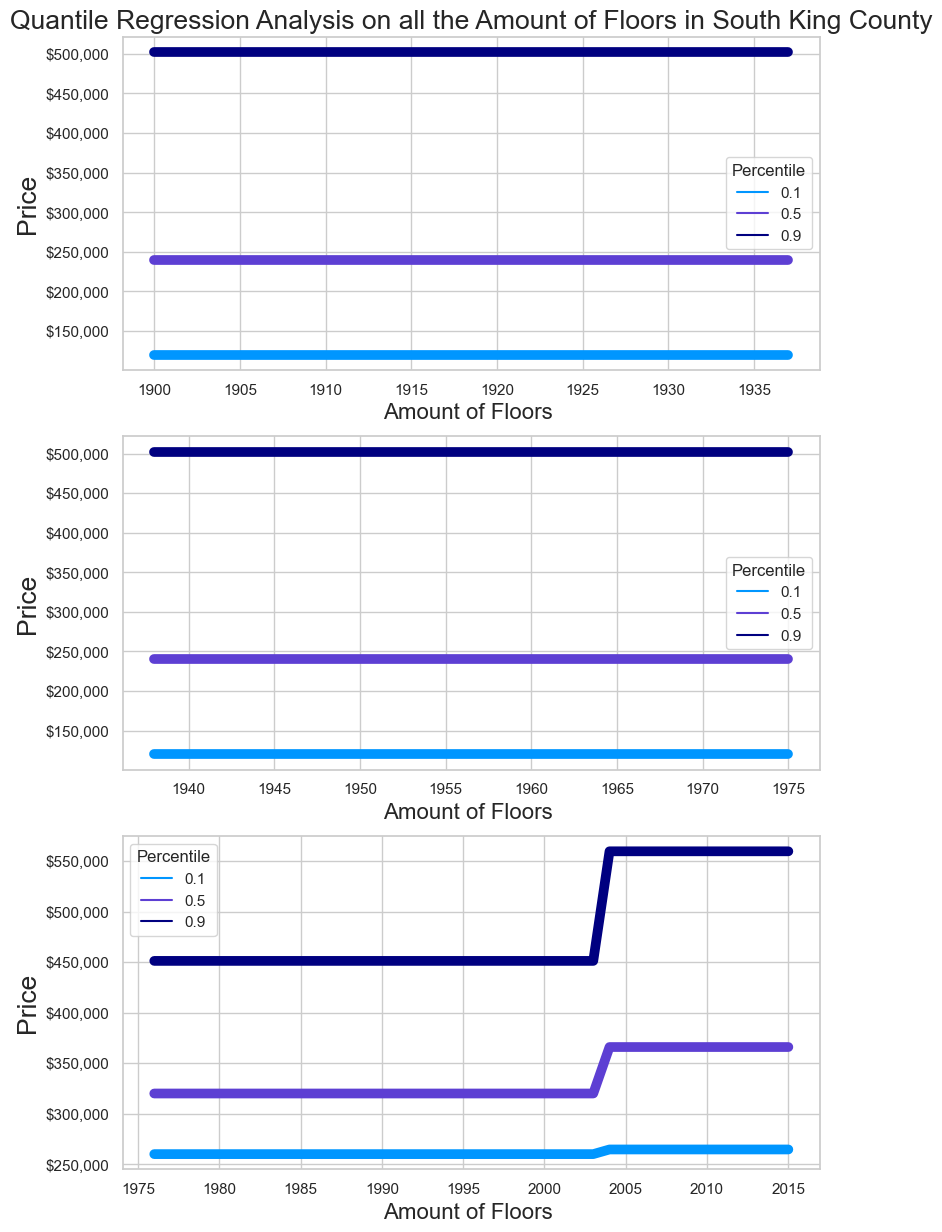

In [51]:
plt.subplot(3,1,1)
sns.set_style("whitegrid")
flatui = ["#0096FF","#5D3FD3","#000080"]
ax=sns.lineplot( data=melted_data1, x="Year_Built",y="value",
                linewidth = 7,palette=flatui,hue='Percentile')
plt.gcf().set_size_inches((10,10))
plt.gcf().set_size_inches(9, 15) 
plt.legend(title='Percentile')
ax.set_title('Quantile Regression Analysis on all the Amount of Floors in South King County',size=19)
plt.xlabel("Amount of Floors ", size=16)
plt.ylabel("Price", size=19)
ax.set_yticklabels(['0','$150,000','$200,000','$250,000','$300,000','$350,000',
                         '$400,000','$450,000','$500,000','$550,000'])


plt.subplot(3,1,2)
sns.set_style("whitegrid")
flatui = ["#0096FF","#5D3FD3","#000080"]
ax=sns.lineplot(  data=melted_data2, x="Year_Built",y="value",
                linewidth = 7,palette=flatui,hue='Percentile')
plt.gcf().set_size_inches((10,10))
plt.gcf().set_size_inches(9, 15)  
plt.legend(title='Percentile')
plt.xlabel("Amount of Floors ", size=16)
plt.ylabel("Price", size=19)
ax.set_yticklabels(['0','$150,000','$200,000','$250,000','$300,000','$350,000',
                         '$400,000','$450,000','$500,000','$550,000'])



plt.subplot(3,1,3)
sns.set_style("whitegrid")
flatui = ["#0096FF","#5D3FD3","#000080"]
ax=sns.lineplot( data=melted_data3, x="Year_Built",y="value",
                linewidth = 7,palette=flatui,hue='Percentile')
plt.gcf().set_size_inches((10,10))
plt.gcf().set_size_inches(9, 15)
plt.legend(title='Percentile')
plt.xlabel("Amount of Floors ", size=16)
plt.ylabel("Price", size=19)
ax.set_yticklabels(['0','$250,000','$300,000','$350,000', '$400,000','$450,000','$500,000','$550,000'])

In [278]:
(Quantile_regression3['Price'] > Quantile_regression3['0.1']).value_counts()

True     2324
False    1639
dtype: int64

In [279]:
i = 0
y= 0
x = []
while i < 2324:
    x.append('How Many Times The Prediction Was Right')
    i+=1
while y < 1639:
    x.append('How Many Times The Prediction Was Wrong')
    y+=1
len(x)
df1 = pd.DataFrame({'Prediction Accuracy':x})

In [280]:
(Quantile_regression3['Price'] > Quantile_regression3['0.5']).value_counts()

False    2779
True     1184
dtype: int64

In [281]:
i = 0
y= 0
x = []
while i < 2779:
    x.append('How Many Times The Prediction Was Right')
    i+=1
while y < 1184:
    x.append('How Many Times The Prediction Was Wrong')
    y+=1
len(x)
df2 = pd.DataFrame({'Prediction Accuracy':x})

In [282]:
(Quantile_regression3['Price'] > Quantile_regression3['0.9']).value_counts()

False    3608
True      355
dtype: int64

In [283]:
i = 0
y= 0
x = []
while i < 3608:
    x.append('How Many Times The Prediction Was Right')
    i+=1
while y < 355:
    x.append('How Many Times The Prediction Was Wrong')
    y+=1
len(x)
df3 = pd.DataFrame({'Prediction Accuracy':x})

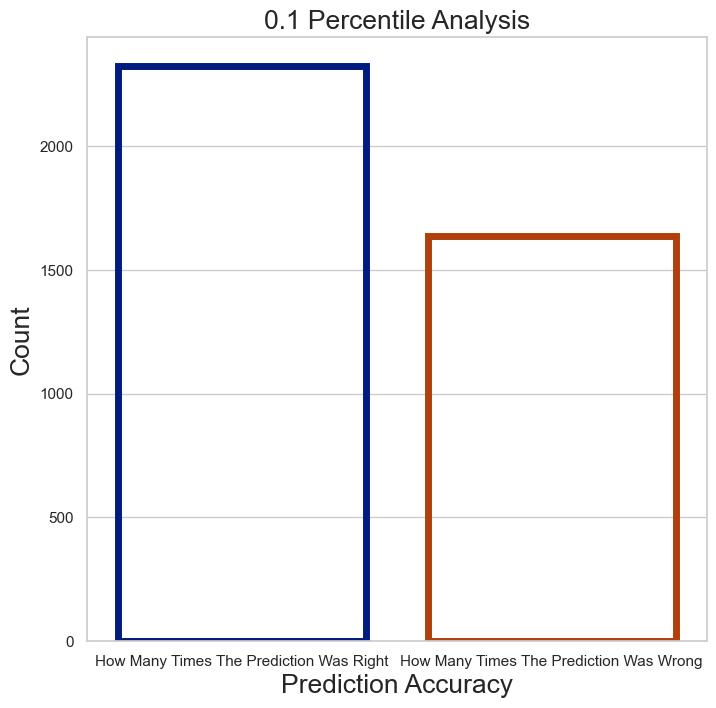

In [284]:
#plt.subplot(2, 1, 1) 
fig = plt.figure()
sns.set_style("whitegrid")
plt.gcf().set_size_inches((8,8))
ax = sns.countplot(x="Prediction Accuracy", data=df1,
                   palette=flatui,
                   #title = '0.1 Percentile Analysis',
                   facecolor=(0, 0, 0, 0),
                   linewidth=5,
                   edgecolor=sns.color_palette("dark", 3))
ax.set_title('0.1 Percentile Analysis',size=19)
plt.xlabel("Prediction Accuracy", size=19)
plt.ylabel("Count", size=19)
plt.show()

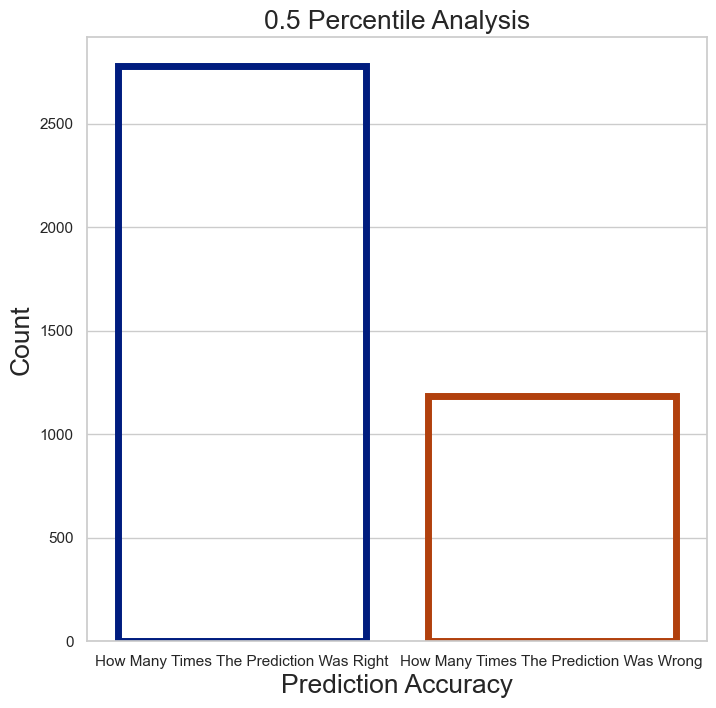

In [285]:
#plt.subplot(2, 1, 2)
sns.set_style("whitegrid")
plt.gcf().set_size_inches((8,8))
ax = sns.countplot(x="Prediction Accuracy", data=df2,
                   palette=flatui,
                   facecolor=(0, 0, 0, 0),
                   linewidth=5,
                   edgecolor=sns.color_palette("dark", 3))
ax.set_title('0.5 Percentile Analysis',size=19)
plt.xlabel("Prediction Accuracy", size=19)
plt.ylabel("Count", size=19)
plt.show()

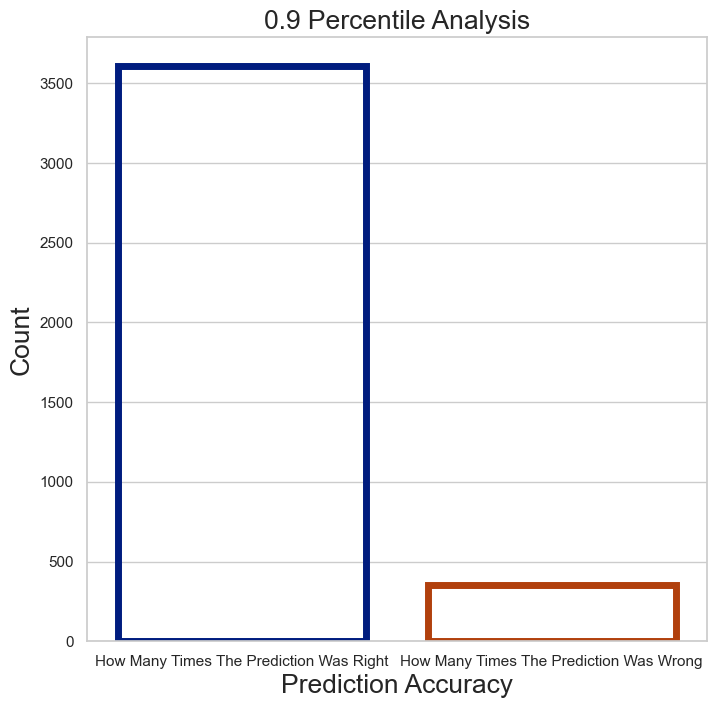

In [286]:
#plt.subplot(3,3,3)
sns.set_style("whitegrid")
plt.gcf().set_size_inches((8,8))
ax = sns.countplot(x="Prediction Accuracy", data=df3,
                   palette=flatui,
                   facecolor=(0, 0, 0, 0),
                   linewidth=5,
                   edgecolor=sns.color_palette("dark", 3))
ax.set_title('0.9 Percentile Analysis',size=19)
plt.xlabel("Prediction Accuracy", size=19)
plt.ylabel("Count", size=19)
plt.show()

In [46]:
Predictions3 = []
for i in regressiondata4.Year_Built:
    if i == 1900:Predictions3.append('Between: $260,000 - $451,262') 
    if i == 1901:Predictions3.append('Between: $260,000 - $451,262') 
    if i == 1902:Predictions3.append('Between: $260,000 - $451,262') 
    if i == 1903:Predictions3.append('Between: $260,000 - $451,262') 
    if i == 1904:Predictions3.append('Between: $260,000 - $451,262') 
    if i == 1905:Predictions3.append('Between: $260,000 - $451,262') 
    if i == 1906:Predictions3.append('Between: $260,000 - $451,262') 
    if i == 1907:Predictions3.append('Between: $260,000 - $451,262')
    if i == 1908:Predictions3.append('Between: $260,000 - $451,262') 
    if i == 1909:Predictions3.append('Between: $260,000 - $451,262') 
    if i == 1910:Predictions3.append('Between: $260,000 - $451,262') 
    if i == 1911:Predictions3.append('Between: $260,000 - $451,262') 
    if i == 1912:Predictions3.append('Between: $260,000 - $451,262') 
    if i == 1913:Predictions3.append('Between: $260,000 - $451,262') 
    if i == 1914:Predictions3.append('Between: $260,000 - $451,262') 
    if i == 1915:Predictions3.append('Between: $260,000 - $451,262')
    if i == 1916:Predictions3.append('Between: $260,000 - $451,262') 
    if i == 1917:Predictions3.append('Between: $260,000 - $451,262') 
    if i == 1918:Predictions3.append('Between: $260,000 - $451,262') 
    if i == 1919:Predictions3.append('Between: $260,000 - $451,262') 
    if i == 1920:Predictions3.append('Between: $260,000 - $451,262') 
    if i == 1921:Predictions3.append('Between: $260,000 - $451,262') 
    if i == 1922:Predictions3.append('Between: $260,000 - $451,262') 
    if i == 1923:Predictions3.append('Between: $260,000 - $451,262')
    if i == 1924:Predictions3.append('Between: $260,000 - $451,262') 
    if i == 1925:Predictions3.append('Between: $260,000 - $451,262') 
    if i == 1926:Predictions3.append('Between: $260,000 - $451,262') 
    if i == 1927:Predictions3.append('Between: $260,000 - $451,262') 
    if i == 1928:Predictions3.append('Between: $260,000 - $451,262') 
    if i == 1929:Predictions3.append('Between: $260,000 - $451,262') 
    if i == 1930:Predictions3.append('Between: $260,000 - $451,262') 
    if i == 1931:Predictions3.append('Between: $260,000 - $451,262')
    if i == 1932:Predictions3.append('Between: $260,000 - $451,262') 
    if i == 1933:Predictions3.append('Between: $260,000 - $451,262') 
    if i == 1934:Predictions3.append('Between: $260,000 - $451,262') 
    if i == 1935:Predictions3.append('Between: $260,000 - $451,262') 
    if i == 1936:Predictions3.append('Between: $260,000 - $451,262') 
    if i == 1937:Predictions3.append('Between: $260,000 - $451,262') 
    if i == 1938:Predictions3.append('Between: $260,000 - $451,262') 
    if i == 1939:Predictions3.append('Between: $260,000 - $451,262')
    if i == 1940:Predictions3.append('Between: $260,000 - $451,262') 
    if i == 1941:Predictions3.append('Between: $260,000 - $451,262') 
    if i == 1942:Predictions3.append('Between: $260,000 - $451,262') 
    if i == 1943:Predictions3.append('Between: $260,000 - $451,262') 
    if i == 1944:Predictions3.append('Between: $260,000 - $451,262') 
    if i == 1945:Predictions3.append('Between: $260,000 - $451,262') 
    if i == 1946:Predictions3.append('Between: $260,000 - $451,262') 
    if i == 1947:Predictions3.append('Between: $260,000 - $451,262')
    if i == 1948:Predictions3.append('Between: $260,000 - $451,262') 
    if i == 1949:Predictions3.append('Between: $260,000 - $451,262') 
    if i == 1950:Predictions3.append('Between: $260,000 - $451,262') 
    if i == 1951:Predictions3.append('Between: $260,000 - $451,262') 
    if i == 1952:Predictions3.append('Between: $260,000 - $451,262') 
    if i == 1953:Predictions3.append('Between: $260,000 - $451,262') 
    if i == 1954:Predictions3.append('Between: $260,000 - $451,262') 
    if i == 1955:Predictions3.append('Between: $260,000 - $451,262')
    if i == 1956:Predictions3.append('Between: $260,000 - $451,262') 
    if i == 1957:Predictions3.append('Between: $260,000 - $451,262') 
    if i == 1958:Predictions3.append('Between: $260,000 - $451,262') 
    if i == 1959:Predictions3.append('Between: $260,000 - $451,262') 
    if i == 1960:Predictions3.append('Between: $260,000 - $451,262') 
    if i == 1961:Predictions3.append('Between: $260,000 - $451,262') 
    if i == 1962:Predictions3.append('Between: $260,000 - $451,262') 
    if i == 1963:Predictions3.append('Between: $260,000 - $451,262')
    if i == 1964:Predictions3.append('Between: $260,000 - $451,262')
    if i == 1965:Predictions3.append('Between: $260,000 - $451,262') 
    if i == 1966:Predictions3.append('Between: $260,000 - $451,262') 
    if i == 1967:Predictions3.append('Between: $260,000 - $451,262') 
    if i == 1968:Predictions3.append('Between: $260,000 - $451,262') 
    if i == 1969:Predictions3.append('Between: $260,000 - $451,262') 
    if i == 1970:Predictions3.append('Between: $260,000 - $451,262') 
    if i == 1971:Predictions3.append('Between: $260,000 - $451,262') 
    if i == 1972:Predictions3.append('Between: $260,000 - $451,262')
    if i == 1973:Predictions3.append('Between: $260,000 - $451,262') 
    if i == 1974:Predictions3.append('Between: $260,000 - $451,262') 
    if i == 1975:Predictions3.append('Between: $260,000 - $451,262') 
    if i == 1976:Predictions3.append('Between: $260,000 - $451,262') 
    if i == 1977:Predictions3.append('Between: $260,000 - $451,262') 
    if i == 1978:Predictions3.append('Between: $260,000 - $451,262') 
    if i == 1979:Predictions3.append('Between: $260,000 - $451,262') 
    if i == 1980:Predictions3.append('Between: $260,000 - $451,262')
    if i == 1981:Predictions3.append('Between: $260,000 - $451,262') 
    if i == 1982:Predictions3.append('Between: $260,000 - $451,262') 
    if i == 1983:Predictions3.append('Between: $260,000 - $451,262') 
    if i == 1984:Predictions3.append('Between: $260,000 - $451,262') 
    if i == 1985:Predictions3.append('Between: $260,000 - $451,262') 
    if i == 1986:Predictions3.append('Between: $260,000 - $451,262') 
    if i == 1987:Predictions3.append('Between: $260,000 - $451,262') 
    if i == 1988:Predictions3.append('Between: $260,000 - $451,262') 
    if i == 1989:Predictions3.append('Between: $260,000 - $451,262') 
    if i == 1990:Predictions3.append('Between: $260,000 - $451,262') 
    if i == 1991:Predictions3.append('Between: $260,000 - $451,262') 
    if i == 1992:Predictions3.append('Between: $260,000 - $451,262') 
    if i == 1993:Predictions3.append('Between: $260,000 - $451,262')
    if i == 1994:Predictions3.append('Between: $260,000 - $451,262') 
    if i == 1995:Predictions3.append('Between: $260,000 - $451,262') 
    if i == 1996:Predictions3.append('Between: $260,000 - $451,262') 
    if i == 1997:Predictions3.append('Between: $260,000 - $451,262') 
    if i == 1998:Predictions3.append('Between: $260,000 - $451,262') 
    if i == 1999:Predictions3.append('Between: $260,000 - $451,262') 
    if i == 2000:Predictions3.append('Between: $260,000 - $451,262') 
    if i == 2001:Predictions3.append('Between: $260,000 - $451,262')
    if i == 2002:Predictions3.append('Between: $260,000 - $451,262') 
    if i == 2003:Predictions3.append('Between: $260,000 - $451,262') 
    if i == 2004:Predictions3.append('Between: $264,600 - $559,747') 
    if i == 2005:Predictions3.append('Between: $264,600- $559,747')
    if i == 2006:Predictions3.append('Between: $264,000 - $559,747') 
    if i == 2007:Predictions3.append('Between: $264,000 - $559,747')
    if i == 2008:Predictions3.append('Between: $264,000 - $559,747') 
    if i == 2009:Predictions3.append('Between: $264,000 - $559,747') 
    if i == 2010:Predictions3.append('Between: $264,600 - $559,747') 
    if i == 2011:Predictions3.append('Between: $264,600- $559,747')
    if i == 2012:Predictions3.append('Between: $260,000 - $559,747') 
    if i == 2013:Predictions3.append('Between: $260,000 - $559,747') 
    if i == 2014:Predictions3.append('Between: $264,600 - $559,747') 
    if i == 2015:Predictions3.append('Between: $264,600- $559,747')
len(Predictions3)

4403

In [48]:
price = []
for i in regressiondata4.Price:
    price.append("${:,.0f}".format(i))

In [49]:
Prediction3 = pd.DataFrame({'Year Built':regressiondata4.Year_Built,
                           'Prediction':Predictions3,'Actual Price':price})
Prediction3

,Year Built,Prediction,Actual Price
0,2014,"Between: $264,600 - $559,747","$379,000"
1,2014,"Between: $264,600 - $559,747","$569,950"
2,2014,"Between: $264,600 - $559,747","$255,000"
3,2014,"Between: $264,600 - $559,747","$600,600"
4,2014,"Between: $264,600 - $559,747","$329,900"
...,...,...,...
4398,1935,"Between: $260,000 - $451,262","$285,000"
4399,1935,"Between: $260,000 - $451,262","$199,990"
4400,1934,"Between: $260,000 - $451,262","$217,000"
4401,1934,"Between: $260,000 - $451,262","$510,000"


In [50]:
def YEAR_RENOVATED(YEAR):
    
    locations = house_info['Location'].tolist()

    year = house_info['Year Renoveted'].tolist()

    year_index = []
    for i,x in enumerate(year):
        if x == YEAR:year_index.append(i)

    year_southking = []
    for i in year_index:
        if locations[i] == 98092 : year_southking.append(i)
        elif locations[i] == 98002 : year_southking.append(i)
        elif locations[i] == 98001 : year_southking.append(i)
        elif locations[i] == 98070 : year_southking.append(i)
        elif locations[i] == 98038 : year_southking.append(i)
        elif locations[i] == 98023 : year_southking.append(i)
        elif locations[i] == 98003 : year_southking.append(i)
        elif locations[i] == 98010 : year_southking.append(i)
        elif locations[i] == 98022 : year_southking.append(i)
        elif locations[i] == 98198 : year_southking.append(i)
        elif locations[i] == 98188 : year_southking.append(i)
        elif locations[i] == 98148 : year_southking.append(i)
        elif locations[i] == 98042 : year_southking.append(i)
        elif locations[i] == 98032 : year_southking.append(i)
        elif locations[i] == 98031 : year_southking.append(i)
        elif locations[i] == 98030 : year_southking.append(i)

    price = house_info["Price"].tolist()

    price_southking = []
    for i in year_southking:price_southking.append(price[i])
    return(price_southking)

year_renovated = house_info["Year Renoveted"].value_counts().index.tolist()
yearrenov_Price_southking = []
for i in year_renovated:
    yearrenov_Price_southking.append(YEAR_RENOVATED(i))
yearrenov_Price_southking = sum(yearrenov_Price_southking, [])
len(yearrenov_Price_southking)

3650

In [51]:
def AMOUNT_YEAR_RENOVATED(AMOUNT_YEAR):
    locations = house_info['Location'].tolist()

    year_renovated = house_info["Year Renoveted"].tolist()
    X_value = []
    year_index = []
    for i,x in enumerate(year_renovated):
        if x == AMOUNT_YEAR:year_index.append(i)

    for i in year_index:
        if locations[i] == 98092 : X_value.append(AMOUNT_YEAR)
        elif locations[i] == 98002 : X_value.append(AMOUNT_YEAR)
        elif locations[i] == 98001 : X_value.append(AMOUNT_YEAR)
        elif locations[i] == 98070 : X_value.append(AMOUNT_YEAR)
        elif locations[i] == 98038 : X_value.append(AMOUNT_YEAR)
        elif locations[i] == 98023 : X_value.append(AMOUNT_YEAR)
        elif locations[i] == 98003 : X_value.append(AMOUNT_YEAR)
        elif locations[i] == 98010 : X_value.append(AMOUNT_YEAR)
        elif locations[i] == 98022 : X_value.append(AMOUNT_YEAR)
        elif locations[i] == 98198: X_value.append(AMOUNT_YEAR)
        elif locations[i] == 98188 : X_value.append(AMOUNT_YEAR)
        elif locations[i] == 98148 : X_value.append(AMOUNT_YEAR)
        elif locations[i] == 98042 : X_value.append(AMOUNT_YEAR)
        elif locations[i] == 98032 : X_value.append(AMOUNT_YEAR)
        elif locations[i] == 98031 : X_value.append(AMOUNT_YEAR)
        elif locations[i] == 98030 : X_value.append(AMOUNT_YEAR)
    return X_value
year = house_info["Year Renoveted"].value_counts().index.tolist()
year_southking = []
for i in year:
    year_southking.append(AMOUNT_YEAR_RENOVATED(i))
year_southking= sum(year_southking, [])
len(year_southking)

3650

In [52]:
regressiondata5 = pd.DataFrame({'Year_Renoveted':year_southking,
                                'Price':yearrenov_Price_southking})
regressiondata5[3562:3649]
re5 = regressiondata5[3562:3649]
re5

,Year_Renoveted,Price
3562,2014.0,245990.0
3563,2014.0,199990.0
3564,2014.0,232000.0
3565,2014.0,225000.0
3566,2014.0,209000.0
...,...,...
3644,1960.0,160000.0
3645,1974.0,160000.0
3646,1957.0,168000.0
3647,1962.0,425000.0


In [363]:
flatui = [ '#4F617B','#425777','#4C5A6F','#133262','#07306E','#163360','#2A446B','#314767','#0E3879',
          '#09306C','#063277',
    
    
         '#0565F9','#146BF1','#1C6CE8','#246BDB','#367EEC','#2A6ED7','#367EEC','#3272D7','#2F76E4',
          '#2F72DA','#347DEE',
         
          '#6F9CE3','#648DCD','#557BB6','#6C91CB','#708FBE','#80A5DF','#79A6EA','#6B88B5','#7096D1',
          '#7E9FD2','#86A9E0',
          
         '#B5C6E0','#B8CDED','#95ABCE','#9EBAE6','#9FAEC5','#BDC7D5','#D4D9E0','#A6ACB5','#92969D',
          '#707E94','#677D9E']
len(flatui)

44

<ipython-input-364-6319f9134384>:13: UserWarning:

FixedFormatter should only be used together with FixedLocator



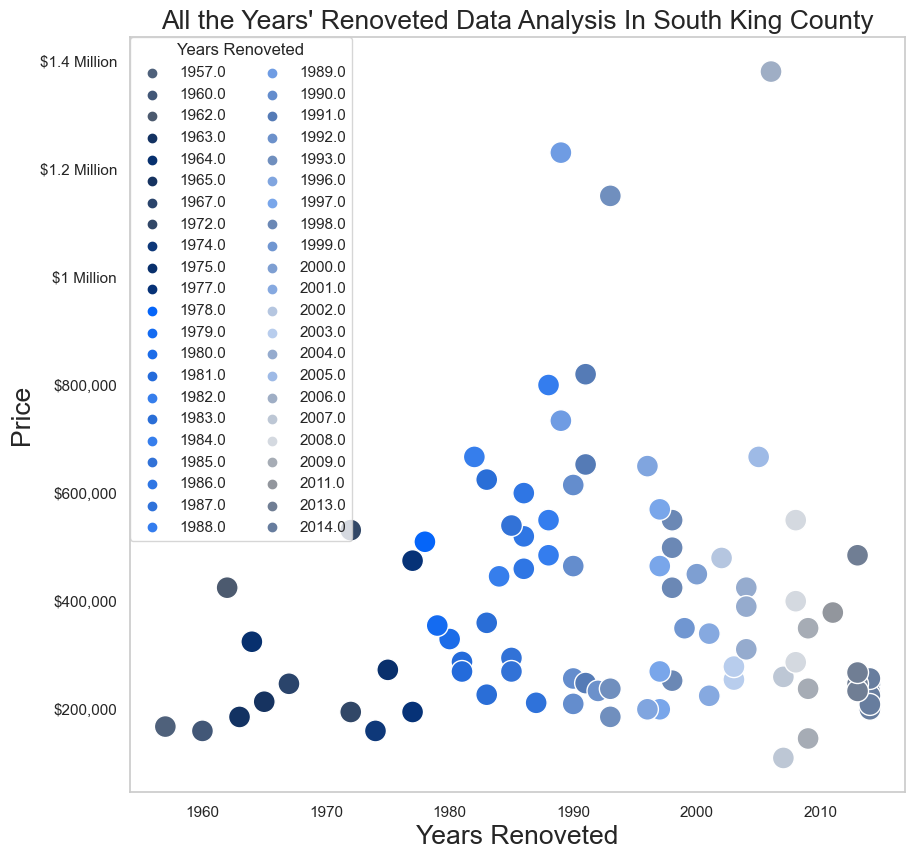

In [364]:
x = regressiondata5[3562:3649]['Year_Renoveted']
y = regressiondata5[3562:3649]['Price']
#plt.xticks(np.arange(1900,2000))
#sns.set_palette(flatui)
plt.rcParams.update({'font.size': 10, 'figure.dpi':100})
ax = sns.scatterplot(data=re5, x=x, y=y,s=250, linewidth = 1,
                    hue='Year_Renoveted',palette=flatui)
plt.grid(linestyle='-', linewidth=0.2)
ax.set_title('All the Years\' Renoveted Data Analysis In South King County',size=19)
plt.xlabel("Years Renoveted", size=19)
plt.legend(title='Years Renoveted')
plt.ylabel("Price", size=19)
ax.set_yticklabels(['0','$200,000','$400,000','$600,000','$800,000',
                         '$1 Million','$1.2 Million','$1.4 Million'])
plt.gcf().set_size_inches((10,10))
plt.legend( loc='upper left', borderaxespad=0,title="Years Renoveted",
          frameon=True, ncol=2)
xticks=ax.xaxis.get_major_ticks()
plt.show()

In [287]:
train_df, test_df = train_test_split(regressiondata5, test_size=0.10, shuffle=False)

In [288]:
X_train, y_train = train_df[['Year_Renoveted']], train_df[['Price']]
X_test, y_test = test_df[['Year_Renoveted']], test_df[['Price']]

In [289]:
classifiers = {}
for tau in [0.1, 0.5, 0.9]:
    clf = LGBMRegressor(objective='quantile', alpha=tau)
    clf.fit(X_train, y_train)
    preds = pd.DataFrame(clf.predict(X_test), columns = [str(tau)])
    classifiers[str(tau)] = {'clf': clf, 'predictions': preds}

In [290]:
Quantile_regression4 = pd.DataFrame({'Year_Renoveted': X_test.reset_index()['Year_Renoveted'],
              '0.1': classifiers['0.1']['predictions']['0.1'],
              '0.5': classifiers['0.5']['predictions']['0.5'],
              '0.9': classifiers['0.9']['predictions']['0.9'],
              'Price': y_test.reset_index()['Price']})

In [291]:
Quantile_regression4 = Quantile_regression4.drop(range(0,277))
Quantile_regression4

,Year_Renoveted,0.1,0.5,0.9,Price
277,2014.0,199000.0,280000.0,449693.96875,245990.0
278,2014.0,199000.0,280000.0,449693.96875,199990.0
279,2014.0,199000.0,280000.0,449693.96875,232000.0
280,2014.0,199000.0,280000.0,449693.96875,225000.0
281,2014.0,199000.0,280000.0,449693.96875,209000.0
...,...,...,...,...,...
360,1974.0,199000.0,280000.0,449693.96875,160000.0
361,1957.0,199000.0,280000.0,449693.96875,168000.0
362,1962.0,199000.0,280000.0,449693.96875,425000.0
363,1967.0,199000.0,280000.0,449693.96875,247200.0


In [292]:
melted_data5 = pd.melt(Quantile_regression4, id_vars=['Year_Renoveted'])
melted_data5 = melted_data5.drop(range(264,352))
melted_data5 = melted_data5.rename(columns={'variable': 'Percentile'})
melted_data5

,Year_Renoveted,Percentile,value
0,2014.0,0.1,199000.00000
1,2014.0,0.1,199000.00000
2,2014.0,0.1,199000.00000
3,2014.0,0.1,199000.00000
4,2014.0,0.1,199000.00000
...,...,...,...
259,1974.0,0.9,449693.96875
260,1957.0,0.9,449693.96875
261,1962.0,0.9,449693.96875
262,1967.0,0.9,449693.96875


<ipython-input-241-4c4eca981e87>:9: UserWarning:

FixedFormatter should only be used together with FixedLocator



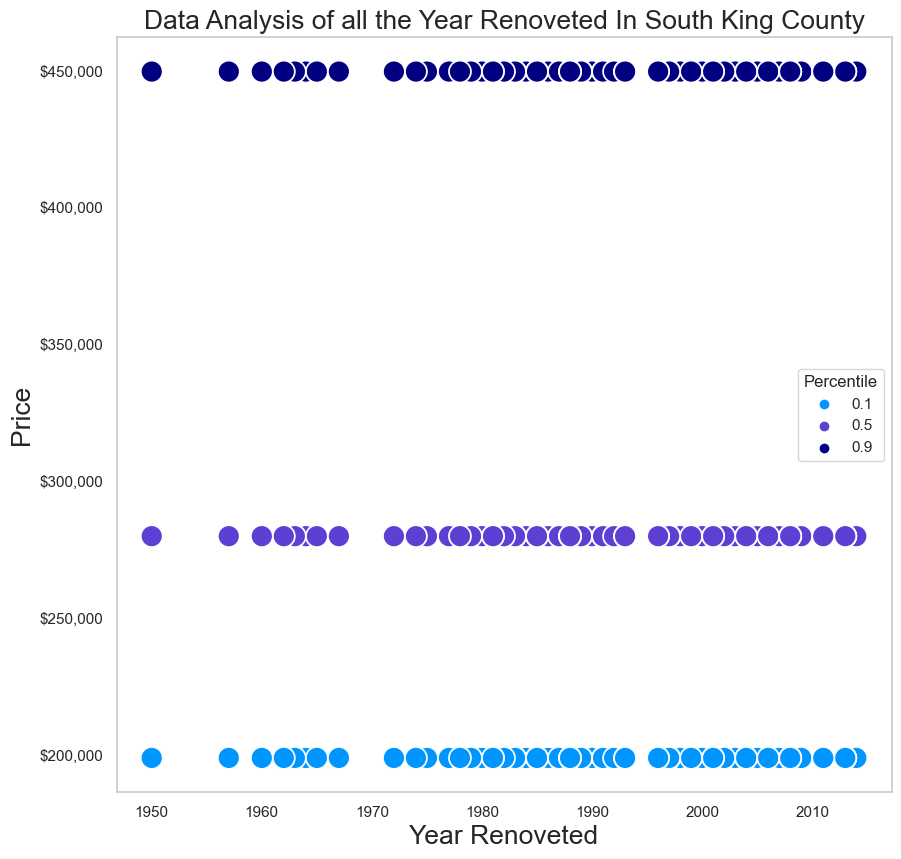

In [241]:
plt.rcParams.update({'font.size': 10, 'figure.dpi':100})
flatui = ["#0096FF","#5D3FD3","#000080",]
ax =sns.scatterplot(data=melted_data5, x="Year_Renoveted",y='value',s=250,palette=flatui,
                    hue='Percentile')          
plt.grid(linestyle='-', linewidth=0.2)
ax.set_title('Data Analysis of all the Year Renoveted In South King County',size=19)
plt.xlabel("Year Renoveted'", size=19)
plt.ylabel("Price", size=19)
ax.set_yticklabels(['0','$200,000','$250,000','$300,000','$350,000','$400,000','$450,000'])
ylabel = plt.ylabel("Price")
xlabel = plt.xlabel("Year Renoveted")
plt.gcf().set_size_inches((10,10))

<ipython-input-242-96f267541929>:10: UserWarning:

FixedFormatter should only be used together with FixedLocator



[Text(0, 150000.0, '0'),
 Text(0, 200000.0, '$200,000'),
 Text(0, 250000.0, '$250,000'),
 Text(0, 300000.0, '$300,000'),
 Text(0, 350000.0, '$350,000'),
 Text(0, 400000.0, '$400,000'),
 Text(0, 450000.0, '$450,000'),
 Text(0, 500000.0, '')]

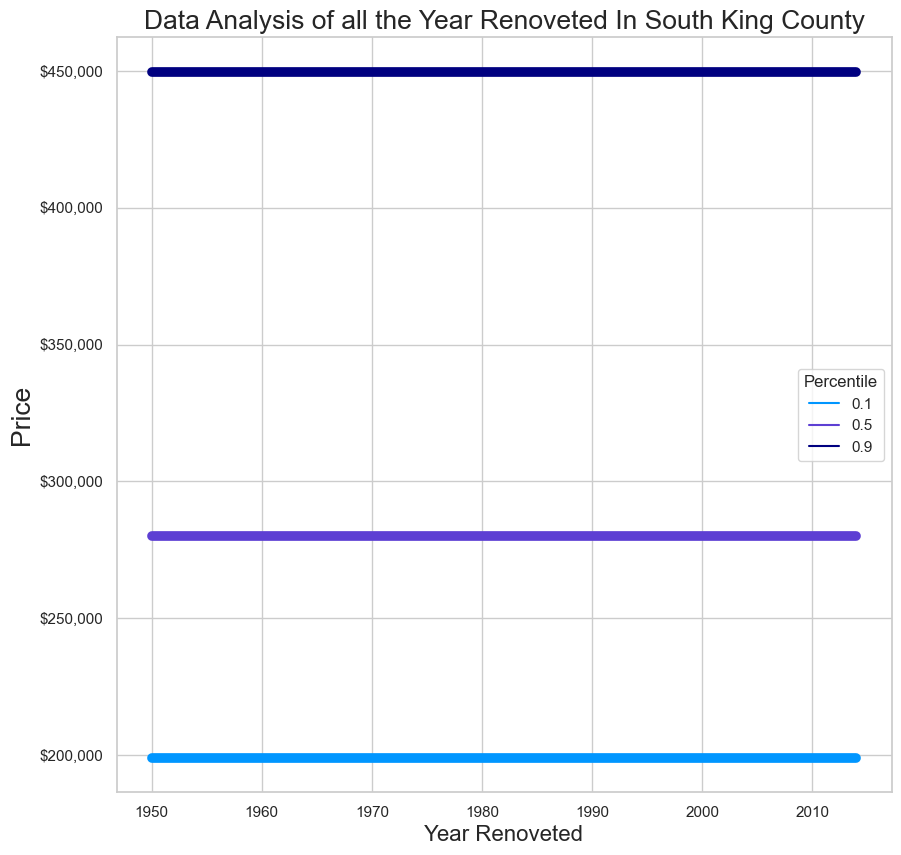

In [242]:
sns.set_style("whitegrid")
flatui = ["#0096FF","#5D3FD3","#000080"]
ax=sns.lineplot( data=melted_data5, x="Year_Renoveted",y="value",
                linewidth = 7,palette=flatui,hue='Percentile')
plt.gcf().set_size_inches((10,10))
ax.set_title('Data Analysis of all the Year Renoveted In South King County',size=19)
plt.legend(title='Percentile')
plt.xlabel("Year Renoveted", size=16)
plt.ylabel("Price", size=19)
ax.set_yticklabels(['0','$200,000','$250,000','$300,000','$350,000','$400,000','$450,000'])

In [293]:
(Quantile_regression4['Price'] > Quantile_regression4['0.1']).value_counts()

True     78
False    10
dtype: int64

In [54]:
i = 0
y= 0
x = []
while i < 78:
    x.append('How Many Times The Prediction Was Right')
    i+=1
while y < 10:
    x.append('How Many Times The Prediction Was Wrong')
    y+=1
len(x)
df1 = pd.DataFrame({'Prediction Accuracy':x})

In [55]:
(Quantile_regression4['Price'] > Quantile_regression4['0.5']).value_counts()

NameError: name 'Quantile_regression4' is not defined

In [56]:
i = 0
y= 0
x = []
while i < 48:
    x.append('How Many Times The Prediction Was Right')
    i+=1
while y < 40:
    x.append('How Many Times The Prediction Was Wrong')
    y+=1
len(x)
df2 = pd.DataFrame({'Prediction Accuracy':x})

In [57]:
(Quantile_regression4['Price'] > Quantile_regression4['0.9']).value_counts()

NameError: name 'Quantile_regression4' is not defined

In [52]:
i = 0
y= 0
x = []
while i < 58:
    x.append('How Many Times The Prediction Was Right')
    i+=1
while y < 30:
    x.append('How Many Times The Prediction Was Wrong')
    y+=1
len(x)
df3 = pd.DataFrame({'Prediction Accuracy':x})

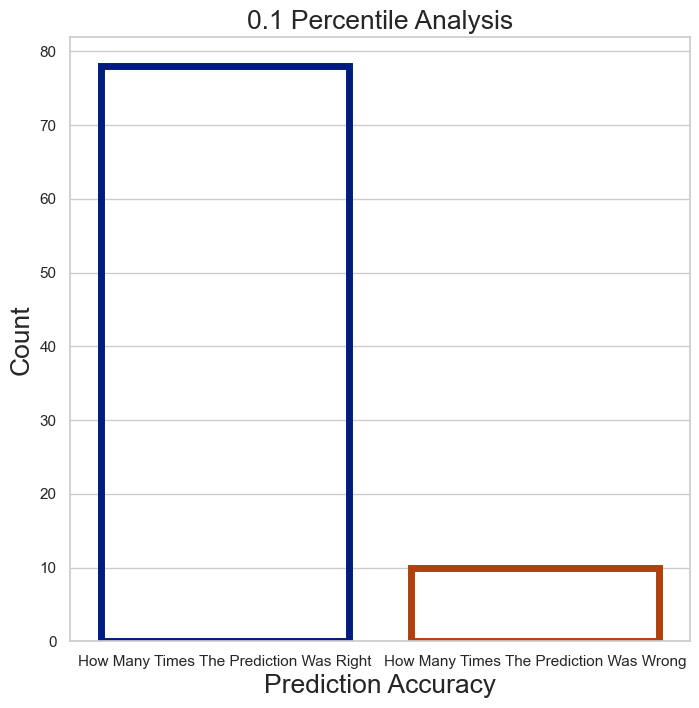

In [58]:
sns.set_style("whitegrid")
plt.gcf().set_size_inches((8,8))
ax = sns.countplot(x="Prediction Accuracy", data=df1,
                   palette=flatui,
                   facecolor=(0, 0, 0, 0),
                   linewidth=5,
                   edgecolor=sns.color_palette("dark", 3))
ax.set_title('0.1 Percentile Analysis',size=19)
plt.xlabel("Prediction Accuracy", size=19)
plt.ylabel("Count", size=19)
plt.show()

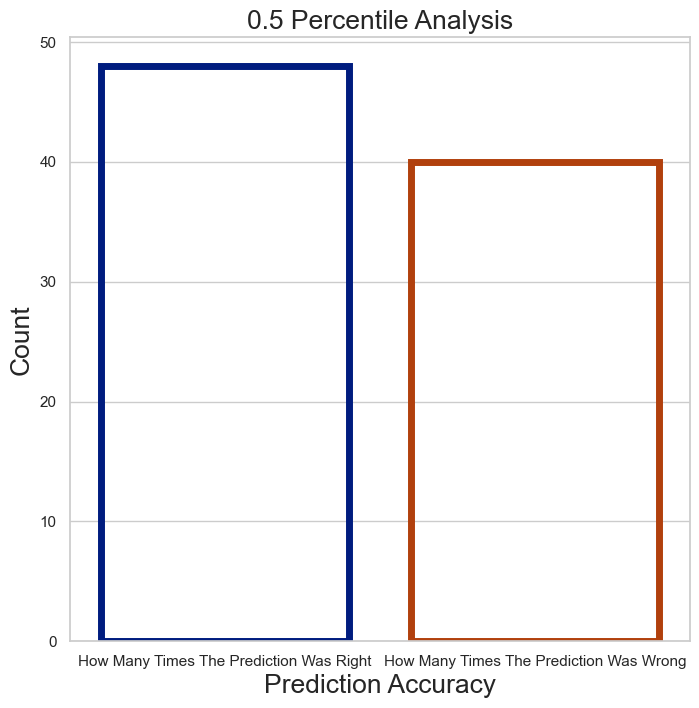

In [59]:
sns.set_style("whitegrid")
plt.gcf().set_size_inches((8,8))
ax = sns.countplot(x="Prediction Accuracy", data=df2,
                   palette=flatui,
                   facecolor=(0, 0, 0, 0),
                   linewidth=5,
                   edgecolor=sns.color_palette("dark", 3))
ax.set_title('0.5 Percentile Analysis',size=19)
plt.xlabel("Prediction Accuracy", size=19)
plt.ylabel("Count", size=19)
plt.show()

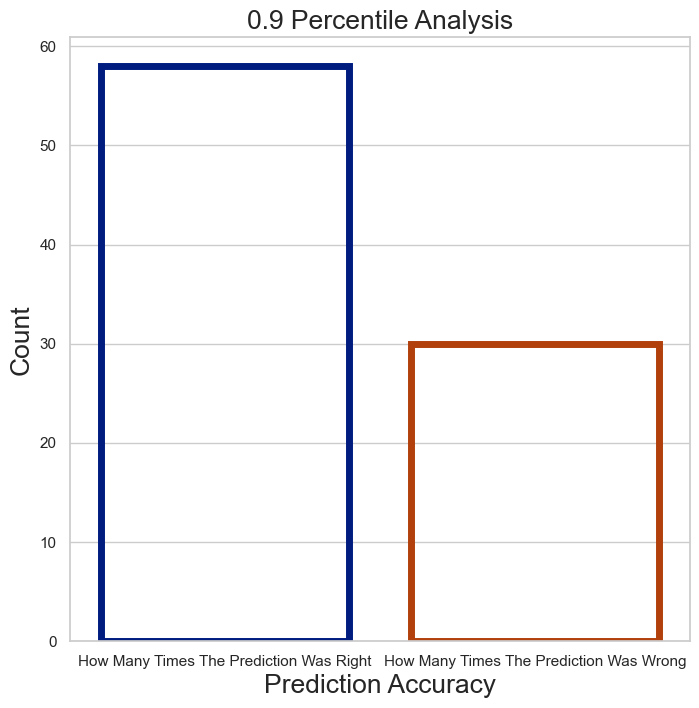

In [60]:
sns.set_style("whitegrid")
plt.gcf().set_size_inches((8,8))
ax = sns.countplot(x="Prediction Accuracy", data=df3,
                   palette=flatui,
                   facecolor=(0, 0, 0, 0),
                   linewidth=5,
                   edgecolor=sns.color_palette("dark", 3))
ax.set_title('0.9 Percentile Analysis',size=19)
plt.xlabel("Prediction Accuracy", size=19)
plt.ylabel("Count", size=19)
plt.show()

In [53]:
Predictions3 = []
for i in regressiondata5.Year_Renoveted:
    if i == 0:  Predictions3.append('Between: $199,000 - $449,693') 
    if i == 1950:Predictions3.append('Between: $199,000 - $449,693') 
    if i == 1951:Predictions3.append('Between: $199,000 - $449,693') 
    if i == 1952:Predictions3.append('Between: $199,000 - $449,693') 
    if i == 1953:Predictions3.append('Between: $199,000 - $449,693') 
    if i == 1954:Predictions3.append('Between: $199,000 - $449,693') 
    if i == 1955:Predictions3.append('Between: $199,000 - $449,693')
    if i == 1956:Predictions3.append('Between: $199,000 - $449,693') 
    if i == 1957:Predictions3.append('Between: $199,000 - $449,693') 
    if i == 1958:Predictions3.append('Between: $199,000 - $449,693') 
    if i == 1959:Predictions3.append('Between: $199,000 - $449,693') 
    if i == 1960:Predictions3.append('Between: $199,000 - $449,693') 
    if i == 1961:Predictions3.append('Between: $199,000 - $449,693') 
    if i == 1962:Predictions3.append('Between: $199,000 - $449,693') 
    if i == 1963:Predictions3.append('Between: $199,000 - $449,693')
    if i == 1964:Predictions3.append('Between: $199,000 - $449,693')
    if i == 1965:Predictions3.append('Between: $199,000 - $449,693') 
    if i == 1966:Predictions3.append('Between: $199,000 - $449,693') 
    if i == 1967:Predictions3.append('Between: $199,000 - $449,693') 
    if i == 1968:Predictions3.append('Between: $199,000 - $449,693') 
    if i == 1969:Predictions3.append('Between: $199,000 - $449,693') 
    if i == 1970:Predictions3.append('Between: $199,000 - $449,693') 
    if i == 1971:Predictions3.append('Between: $199,000 - $449,693') 
    if i == 1972:Predictions3.append('Between: $199,000- $449,693')
    if i == 1973:Predictions3.append('Between: $199,000 - $449,693') 
    if i == 1974:Predictions3.append('Between: $199,000 - $449,693') 
    if i == 1975:Predictions3.append('Between: $199,000 - $449,693') 
    if i == 1976:Predictions3.append('Between: $199,000 - $449,693') 
    if i == 1977:Predictions3.append('Between: $199,000 - $449,693') 
    if i == 1978:Predictions3.append('Between: $199,000 - $449,693') 
    if i == 1979:Predictions3.append('Between: $199,000 - $449,693') 
    if i == 1980:Predictions3.append('Between: $199,000 - $449,693')
    if i == 1981:Predictions3.append('Between: $199,000 - $449,693') 
    if i == 1982:Predictions3.append('Between: $199,000 - $449,693') 
    if i == 1983:Predictions3.append('Between: $199,000 - $449,693') 
    if i == 1984:Predictions3.append('Between: $199,000 - $449,693') 
    if i == 1985:Predictions3.append('Between: $199,000 - $449,693') 
    if i == 1986:Predictions3.append('Between: $199,000 - $449,693') 
    if i == 1987:Predictions3.append('Between: $199,000 - $449,693') 
    if i == 1988:Predictions3.append('Between: $199,000 - $449,693') 
    if i == 1989:Predictions3.append('Between: $199,000 - $449,693') 
    if i == 1990:Predictions3.append('Between: $199,000 - $449,693') 
    if i == 1991:Predictions3.append('Between: $199,000 - $449,693') 
    if i == 1992:Predictions3.append('Between: $199,000 - $449,693') 
    if i == 1993:Predictions3.append('Between: $199,000 - $449,693')
    if i == 1994:Predictions3.append('Between: $199,000 - $449,693') 
    if i == 1995:Predictions3.append('Between: $199,000 - $449,693') 
    if i == 1996:Predictions3.append('Between: $199,000 - $449,693') 
    if i == 1997:Predictions3.append('Between: $199,000 - $449,693') 
    if i == 1998:Predictions3.append('Between: $199,000 - $449,693') 
    if i == 1999:Predictions3.append('Between: $199,000 - $449,693') 
    if i == 2000:Predictions3.append('Between: $199,000 - $449,693') 
    if i == 2001:Predictions3.append('Between: $199,000 - $449,693')
    if i == 2002:Predictions3.append('Between: $199,000 - $449,693') 
    if i == 2003:Predictions3.append('Between: $199,000 - $449,693') 
    if i == 2004:Predictions3.append('Between: $199,000 - $449,693') 
    if i == 2005:Predictions3.append('Between: $199,000- $449,693')
    if i == 2006:Predictions3.append('Between: $199,000 - $449,693') 
    if i == 2007:Predictions3.append('Between: $199,000 - $449,693')
    if i == 2008:Predictions3.append('Between: $199,000 - $449,693') 
    if i == 2009:Predictions3.append('Between: $199,000 - $449,693') 
    if i == 2010:Predictions3.append('Between: $199,000 - $449,693') 
    if i == 2011:Predictions3.append('Between: $199,000- $449,693')
    if i == 2012:Predictions3.append('Between: $199,000 - $449,693') 
    if i == 2013:Predictions3.append('Between: $199,000 - $449,693') 
    if i == 2014:Predictions3.append('Between: $199,000 - $449,693') 
    if i == 2015:Predictions3.append('Between: $199,000- $449,693')
len(Predictions3)
len(price)

4403

In [54]:
price = []
for i in regressiondata5.Price:
    price.append("${:,.0f}".format(i))

In [55]:
Prediction4 = pd.DataFrame({'Year Renoveted':regressiondata5.Year_Renoveted,
                           'Prediction':Predictions3,'Actual Price':price})
Prediction4

,Year Renoveted,Prediction,Actual Price
0,0.0,"Between: $199,000 - $449,693","$257,500"
1,0.0,"Between: $199,000 - $449,693","$291,850"
2,0.0,"Between: $199,000 - $449,693","$323,000"
3,0.0,"Between: $199,000 - $449,693","$189,000"
4,0.0,"Between: $199,000 - $449,693","$230,000"
...,...,...,...
3645,1974.0,"Between: $199,000 - $449,693","$160,000"
3646,1957.0,"Between: $199,000 - $449,693","$168,000"
3647,1962.0,"Between: $199,000 - $449,693","$425,000"
3648,1967.0,"Between: $199,000 - $449,693","$247,200"


In [56]:
def CONDITION(LEVEL_CONDITION):
    
    locations = house_info['Location'].tolist()

    condition_level = house_info['Condition'].tolist()

    condition_index = []
    for i,x in enumerate(condition_level):
        if x == LEVEL_CONDITION:condition_index.append(i)

    level_southking = []
    for i in condition_index:
        if locations[i] == 98092 : level_southking.append(i)
        elif locations[i] == 98002 : level_southking.append(i)
        elif locations[i] == 98001 : level_southking.append(i)
        elif locations[i] == 98070 : level_southking.append(i)
        elif locations[i] == 98038 : level_southking.append(i)
        elif locations[i] == 98023 : level_southking.append(i)
        elif locations[i] == 98003 : level_southking.append(i)
        elif locations[i] == 98010 : level_southking.append(i)
        elif locations[i] == 98022 : level_southking.append(i)
        elif locations[i] == 98198 : level_southking.append(i)
        elif locations[i] == 98188 : level_southking.append(i)
        elif locations[i] == 98148 : level_southking.append(i)
        elif locations[i] == 98042 : level_southking.append(i)
        elif locations[i] == 98032 : level_southking.append(i)
        elif locations[i] == 98031 : level_southking.append(i)
        elif locations[i] == 98030 : level_southking.append(i)

    price = house_info["Price"].tolist()

    price_southking = []
    for i in level_southking:price_southking.append(price[i])
    return(price_southking)

condition_level = house_info["Condition"].value_counts().index.tolist()
level_southking = []
for i in condition_level:
    level_southking.append(CONDITION(i))
level_southking= sum(level_southking, [])
len(level_southking)

4403

In [57]:
def AMOUNT_LEVEL(AMOUNT_LEVEL):
    locations = house_info['Location'].tolist()

    condtions = house_info["Condition"].tolist()
    X_value = []
    level_index = []
    for i,x in enumerate(condtions):
        if x == AMOUNT_LEVEL:level_index.append(i)

    for i in level_index:
        if locations[i] == 98092 : X_value.append(AMOUNT_LEVEL)
        elif locations[i] == 98002 : X_value.append(AMOUNT_LEVEL)
        elif locations[i] == 98001 : X_value.append(AMOUNT_LEVEL)
        elif locations[i] == 98070 : X_value.append(AMOUNT_LEVEL)
        elif locations[i] == 98038 : X_value.append(AMOUNT_LEVEL)
        elif locations[i] == 98023 : X_value.append(AMOUNT_LEVEL)
        elif locations[i] == 98003 : X_value.append(AMOUNT_LEVEL)
        elif locations[i] == 98010 : X_value.append(AMOUNT_LEVEL)
        elif locations[i] == 98022 : X_value.append(AMOUNT_LEVEL)
        elif locations[i] == 98198: X_value.append(AMOUNT_LEVEL)
        elif locations[i] == 98188 : X_value.append(AMOUNT_LEVEL)
        elif locations[i] == 98148 : X_value.append(AMOUNT_LEVEL)
        elif locations[i] == 98042 : X_value.append(AMOUNT_LEVEL)
        elif locations[i] == 98032 : X_value.append(AMOUNT_LEVEL)
        elif locations[i] == 98031 : X_value.append(AMOUNT_LEVEL)
        elif locations[i] == 98030 : X_value.append(AMOUNT_LEVEL)
    return X_value
level = house_info["Condition"].value_counts().index.tolist()
condtition_level_southking = []
for i in level:
    condtition_level_southking.append(AMOUNT_LEVEL(i))
condtition_level_southking= sum(condtition_level_southking, [])
len(condtition_level_southking)

4403

In [58]:
regressiondata6 = pd.DataFrame({'Condition_Level':condtition_level_southking,
                                'Price':level_southking})
regressiondata6

,Condition_Level,Price
0,3,257500.0
1,3,291850.0
2,3,323000.0
3,3,285000.0
4,3,252700.0
...,...,...
4398,2,246500.0
4399,2,235000.0
4400,1,105500.0
4401,1,445000.0


<ipython-input-301-ec0d8c8860b4>:13: UserWarning:

FixedFormatter should only be used together with FixedLocator



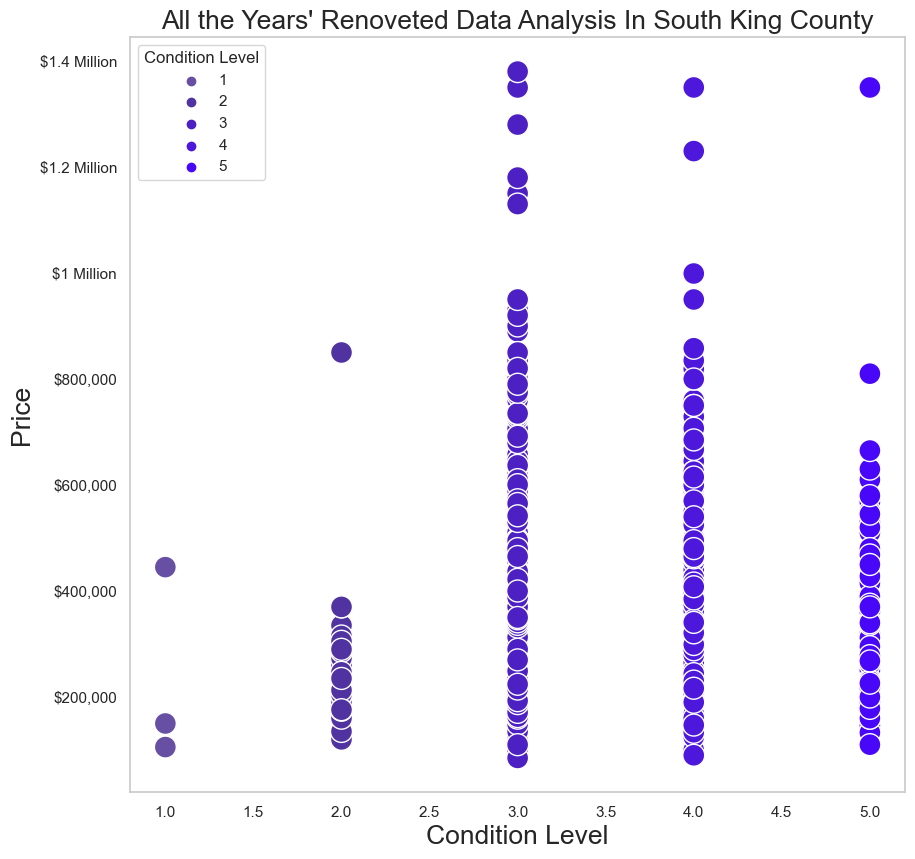

In [301]:
flatui = ['#6750A3','#5032A1','#4C20C3','#4D18DB','#4907F9']

x = regressiondata6['Condition_Level']
y = regressiondata6['Price']
plt.rcParams.update({'font.size': 10, 'figure.dpi':100})
ax = sns.scatterplot(data=regressiondata6, x=x, y=y,s=250, linewidth = 1,
                    hue='Condition_Level',palette=flatui)
plt.grid(linestyle='-', linewidth=0.2)
ax.set_title('All the Years\' Renoveted Data Analysis In South King County',size=19)
plt.xlabel("Condition Level", size=19)
plt.legend(title='Condition Level')
plt.ylabel("Price", size=19)
ax.set_yticklabels(['0','$200,000','$400,000','$600,000','$800,000',
                         '$1 Million','$1.2 Million','$1.4 Million'])
plt.gcf().set_size_inches((10,10))
xticks=ax.xaxis.get_major_ticks()
plt.show()

In [302]:
train_df, test_df = train_test_split(regressiondata6, test_size=0.10, shuffle=False)

In [303]:
X_train, y_train = train_df[['Condition_Level']], train_df[['Price']]
X_test, y_test = test_df[['Condition_Level']], test_df[['Price']]

In [304]:
classifiers = {}
for tau in [0.1, 0.5, 0.9]:
    clf = LGBMRegressor(objective='quantile', alpha=tau)
    clf.fit(X_train, y_train)
    preds = pd.DataFrame(clf.predict(X_test), columns = [str(tau)])
    classifiers[str(tau)] = {'clf': clf, 'predictions': preds}

In [305]:
Quantile_regression5 = pd.DataFrame({'Condition_Level': X_test.reset_index()['Condition_Level'],
              '0.1': classifiers['0.1']['predictions']['0.1'],
              '0.5': classifiers['0.5']['predictions']['0.5'],
              '0.9': classifiers['0.9']['predictions']['0.9'],
              'Price': y_test.reset_index()['Price']})
Quantile_regression5

,Condition_Level,0.1,0.5,0.9,Price
0,4,192995.234033,265000.650754,430000.796842,199500.0
1,4,192995.234033,265000.650754,430000.796842,439950.0
2,4,192995.234033,265000.650754,430000.796842,265000.0
3,4,192995.234033,265000.650754,430000.796842,316000.0
4,4,192995.234033,265000.650754,430000.796842,270000.0
...,...,...,...,...,...
436,2,209999.781136,299999.721105,472349.632295,246500.0
437,2,209999.781136,299999.721105,472349.632295,235000.0
438,1,209999.781136,299999.721105,472349.632295,105500.0
439,1,209999.781136,299999.721105,472349.632295,445000.0


In [308]:
row_df = pd.DataFrame({'Condition_Level':[3],'0.1':[209999.781136],'0.5':[299999.721105],'0.9':[472349.632295]
                       ,'Price':[0]})
Quantile_regression5 = pd.concat([row_df, Quantile_regression5], ignore_index=True)
Quantile_regression5

,Condition_Level,0.1,0.5,0.9,Price
0,3,209999.781136,299999.721105,472349.632295,0.0
1,4,192995.234033,265000.650754,430000.796842,199500.0
2,4,192995.234033,265000.650754,430000.796842,439950.0
3,4,192995.234033,265000.650754,430000.796842,265000.0
4,4,192995.234033,265000.650754,430000.796842,316000.0
...,...,...,...,...,...
437,2,209999.781136,299999.721105,472349.632295,246500.0
438,2,209999.781136,299999.721105,472349.632295,235000.0
439,1,209999.781136,299999.721105,472349.632295,105500.0
440,1,209999.781136,299999.721105,472349.632295,445000.0


In [309]:
melted_data6 = pd.melt(Quantile_regression5, id_vars=['Condition_Level'])
melted_data6 = melted_data6.drop(range(1326,1768))
melted_data6 = melted_data6.rename(columns={'variable': 'Percentile'})
melted_data6

,Condition_Level,Percentile,value
0,3,0.1,209999.781136
1,4,0.1,192995.234033
2,4,0.1,192995.234033
3,4,0.1,192995.234033
4,4,0.1,192995.234033
...,...,...,...
1321,2,0.9,472349.632295
1322,2,0.9,472349.632295
1323,1,0.9,472349.632295
1324,1,0.9,472349.632295


<ipython-input-310-35ca1caae2d5>:9: UserWarning:

FixedFormatter should only be used together with FixedLocator



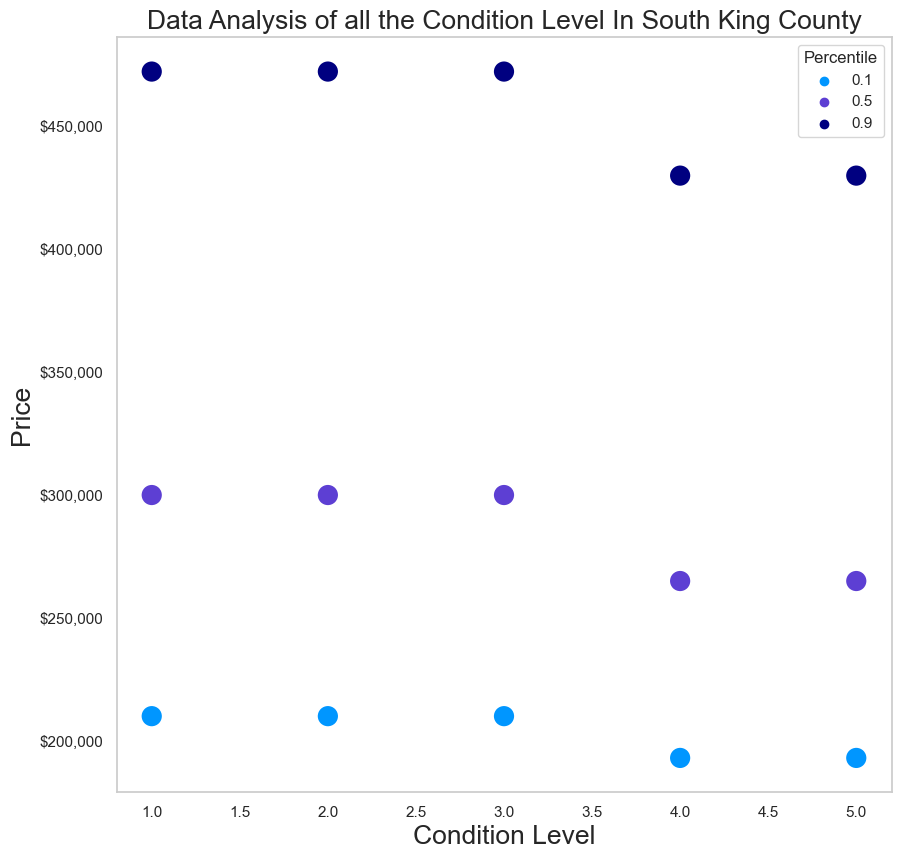

In [310]:
plt.rcParams.update({'font.size': 10, 'figure.dpi':100})
flatui = ["#0096FF","#5D3FD3","#000080",]
ax =sns.scatterplot(data=melted_data6, x="Condition_Level",y='value',s=250,palette=flatui,
                    hue='Percentile')          
plt.grid(linestyle='-', linewidth=0.2)
ax.set_title('Data Analysis of all the Condition Level In South King County',size=19)
plt.xlabel("Condition Level", size=19)
plt.ylabel("Price", size=19)
ax.set_yticklabels(['0','$200,000','$250,000','$300,000','$350,000','$400,000','$450,000'])
ylabel = plt.ylabel("Price")
xlabel = plt.xlabel("Condition Level")
plt.gcf().set_size_inches((10,10))

<ipython-input-311-78d9cff4756d>:10: UserWarning:

FixedFormatter should only be used together with FixedLocator



[Text(0, 150000.0, '0'),
 Text(0, 200000.0, '$200,000'),
 Text(0, 250000.0, '$250,000'),
 Text(0, 300000.0, '$300,000'),
 Text(0, 350000.0, '$350,000'),
 Text(0, 400000.0, '$400,000'),
 Text(0, 450000.0, '$450,000'),
 Text(0, 500000.0, '')]

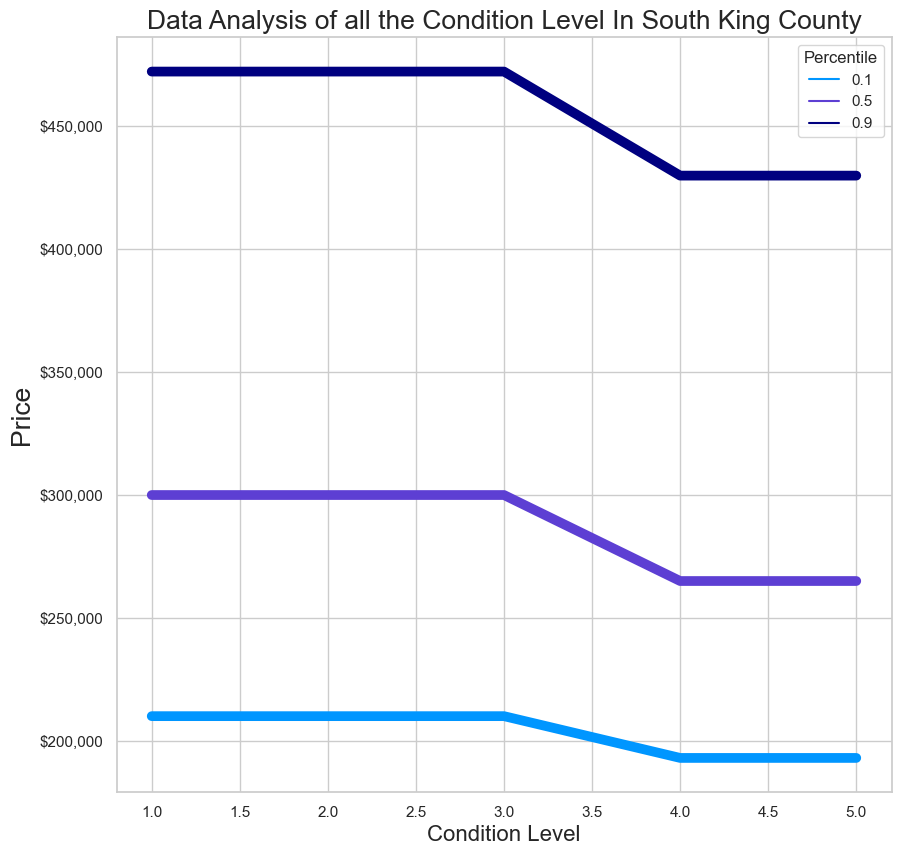

In [311]:
sns.set_style("whitegrid")
flatui = ["#0096FF","#5D3FD3","#000080"]
ax=sns.lineplot( data=melted_data6, x="Condition_Level",y="value",
                linewidth = 7,palette=flatui,hue='Percentile')
plt.gcf().set_size_inches((10,10))
ax.set_title('Data Analysis of all the Condition Level In South King County',size=19)
plt.legend(title='Percentile')
plt.xlabel("Condition Level", size=16)
plt.ylabel("Price", size=19)
ax.set_yticklabels(['0','$200,000','$250,000','$300,000','$350,000','$400,000','$450,000'])

In [312]:
(Quantile_regression5['Price'] > Quantile_regression5['0.1']).value_counts()

True     78
False    10
dtype: int64

In [321]:
i = 0
y= 0
x = []
while i < 78:
    x.append('How Many Times The Prediction Was Right')
    i+=1
while y < 10:
    x.append('How Many Times The Prediction Was Wrong')
    y+=1
len(x)
df1 = pd.DataFrame({'Prediction Accuracy':x})

In [324]:
(Quantile_regression5['Price'] > Quantile_regression5['0.5']).value_counts()

False    255
True     187
dtype: int64

In [325]:
i = 0
y= 0
x = []
while i < 255:
    x.append('How Many Times The Prediction Was Right')
    i+=1
while y < 187:
    x.append('How Many Times The Prediction Was Wrong')
    y+=1
len(x)
df2 = pd.DataFrame({'Prediction Accuracy':x})

In [326]:
(Quantile_regression5['Price'] > Quantile_regression5['0.9']).value_counts()

False    403
True      39
dtype: int64

In [327]:
i = 0
y= 0
x = []
while i < 403:
    x.append('How Many Times The Prediction Was Right')
    i+=1
while y < 39:
    x.append('How Many Times The Prediction Was Wrong')
    y+=1
len(x)
df3 = pd.DataFrame({'Prediction Accuracy':x})

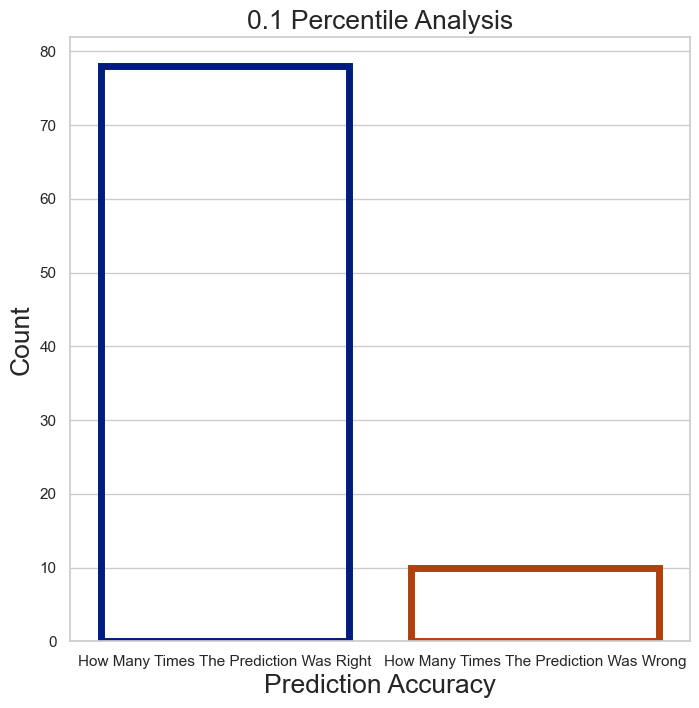

In [328]:
sns.set_style("whitegrid")
plt.gcf().set_size_inches((8,8))
ax = sns.countplot(x="Prediction Accuracy", data=df1,
                   palette=flatui,
                   facecolor=(0, 0, 0, 0),
                   linewidth=5,
                   edgecolor=sns.color_palette("dark", 3))
ax.set_title('0.1 Percentile Analysis',size=19)
plt.xlabel("Prediction Accuracy", size=19)
plt.ylabel("Count", size=19)
plt.show()

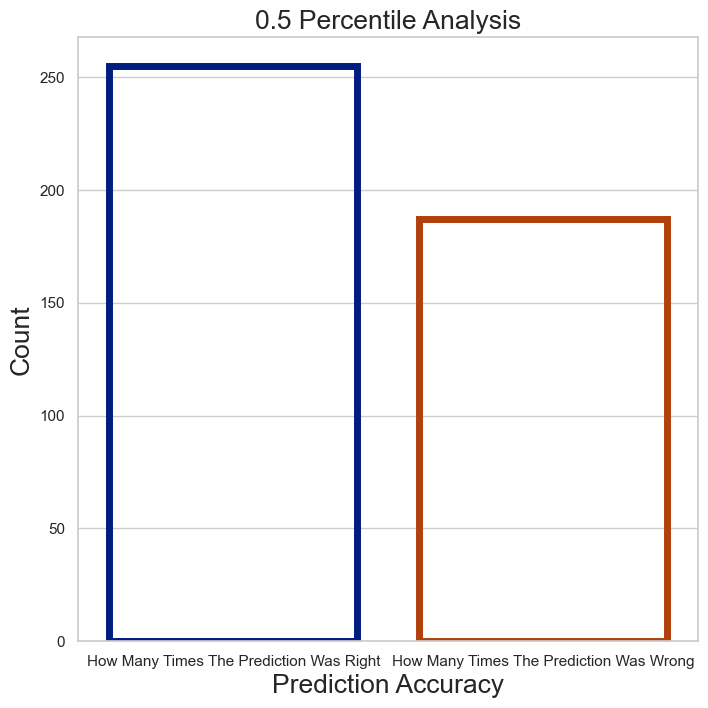

In [329]:
sns.set_style("whitegrid")
plt.gcf().set_size_inches((8,8))
ax = sns.countplot(x="Prediction Accuracy", data=df2,
                   palette=flatui,
                   facecolor=(0, 0, 0, 0),
                   linewidth=5,
                   edgecolor=sns.color_palette("dark", 3))
ax.set_title('0.5 Percentile Analysis',size=19)
plt.xlabel("Prediction Accuracy", size=19)
plt.ylabel("Count", size=19)
plt.show()

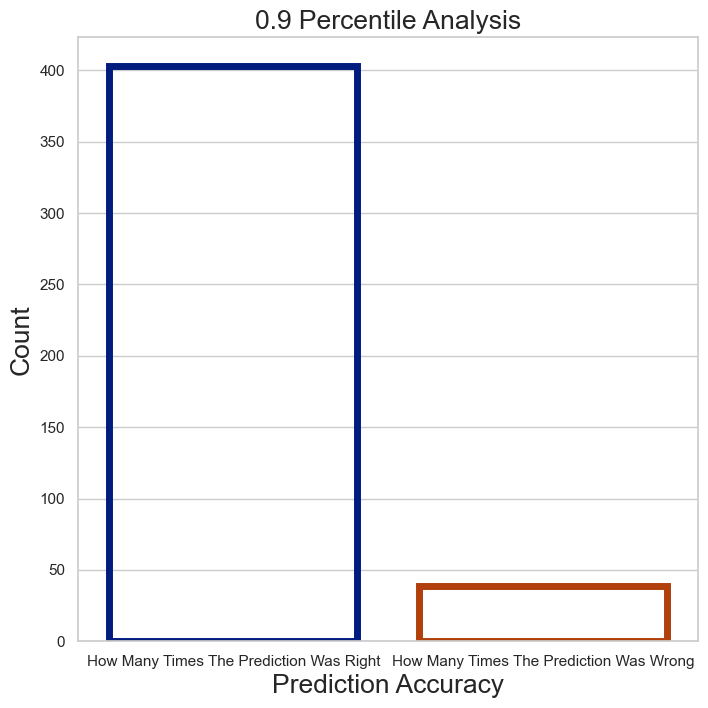

In [331]:
sns.set_style("whitegrid")
plt.gcf().set_size_inches((8,8))
ax = sns.countplot(x="Prediction Accuracy", data=df3,
                   palette=flatui,
                   facecolor=(0, 0, 0, 0),
                   linewidth=5,
                   edgecolor=sns.color_palette("dark", 3))
ax.set_title('0.9 Percentile Analysis',size=19)
plt.xlabel("Prediction Accuracy", size=19)
plt.ylabel("Count", size=19)
plt.show()

In [60]:
Predictions5 = []
for i in regressiondata6.Condition_Level:
    if i == 1:Predictions5.append('Between: $209,999 - $472,349') 
    if i == 2:Predictions5.append('Between: $209,999 - $472,349') 
    if i == 3:Predictions5.append('Between: $192,995 - $430,000')
    if i == 4:Predictions5.append('Between: $192,995 - $430,000') 
    if i == 5: Predictions5.append('Between: $192,995 - $430,000')
len(Predictions5)

4403

In [59]:
price = []
for i in regressiondata6.Price:
    price.append("${:,.0f}".format(i))

In [61]:
Prediction5 = pd.DataFrame({'Condition Level':regressiondata6.Condition_Level,
                           'Prediction':Predictions5,'Actual Price':price})
Prediction5

,Condition Level,Prediction,Actual Price
0,3,"Between: $192,995 - $430,000","$257,500"
1,3,"Between: $192,995 - $430,000","$291,850"
2,3,"Between: $192,995 - $430,000","$323,000"
3,3,"Between: $192,995 - $430,000","$285,000"
4,3,"Between: $192,995 - $430,000","$252,700"
...,...,...,...
4398,2,"Between: $209,999 - $472,349","$246,500"
4399,2,"Between: $209,999 - $472,349","$235,000"
4400,1,"Between: $209,999 - $472,349","$105,500"
4401,1,"Between: $209,999 - $472,349","$445,000"
